In [2]:
#additional
# Import Data analysis packages
import numpy as np
import pandas as pd
# Import the stats librayr from numpy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#char_studio pushes your charts to the cloud 
import chart_studio.plotly as py
#plotly.offline doesn't push your charts to the clouds
import plotly.offline as pyo
#allows us to create the Data and Figure objects
from plotly.graph_objs import *

In [3]:
from sklearn.utils import shuffle

In [4]:
#lets us see the charts in an iPython Notebook
pyo.offline.init_notebook_mode() # run at the start of every ipython

# Working and Exploration of SAS DATASET 2017

In [5]:
# Importing production dataset for 2017
df_2017=pd.read_stata("./Data_2017/production_data_2017.dta")
df_2017.head(3)

s1q0    s1q1        s1q2                             s1q3  s1q4  s2q1  \
0  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   2.0   
1  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   5.0   
2  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   6.0   

          s2q2   s2q4  s2q5          s2q6  ...  s2q19  s2q20  s2q21 s2q22  \
0   524.663147  Mixed   2.0     Bush bean  ...    NaN    8.0    0.0   8.0   
1  1007.767700  Mixed   3.0  Irish potato  ...    NaN   31.5    0.0  31.5   
2   548.204956   Pure   1.0     Bush bean  ...    NaN   20.0    0.0  20.0   

                    s2q23 s2q24 s2q25    Season     CropGroup        Season1  
0                 Drought    No   NaN  Season A         Beans  Season A 2017  
1  Other reason (Specify)    No   NaN  Season A  Irish potato  Season A 2017  
2                 Drought    No   NaN  Season A         Beans  Season A 2017  

[3 rows x 34 columns]

In [6]:
# Observing the shape of our data
df_2017.shape

(25998, 34)

In [7]:
# listing all variables we have in dataset
#list(df_2017)

In [8]:
#Show all columns we have in dataset
df_2017.columns

Index(['s1q0', 's1q1', 's1q2', 's1q3', 's1q4', 's2q1', 's2q2', 's2q4', 's2q5',
       's2q6', 'Crop_Area_sqm', 's2q8', 's2q9', 's2q10', 's2q11', 's2q12',
       's2q13_1', 's2q13_2', 's2q14', 's2q15', 's2q16_1', 's2q16_2', 's2q17',
       's2q18', 's2q19', 's2q20', 's2q21', 's2q22', 's2q23', 's2q24', 's2q25',
       'Season', 'CropGroup', 'Season1'],
      dtype='object')

In [9]:
# Getting more information on Variables
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25998 entries, 0 to 25997
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   s1q0           25998 non-null  float64 
 1   s1q1           25998 non-null  category
 2   s1q2           25998 non-null  category
 3   s1q3           25113 non-null  category
 4   s1q4           25113 non-null  float64 
 5   s2q1           25998 non-null  float64 
 6   s2q2           25998 non-null  float64 
 7   s2q4           25998 non-null  category
 8   s2q5           25998 non-null  float64 
 9   s2q6           25998 non-null  category
 10  Crop_Area_sqm  25998 non-null  float32 
 11  s2q8           7 non-null      float64 
 12  s2q9           7 non-null      float64 
 13  s2q10          25998 non-null  category
 14  s2q11          25998 non-null  category
 15  s2q12          25998 non-null  category
 16  s2q13_1        23069 non-null  category
 17  s2q13_2        22238 non-null  

In [10]:
# counting number of missing value in our data set.
df_2017.isnull().sum().sum()

217449

In [11]:
#Checking the unique values we have in cropname columns
df_2017['s2q6'].unique()

['Bush bean', 'Irish potato', 'Maize', 'Climbing bean', 'Paddy rice']
Categories (5, object): ['Maize' < 'Paddy rice' < 'Bush bean' < 'Climbing bean' < 'Irish potato']

In [12]:
#Checking the unique values we have in groupname columns
df_2017['CropGroup'].unique()

['Beans', 'Irish potato', 'Maize', 'Paddy rice']
Categories (4, object): ['Beans' < 'Maize' < 'Paddy rice' < 'Irish potato']

In [13]:
#observation for some variables
df_2017.loc[:,'Season':'Season1'].head()

Season     CropGroup        Season1
0  Season A         Beans  Season A 2017
1  Season A  Irish potato  Season A 2017
2  Season A         Beans  Season A 2017
3  Season A         Beans  Season A 2017
4  Season A         Beans  Season A 2017

In [14]:
#value count in season variable
df_2017['Season'].unique()

['Season A', 'Season B', 'Season C']
Categories (3, object): ['Season A' < 'Season B' < 'Season C']

In [15]:
#keeping anly the wanted variable
df_2017=df_2017.loc[:,['s1q0','s1q1','s1q2','s2q1','s2q2',
               's2q4','s2q5','s2q6','Crop_Area_sqm',
               's2q12','s2q13_1','s2q13_2','s2q16_1',
               's2q16_2','s2q11','s2q22','Season','CropGroup','Season1']]
df_2017.head(2)

s1q0    s1q1        s1q2  s2q1         s2q2   s2q4  s2q5          s2q6  \
0  111103.0  Kigali  Nyarugenge   2.0   524.663147  Mixed   2.0     Bush bean   
1  111103.0  Kigali  Nyarugenge   5.0  1007.767700  Mixed   3.0  Irish potato   

   Crop_Area_sqm              s2q12 s2q13_1  s2q13_2 s2q16_1  s2q16_2  \
0     367.264191  Traditional seeds      Kg      4.0     NaN      NaN   
1     201.553528  Traditional seeds      NA      NaN     NaN      NaN   

               s2q11  s2q22    Season     CropGroup        Season1  
0  between 16- 31/01    8.0  Season A         Beans  Season A 2017  
1  between 16- 31/01   31.5  Season A  Irish potato  Season A 2017

In [16]:
# change crop area into heactares
df_2017['Crop_Area_ha']=df_2017['Crop_Area_sqm']/10000

In [17]:
#Creating a new variable which may specify agriculture year
df_2017['Agri_year']=df_2017.apply(lambda x:str(2016)+"_"+ str(2017),axis=1)

In [18]:
#observing the created variable
df_2017['Agri_year'].value_counts()

2016_2017    25998
Name: Agri_year, dtype: int64

In [19]:
#observing the value we have on type of seeds used in 2017
df_2017['s2q12'].unique()

['Traditional seeds', 'Improved seeds', 'Improved+traditional ']
Categories (3, object): ['Traditional seeds' < 'Improved seeds' < 'Improved+traditional ']

In [20]:
#Extraction of data for traditional seeds sown
df_2017[df_2017['s2q12']=='Traditional seeds'].shape

(22854, 21)

In [21]:
#Extraction of data for improved seeds sown
df_2017[df_2017['s2q12']=='Improved seeds'].shape

(3042, 21)

In [22]:
#Counting the cases where the farmers plant both improved seeds and traditional seeds
df_2017[(df_2017['s2q12']!='Improved seeds') & (df_2017['s2q12']!='Traditional seeds')].shape

(102, 21)

In [23]:
#Brousing where they used both traditional and improved seeds
df_2017[(df_2017['s2q12']!='Improved seeds') & (df_2017['s2q12']!='Traditional seeds')][['s2q12','s2q13_1','s2q13_2','s2q16_1','s2q16_2']].head(4)

s2q12 s2q13_1  s2q13_2 s2q16_1  s2q16_2
139   Improved+traditional       Kg      1.0      Kg      2.0
1084  Improved+traditional       Kg      4.5      Kg      2.0
1093  Improved+traditional       Kg      0.5      Kg      1.5
1424  Improved+traditional       Kg      1.0     NaN      0.0

In [24]:
# Changing the varible into intiger
df_2017['s1q0']=df_2017['s1q0'].astype(int)
df_2017['s2q1']=df_2017['s2q1'].astype(int)

In [25]:
# Creation of Unique identification
df_2017['Unique_id']=df_2017.apply(lambda x:str(x['s1q0'])+ str(x['s2q1']), axis=1)

In [26]:
#exploration and counting Non applicable value on unity value of traditional seeds
df_2017[df_2017['s2q13_1']=='NA'].count().head()

s1q0    794
s1q1    794
s1q2    794
s2q1    794
s2q2    794
dtype: int64

In [27]:
df_2017.shape# counting number of rows and columns

(25998, 22)

In [28]:
df_2017.columns# observing again the variables we have

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6',
       'Crop_Area_sqm', 's2q12', 's2q13_1', 's2q13_2', 's2q16_1', 's2q16_2',
       's2q11', 's2q22', 'Season', 'CropGroup', 'Season1', 'Crop_Area_ha',
       'Agri_year', 'Unique_id'],
      dtype='object')

# Exploration of quantity seed and transforming it by removing the outliers

In [29]:
#getting the unique values on measurement units used for traditional seeds sown
df_2017['s2q13_1'].unique()

['Kg', 'NA', 'g', NaN]
Categories (3, object): ['Kg' < 'g' < 'NA']

In [30]:
# In our dataset, we have more missing value in the unity measurement
df_2017['s2q13_1'].isnull().value_counts()

False    23069
True      2929
Name: s2q13_1, dtype: int64

In [31]:
#counting the value which are missing to the quantity of tradition 
df_2017['s2q13_2'].isnull().value_counts()

False    22238
True      3760
Name: s2q13_2, dtype: int64

In [32]:
#counting the value which are missing to the improved seeds sown
df_2017['s2q16_2'].isnull().value_counts()

True     22831
False     3167
Name: s2q16_2, dtype: int64

In [33]:
#Replace the null value with 0 in quantity of traditional seedssown and improved seeds
df_2017['s2q13_2'].fillna(0, inplace=True)
df_2017['s2q16_2'].fillna(0, inplace=True)

In [34]:
# check if it has been corrected
df_2017['s2q16_2'].isnull().value_counts()

False    25998
Name: s2q16_2, dtype: int64

In [35]:
# Create a new dataframe with values only
data_2017=df_2017.values

In [36]:
#Creatin a loop which may tranform the gramm to kilogram for quantity of traditional seeds
traditional_qtity=[]
for data in data_2017:
    j=data[10]
    if j=="g":
        qtity=(data[11]/1000)
        traditional_qtity.append(qtity)
    else:
        traditional_qtity.append(data[11])
        

In [37]:
#Creating a new variable for traditional seeds transformed
df_2017['s2q13_2_New']=traditional_qtity

In [38]:
# checking if the loop is working well
df_2017[['s2q2','s2q13_1','s2q13_2','s2q13_2_New']].head()

s2q2 s2q13_1  s2q13_2  s2q13_2_New
0   524.663147      Kg      4.0          4.0
1  1007.767700      NA      0.0          0.0
2   548.204956      Kg      5.0          5.0
3   259.339569      Kg      4.0          4.0
4  4524.874512      Kg     20.0         20.0

In [39]:
#Creatin a loop which may tranform the gramm to kilogram for quantity of traditional seeds
improved_qtity=[]
for data1 in data_2017:
    i=data1[12]
    if i=="g":
        qtity1=(data1[13]/1000)
        improved_qtity.append(qtity1)
    else:
        improved_qtity.append(data1[13])

In [40]:
#creating new varible which may contain the transformed data
df_2017['s2q16_2_New']=improved_qtity

In [41]:
# checking if the loop is working well
df_2017[['s2q2','s2q16_1','s2q16_2','s2q16_2_New']].head(2)

s2q2 s2q16_1  s2q16_2  s2q16_2_New
0   524.663147     NaN      0.0          0.0
1  1007.767700     NaN      0.0          0.0

In [42]:
#calculating the total of quantity seeds sown
df_2017['Total_qtity_seeds_sown']=df_2017['s2q13_2_New'] + df_2017['s2q16_2_New']

In [43]:
#computing seed rate , this will help to remove the outliers for quantity seeds sown
df_2017['seed_rate']=df_2017['Total_qtity_seeds_sown']/ df_2017['Crop_Area_ha']

In [44]:
# Observation by comparing different columns
df_2017[['CropGroup','s2q2','Crop_Area_ha','s2q13_2_New','s2q16_2_New','Total_qtity_seeds_sown','seed_rate']].head()

CropGroup         s2q2  Crop_Area_ha  s2q13_2_New  s2q16_2_New  \
0         Beans   524.663147      0.036726          4.0          0.0   
1  Irish potato  1007.767700      0.020155          0.0          0.0   
2         Beans   548.204956      0.032892          5.0          0.0   
3         Beans   259.339569      0.023341          4.0          0.0   
4         Beans  4524.874512      0.271492         20.0          0.0   

   Total_qtity_seeds_sown   seed_rate  
0                     4.0  108.913423  
1                     0.0    0.000000  
2                     5.0  152.011270  
3                     4.0  171.375490  
4                    20.0   73.666873

In [45]:
k=df_2017[df_2017['seed_rate']==0]
k.head()

s1q0    s1q1        s1q2  s2q1         s2q2   s2q4  s2q5          s2q6  \
1    111103  Kigali  Nyarugenge     5  1007.767700  Mixed   3.0  Irish potato   
430  121109  Kigali      Gasabo    47   362.067444  Mixed   3.0  Irish potato   
455  121111  Kigali      Gasabo    26  1225.747925  Mixed   3.0  Irish potato   
457  121111  Kigali      Gasabo    30   332.024963   Pure   1.0  Irish potato   
511  121115  Kigali      Gasabo    13   716.625732  Mixed   4.0  Irish potato   

     Crop_Area_sqm              s2q12  ...    Season     CropGroup  \
1       201.553528  Traditional seeds  ...  Season A  Irish potato   
430      72.413490  Traditional seeds  ...  Season A  Irish potato   
455     367.724365  Traditional seeds  ...  Season A  Irish potato   
457     332.024963  Traditional seeds  ...  Season A  Irish potato   
511      35.831287  Traditional seeds  ...  Season A  Irish potato   

           Season1  Crop_Area_ha  Agri_year  Unique_id s2q13_2_New  \
1    Season A 2017      0.020155  2016_2017    1111035         0.0   
430  Season A 2017      0.007241  2016_2017   12110947         0.0   
455  Season A 2017      0.036772  2016_2017   12111126         0.0   
457  Season A 2017      0.033202  2016_2017   12111130         0.0   
511  Season A 2017      0.003583  2016_2017   12111513         0.0   

    s2q16_2_New Total_qtity_seeds_sown  seed_rate  
1           0.0                    0.0        0.0  
430         0.0                    0.0        0.0  
455         0.0                    0.0        0.0  
457         0.0                    0.0        0.0  
511         0.0                    0.0        0.0  

[5 rows x 26 columns]

In [46]:
k['s2q6'].unique() # for verification where we have seedrate which is equal to 0

['Irish potato', 'Climbing bean', 'Bush bean', 'Paddy rice', 'Maize']
Categories (5, object): ['Maize' < 'Paddy rice' < 'Bush bean' < 'Climbing bean' < 'Irish potato']

In [47]:
#in order to use the for loop, transform dataset into values
data_2017_rate=df_2017.values

In [48]:
df_2017[df_2017['CropGroup']=="Irish potato"].shape

(2944, 26)

In [49]:
#counti the value we have in our dataset if seedrate is greater than 2200kg for irish potatoes
df_2017[(df_2017['seed_rate']>2200) & (df_2017['CropGroup']=="Irish potato")].shape

(481, 26)

In [50]:
#counti the value we have in our dataset if seedrate is less than 1500kg for irish potatoes
df_2017[(df_2017['seed_rate']<1500) & (df_2017['CropGroup']=="Irish potato")].shape

(1951, 26)

In [51]:
#observing the value we have in our dataset for paddy rice
df_2017[df_2017['CropGroup']=="Paddy rice"].shape

(1113, 26)

In [52]:
#counti the value we have in our dataset if seedrate is greater than 70kg for paddy rice
df_2017[(df_2017['seed_rate']>70) & (df_2017['CropGroup']=="Paddy rice")].shape

(373, 26)

In [53]:
#counti the value we have in our dataset if seedrate is less than 50kg for paddy rice
df_2017[(df_2017['seed_rate']<50) & (df_2017['CropGroup']=="Paddy rice")].shape

(555, 26)

In [54]:
df_2017[(df_2017['CropGroup']=="Paddy rice")& ((df_2017['seed_rate']>=50) & (df_2017['seed_rate']<=70)) ].shape

(185, 26)

In [55]:
df_2017[df_2017['CropGroup']=="Maize"].shape

(10340, 26)

In [56]:
df_2017[(df_2017['seed_rate']<20) & (df_2017['CropGroup']=="Maize")].shape

(1846, 26)

In [57]:
df_2017[(df_2017['seed_rate']>30) & (df_2017['CropGroup']=="Maize")].shape

(6726, 26)

In [58]:
df_2017[(df_2017['CropGroup']=="Maize")& ((df_2017['seed_rate']>=20) & (df_2017['seed_rate']<=30)) ].shape

(1768, 26)

In [59]:
df_2017['CropGroup'].unique()

['Beans', 'Irish potato', 'Maize', 'Paddy rice']
Categories (4, object): ['Beans' < 'Maize' < 'Paddy rice' < 'Irish potato']

In [60]:
df_2017.columns

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6',
       'Crop_Area_sqm', 's2q12', 's2q13_1', 's2q13_2', 's2q16_1', 's2q16_2',
       's2q11', 's2q22', 'Season', 'CropGroup', 'Season1', 'Crop_Area_ha',
       'Agri_year', 'Unique_id', 's2q13_2_New', 's2q16_2_New',
       'Total_qtity_seeds_sown', 'seed_rate'],
      dtype='object')

In [61]:
#Transforming where we have a seed rate of 0
seed_rate_replaced=[]
for data2 in data_2017_rate:
    crop=data2[17]
    seed=data2[-1]
    area=data2[19]
    if (crop=='Maize')& (seed==0):
        seed_rate_replaced.append(40)
    elif(crop=='Beans')& (seed==0):
        seed_rate_replaced.append(70)
    elif(crop=='Irish potato')& (seed==0):
        seed_rate_replaced.append(2250)
    elif(crop=='Paddy rice')& (seed==0):
        seed_rate_replaced.append(32.5)
    else:
        seed_rate_replaced.append(seed)
 

In [62]:
#Creating a loop which may transform the seed rate 
#according to the real value of seed which can be sown per hectares
'''seed_rate_replaced=[]
for data2 in data_2017_rate:
    crop=data2[17]
    seed=data2[-1]
    if (crop=='Maize')& (seed>30):
        seed_rate_replaced.append(30)
    elif(crop=='Maize')& (seed<20):
        seed_rate_replaced.append(20)
        
    elif(crop=='Beans')& (seed>70):
        seed_rate_replaced.append(70)
    elif(crop=='Beans')& (seed<50):
        seed_rate_replaced.append(50)
        
    elif(crop=='Irish potato')& (seed>2200):
        seed_rate_replaced.append(2200)
    elif(crop=='Irish potato')& (seed<1500):
        seed_rate_replaced.append(1500)
        
    elif(crop=='Paddy rice')& (seed>2200):
        seed_rate_replaced.append(2000)
    elif(crop=='Paddy rice')& (seed<1500):
        seed_rate_replaced.append(1500)
    else:
        seed_rate_replaced.append(seed)'''

"seed_rate_replaced=[]\nfor data2 in data_2017_rate:\n    crop=data2[17]\n    seed=data2[-1]\n    if (crop=='Maize')& (seed>30):\n        seed_rate_replaced.append(30)\n    elif(crop=='Maize')& (seed<20):\n        seed_rate_replaced.append(20)\n        \n    elif(crop=='Beans')& (seed>70):\n        seed_rate_replaced.append(70)\n    elif(crop=='Beans')& (seed<50):\n        seed_rate_replaced.append(50)\n        \n    elif(crop=='Irish potato')& (seed>2200):\n        seed_rate_replaced.append(2200)\n    elif(crop=='Irish potato')& (seed<1500):\n        seed_rate_replaced.append(1500)\n        \n    elif(crop=='Paddy rice')& (seed>2200):\n        seed_rate_replaced.append(2000)\n    elif(crop=='Paddy rice')& (seed<1500):\n        seed_rate_replaced.append(1500)\n    else:\n        seed_rate_replaced.append(seed)"

In [63]:
df_2017['trans_seed_rate']=seed_rate_replaced # creating new variable for seed rate transformed

In [64]:
# creating the new variable which may contain the real quantity seed sown after removing the outllier
df_2017['Real_qtity_seed_rate']=df_2017['trans_seed_rate']*df_2017['Crop_Area_ha']

In [65]:
#observing the value of seeds sown after transformation
df_2017[['CropGroup','Crop_Area_ha','Total_qtity_seeds_sown','Real_qtity_seed_rate']].tail()

CropGroup  Crop_Area_ha  Total_qtity_seeds_sown  Real_qtity_seed_rate
25993     Beans      0.099040                    30.0                  30.0
25994     Beans      0.058932                    20.0                  20.0
25995     Beans      0.008341                     5.0                   5.0
25996     Beans      0.064507                    25.0                  25.0
25997     Beans      0.022332                     1.0                   1.0

In [66]:
# Observation by comparing different columns
df_2017[['CropGroup','s2q2','Crop_Area_ha','s2q13_2_New','s2q16_2_New','Total_qtity_seeds_sown','seed_rate','Real_qtity_seed_rate']].head()

CropGroup         s2q2  Crop_Area_ha  s2q13_2_New  s2q16_2_New  \
0         Beans   524.663147      0.036726          4.0          0.0   
1  Irish potato  1007.767700      0.020155          0.0          0.0   
2         Beans   548.204956      0.032892          5.0          0.0   
3         Beans   259.339569      0.023341          4.0          0.0   
4         Beans  4524.874512      0.271492         20.0          0.0   

   Total_qtity_seeds_sown   seed_rate  Real_qtity_seed_rate  
0                     4.0  108.913423              4.000000  
1                     0.0    0.000000             45.349545  
2                     5.0  152.011270              5.000000  
3                     4.0  171.375490              4.000000  
4                    20.0   73.666873             20.000000

In [67]:
df_2017.columns

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6',
       'Crop_Area_sqm', 's2q12', 's2q13_1', 's2q13_2', 's2q16_1', 's2q16_2',
       's2q11', 's2q22', 'Season', 'CropGroup', 'Season1', 'Crop_Area_ha',
       'Agri_year', 'Unique_id', 's2q13_2_New', 's2q16_2_New',
       'Total_qtity_seeds_sown', 'seed_rate', 'trans_seed_rate',
       'Real_qtity_seed_rate'],
      dtype='object')

In [68]:
# this is dedicated to Null values only
#mask = False
#for col in df_2017['s2q13_1']: 
   # mask = mask | df_2017['s2q13_1'].isnull()
#df4 = df_2017[mask]

In [69]:
#df4.shape

In [70]:
# counting the null value in dataframe
df_2017['s2q13_1'].isnull().value_counts()

False    23069
True      2929
Name: s2q13_1, dtype: int64

In [71]:
#computing the unique value for unity of traditional seeds
df_2017['s2q13_1'].unique()

['Kg', 'NA', 'g', NaN]
Categories (3, object): ['Kg' < 'g' < 'NA']

In [72]:
#counting the missing value on unity of traditional seeds sown
df_2017['s2q13_1'].isnull().sum()

2929

In [73]:
# finding the missing value for unity of quantity of traditional seeds sown
df_2017[df_2017['s2q13_1']=="NA"]['CropGroup'].value_counts()

Irish potato    661
Beans            91
Maize            31
Paddy rice       11
Name: CropGroup, dtype: int64

In [74]:
df_2017.groupby(['CropGroup','s2q13_1'])['CropGroup'].count()

CropGroup     s2q13_1
Beans         Kg         11143
              g            144
              NA            91
Maize         Kg          7018
              g           1219
              NA            31
Paddy rice    Kg           536
              g              6
              NA            11
Irish potato  Kg          2206
              g              3
              NA           661
Name: CropGroup, dtype: int64

In [75]:
plt.figure(figsize=(12,6))
sns.heatmap(df_2017.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

<AxesSubplot:>

In [76]:
df_2017.columns

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6',
       'Crop_Area_sqm', 's2q12', 's2q13_1', 's2q13_2', 's2q16_1', 's2q16_2',
       's2q11', 's2q22', 'Season', 'CropGroup', 'Season1', 'Crop_Area_ha',
       'Agri_year', 'Unique_id', 's2q13_2_New', 's2q16_2_New',
       'Total_qtity_seeds_sown', 'seed_rate', 'trans_seed_rate',
       'Real_qtity_seed_rate'],
      dtype='object')

In [77]:
#creating the new dataframe according to the variable we have
data_2017=df_2017[['Unique_id','s1q0', 's1q1', 's1q2', 's2q1','s2q2','s2q4','s2q5','s2q6','Crop_Area_sqm','s2q12'
         ,'Season','Season1','CropGroup','Crop_Area_ha','Agri_year','Real_qtity_seed_rate','s2q22']]

In [78]:
data_2017.head()

Unique_id    s1q0    s1q1        s1q2  s2q1         s2q2   s2q4  s2q5  \
0   1111032  111103  Kigali  Nyarugenge     2   524.663147  Mixed   2.0   
1   1111035  111103  Kigali  Nyarugenge     5  1007.767700  Mixed   3.0   
2   1111036  111103  Kigali  Nyarugenge     6   548.204956   Pure   1.0   
3   1111037  111103  Kigali  Nyarugenge     7   259.339569  Mixed   2.0   
4  11110311  111103  Kigali  Nyarugenge    11  4524.874512  Mixed   2.0   

           s2q6  Crop_Area_sqm              s2q12    Season        Season1  \
0     Bush bean     367.264191  Traditional seeds  Season A  Season A 2017   
1  Irish potato     201.553528  Traditional seeds  Season A  Season A 2017   
2     Bush bean     328.922974  Traditional seeds  Season A  Season A 2017   
3     Bush bean     233.405609  Traditional seeds  Season A  Season A 2017   
4     Bush bean    2714.924561  Traditional seeds  Season A  Season A 2017   

      CropGroup  Crop_Area_ha  Agri_year  Real_qtity_seed_rate  s2q22  
0         Beans      0.036726  2016_2017              4.000000    8.0  
1  Irish potato      0.020155  2016_2017             45.349545   31.5  
2         Beans      0.032892  2016_2017              5.000000   20.0  
3         Beans      0.023341  2016_2017              4.000000   25.0  
4         Beans      0.271492  2016_2017             20.000000  180.0

In [79]:
data_2017['Season'].unique()

['Season A', 'Season B', 'Season C']
Categories (3, object): ['Season A' < 'Season B' < 'Season C']

In [80]:
data_2017A=data_2017.values

In [81]:
#data_2017A

In [82]:
season_value=[]
for data in data_2017A:
    season=data[11]
    if season=="Season A":
        #qtity="Season A"
        season_value.append("Season A")
    elif season=="Season B":
        season_value.append("Season B")
    else:
        season_value.append("Season C")
        

In [83]:
data_2017["Season2"]=season_value

<ipython-input-83-14f1beb75e4d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
data_2017['combined_id']=data_2017['Unique_id']+data_2017['Season2']

<ipython-input-84-f0a37927df58>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
data_2017.head(3)

Unique_id    s1q0    s1q1        s1q2  s2q1         s2q2   s2q4  s2q5  \
0   1111032  111103  Kigali  Nyarugenge     2   524.663147  Mixed   2.0   
1   1111035  111103  Kigali  Nyarugenge     5  1007.767700  Mixed   3.0   
2   1111036  111103  Kigali  Nyarugenge     6   548.204956   Pure   1.0   

           s2q6  Crop_Area_sqm              s2q12    Season        Season1  \
0     Bush bean     367.264191  Traditional seeds  Season A  Season A 2017   
1  Irish potato     201.553528  Traditional seeds  Season A  Season A 2017   
2     Bush bean     328.922974  Traditional seeds  Season A  Season A 2017   

      CropGroup  Crop_Area_ha  Agri_year  Real_qtity_seed_rate  s2q22  \
0         Beans      0.036726  2016_2017              4.000000    8.0   
1  Irish potato      0.020155  2016_2017             45.349545   31.5   
2         Beans      0.032892  2016_2017              5.000000   20.0   

    Season2      combined_id  
0  Season A  1111032Season A  
1  Season A  1111035Season A  
2  Season A  1111036Season A

In [86]:
data_2017.shape #checking the shape for dataset

(25998, 20)

# Dealing with duplicates data

In [87]:
#checking the duplicates
df_duplicates=data_2017[data_2017.duplicated()]

In [88]:
df_duplicates.shape

(0, 20)

In [89]:
duplicated_data_2017=data_2017[data_2017["combined_id"].duplicated()]
duplicated_data_2017.head(3)

Unique_id    s1q0    s1q1        s1q2  s2q1         s2q2   s2q4  s2q5  \
5   11110311  111103  Kigali  Nyarugenge    11  4524.874512  Mixed   2.0   
9   11110334  111103  Kigali  Nyarugenge    34  1573.875244  Mixed   4.0   
11  11110338  111103  Kigali  Nyarugenge    38   940.351562  Mixed   4.0   

         s2q6  Crop_Area_sqm              s2q12    Season        Season1  \
5       Maize    1809.949707  Traditional seeds  Season A  Season A 2017   
9   Bush bean     944.325195  Traditional seeds  Season A  Season A 2017   
11      Maize     282.105469  Traditional seeds  Season A  Season A 2017   

   CropGroup  Crop_Area_ha  Agri_year  Real_qtity_seed_rate  s2q22   Season2  \
5      Maize      0.180995  2016_2017                   6.0  242.0  Season A   
9      Beans      0.094433  2016_2017                  15.0  150.0  Season A   
11     Maize      0.028211  2016_2017                   4.0   30.0  Season A   

         combined_id  
5   11110311Season A  
9   11110334Season A  
11  11110338Season A

In [90]:
duplicated_data_2017.shape

(7995, 20)

# Dealing with 2017 fertilisers dataset

In [91]:
# Importing the dataframe for fertilizer
df_fer_2017A_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonA_2017_LSF_Fertilizers.dta")
df_fer_2017A_LSF.head(5)

s1q0    s1q1    s1q2  s2q1          s2q2 s3q1     s3q2    s3q3     s3q4  \
0  12001.0  Kigali  Gasabo   1.0   5474.153600   No      NaN     NaN      NaN   
1  12001.0  Kigali  Gasabo   2.0  43546.943029   No      NaN     NaN      NaN   
2  12001.0  Kigali  Gasabo   3.0  37865.134384  Yes  10000.0  5000.0  80000.0   
3  12001.0  Kigali  Gasabo   4.0  30846.701651   No      NaN     NaN      NaN   
4  12001.0  Kigali  Gasabo   5.0  44567.784086  Yes   5000.0  5000.0  60000.0   

  s3q5 s3q6 s3q7      s3q8   s3q9  s3q10  \
0   No  NaN  NaN       NaN    NaN    NaN   
1   No  NaN  NaN       NaN    NaN    NaN   
2  Yes  DAP   Kg  118900.0  290.0  410.0   
3   No  NaN  NaN       NaN    NaN    NaN   
4   No  NaN  NaN       NaN    NaN    NaN   

                                  s3q11             s3q12  
0                                   NaN               NaN  
1                                   NaN               NaN  
2  Government(MINAGRI/RAB/NAEB/District  Maize for fodder  
3                                   NaN               NaN  
4                                   NaN               NaN

In [92]:
df_fer_2017A_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonA_2017_SSF_Fertilizers.dta")
df_fer_2017A_SSF.head()

s1q0    s1q1        s1q2                             s1q3  s1q4  s2q1  \
0  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   1.0   
1  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   2.0   
2  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   3.0   
3  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   3.0   
4  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   5.0   

          s2q2 s3q1  s3q2  s3q3  s3q4 s3q5  s3q6 s3q7  s3q8  s3q9  s3q10  \
0   485.452515   No   NaN   NaN   NaN   No   NaN  NaN   NaN   NaN    NaN   
1   524.663147   No   NaN   NaN   NaN   No   NaN  NaN   NaN   NaN    NaN   
2   155.385635  Yes  60.0   0.0   NaN  Yes   DAP   Kg  0.50  0.50  460.0   
3   155.385635  Yes  60.0   0.0   NaN  Yes  Urea   Kg  0.25  0.25  420.0   
4  1007.767700   No   NaN   NaN   NaN   No   NaN  NaN   NaN   NaN    NaN   

    s3q11  s3q12  
0     NaN    NaN  
1     NaN    NaN  
2  Market  Maize  
3  Market  Maize  
4     NaN    NaN

In [93]:
df_fer_2017A=pd.concat([df_fer_2017A_LSF,df_fer_2017A_SSF])

In [94]:
df_fer_2017A["Season"]="Season A"

In [95]:
# Importing the dataframe for fertilizer
df_fer_2017B_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonB_2017_LSF_Fertilizers.dta")
df_fer_2017B_LSF.head(3)

s1q0    s1q1    s1q2  s2q1      s2q2 s3q1    s3q2    s3q3     s3q4 s3q5  \
0  12001.0  Kigali  Gasabo   1.0  16894.84  Yes  1352.0  1352.0  26000.0   No   
1  12001.0  Kigali  Gasabo   2.0  18444.15   No     NaN     NaN      NaN   No   
2  12001.0  Kigali  Gasabo   3.0   4473.91  Yes  3600.0  3600.0   8000.0   No   

  s3q6 s3q7  s3q8  s3q9  s3q10 s3q11 s3q12  
0  NaN  NaN   NaN   NaN    NaN   NaN   NaN  
1  NaN  NaN   NaN   NaN    NaN   NaN   NaN  
2  NaN  NaN   NaN   NaN    NaN   NaN   NaN

In [96]:
df_fer_2017B_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonB_2017_SSF_Fertilizers.dta")
df_fer_2017B_SSF.head(2)


s1q0  s2q1       s2q2        s1q2                             s1q3  \
0  111102.0   1.0   133.7672  Nyarugenge  Intensive cropland on hillsides   
1  111102.0   5.0  1726.1703  Nyarugenge  Intensive cropland on hillsides   

   s1q4    s1q1 s3q1  s3q2  s3q3  s3q4 s3q5 s3q6 s3q7  s3q8  s3q10  s3q9  \
0   2.0  Kigali  yes  40.0   0.0   NaN   No  NaN  NaN   NaN    NaN   NaN   
1   2.0  Kigali   No   NaN   NaN   NaN   No  NaN  NaN   NaN    NaN   NaN   

  s3q11 s3q12  
0   NaN   NaN  
1   NaN   NaN

In [97]:
df_fer_2017B=pd.concat([df_fer_2017B_LSF,df_fer_2017B_SSF])
df_fer_2017B.shape

(14186, 19)

In [98]:
df_fer_2017B["Season"]="Season B"

In [99]:
df_fer_2017C=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonC_2017_SSF_Fertilizers.dta")
df_fer_2017C.head(2)

s1q0    s1q1        s1q2                               s1q3  s1q4  s2q1  \
0  112001  Kigali  Nyarugenge  Intensive cropland in marshlands      1  23.0   
1  112001  Kigali  Nyarugenge  Intensive cropland in marshlands      1  23.0   

         s2q2 s3q1  s3q2  s3q3  s3q4 s3q5  s3q6 s3q7  s3q8  s3q9  s3q10  \
0  542.434134   No   NaN   NaN   NaN  Yes  Urea   Kg   1.0   1.0  500.0   
1  542.434134   No   NaN   NaN   NaN  Yes    NA  NaN   NaN   NaN    NaN   

    s3q11     s3q12  
0  Market  Soybean   
1     NaN       NaN

In [100]:
df_fer_2017C["Season"]="Season C"

In [101]:
df_fer_2017_dframe=[df_fer_2017A,df_fer_2017B,df_fer_2017C]

In [102]:
df_fer_2017=pd.concat(df_fer_2017_dframe)

In [103]:
df_fer_2017.shape

(37256, 20)

In [104]:
df_fer_2017.head(2)

s1q0    s1q1    s1q2  s2q1          s2q2 s3q1  s3q2  s3q3  s3q4 s3q5  \
0  12001.0  Kigali  Gasabo   1.0   5474.153600   No   NaN   NaN   NaN   No   
1  12001.0  Kigali  Gasabo   2.0  43546.943029   No   NaN   NaN   NaN   No   

  s3q6 s3q7  s3q8  s3q9  s3q10 s3q11 s3q12 s1q3  s1q4    Season  
0  NaN  NaN   NaN   NaN    NaN   NaN   NaN  NaN   NaN  Season A  
1  NaN  NaN   NaN   NaN    NaN   NaN   NaN  NaN   NaN  Season A

In [105]:
df_fer_2017["s3q1"]=df_fer_2017["s3q1"].str.lower()

In [106]:
df_fer_2017["s3q1"].unique()# checking the unique values

array(['no', 'yes', 'missing'], dtype=object)

In [107]:
df_fer_2017["s3q1"].value_counts()#counting the value

no         20464
yes        16783
missing        9
Name: s3q1, dtype: int64

In [108]:
# Make the observation of missing values
df_fer_2017[(df_fer_2017["s3q1"]!="no") & (df_fer_2017["s3q1"]!="yes")].head(3)

s1q0  s1q1     s1q2  s2q1        s2q2     s3q1  s3q2  s3q3  s3q4  \
5174  321124.0  West  Rutsiro   1.0  263.755768  missing   NaN   NaN   NaN   
5175  321124.0  West  Rutsiro   1.0  263.755768  missing   NaN   NaN   NaN   
5176  321124.0  West  Rutsiro   1.0  263.755768  missing   NaN   NaN   NaN   

         s3q5 s3q6 s3q7  s3q8  s3q9  s3q10 s3q11 s3q12  \
5174  Missing  NaN  NaN   NaN   NaN    NaN   NaN   NaN   
5175  Missing  NaN  NaN   NaN   NaN    NaN   NaN   NaN   
5176  Missing  NaN  NaN   NaN   NaN    NaN   NaN   NaN   

                                 s1q3  s1q4    Season  
5174  Intensive cropland on hillsides  24.0  Season A  
5175  Intensive cropland on hillsides  24.0  Season A  
5176  Intensive cropland on hillsides  24.0  Season A

In [109]:
# Droping where we have missing value
df_fer_2017=df_fer_2017.drop(df_fer_2017[df_fer_2017['s3q1']=="missing"].index)

In [110]:
df_fer_2017['s3q1'].unique()# checking the values in above variable

array(['no', 'yes'], dtype=object)

In [111]:
# Changing the varible into intiger
df_fer_2017['s1q0']=df_fer_2017['s1q0'].astype(int)
df_fer_2017['s2q1']=df_fer_2017['s2q1'].astype(int)

In [112]:
# Creation of Unique identification
df_fer_2017['Unique_id']=df_fer_2017.apply(lambda x:str(x['s1q0'])+ str(x['s2q1']), axis=1)

In [113]:
df_fer_2017.shape

(37241, 21)

In [114]:
df_fer_2017.Season.unique()

array(['Season A', 'Season B', 'Season C'], dtype=object)

In [115]:
df_fer_2017.shape

(37241, 21)

In [116]:
df_fer_2017.head()

s1q0    s1q1    s1q2  s2q1          s2q2 s3q1     s3q2    s3q3     s3q4  \
0  12001  Kigali  Gasabo     1   5474.153600   no      NaN     NaN      NaN   
1  12001  Kigali  Gasabo     2  43546.943029   no      NaN     NaN      NaN   
2  12001  Kigali  Gasabo     3  37865.134384  yes  10000.0  5000.0  80000.0   
3  12001  Kigali  Gasabo     4  30846.701651   no      NaN     NaN      NaN   
4  12001  Kigali  Gasabo     5  44567.784086  yes   5000.0  5000.0  60000.0   

  s3q5  ... s3q7      s3q8   s3q9  s3q10  \
0   No  ...  NaN       NaN    NaN    NaN   
1   No  ...  NaN       NaN    NaN    NaN   
2  Yes  ...   Kg  118900.0  290.0  410.0   
3   No  ...  NaN       NaN    NaN    NaN   
4   No  ...  NaN       NaN    NaN    NaN   

                                  s3q11             s3q12 s1q3 s1q4    Season  \
0                                   NaN               NaN  NaN  NaN  Season A   
1                                   NaN               NaN  NaN  NaN  Season A   
2  Government(MINAGRI/RAB/NAEB/District  Maize for fodder  NaN  NaN  Season A   
3                                   NaN               NaN  NaN  NaN  Season A   
4                                   NaN               NaN  NaN  NaN  Season A   

  Unique_id  
0    120011  
1    120012  
2    120013  
3    120014  
4    120015  

[5 rows x 21 columns]

In [117]:
df_fer_2017["combined_id"]=df_fer_2017["Unique_id"]+df_fer_2017["Season"]

In [118]:
df_fer_2017.columns

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's3q1', 's3q2', 's3q3', 's3q4',
       's3q5', 's3q6', 's3q7', 's3q8', 's3q9', 's3q10', 's3q11', 's3q12',
       's1q3', 's1q4', 'Season', 'Unique_id', 'combined_id'],
      dtype='object')

In [119]:
#df_fer_2017[['s1q0', 's1q1','s2q1', 's2q2','s3q1', 's3q2', 's3q5', 's3q6','s3q7','s3q8']]

In [120]:
#creating the wanted new dataframe by considering the needed variables
df_fer_2017=df_fer_2017[["combined_id","Unique_id","s1q0","s2q1","s1q1","s1q2","s1q3",
                         "s2q2","s3q1",'s3q2',"s3q5","s3q6","s3q7","s3q8",'s3q12']]
df_fer_2017.head()

combined_id Unique_id   s1q0  s2q1    s1q1    s1q2 s1q3          s2q2  \
0  120011Season A    120011  12001     1  Kigali  Gasabo  NaN   5474.153600   
1  120012Season A    120012  12001     2  Kigali  Gasabo  NaN  43546.943029   
2  120013Season A    120013  12001     3  Kigali  Gasabo  NaN  37865.134384   
3  120014Season A    120014  12001     4  Kigali  Gasabo  NaN  30846.701651   
4  120015Season A    120015  12001     5  Kigali  Gasabo  NaN  44567.784086   

  s3q1     s3q2 s3q5 s3q6 s3q7      s3q8             s3q12  
0   no      NaN   No  NaN  NaN       NaN               NaN  
1   no      NaN   No  NaN  NaN       NaN               NaN  
2  yes  10000.0  Yes  DAP   Kg  118900.0  Maize for fodder  
3   no      NaN   No  NaN  NaN       NaN               NaN  
4  yes   5000.0   No  NaN  NaN       NaN               NaN

In [121]:
df_fer_2017['s3q12'].unique()

array([nan, 'Maize for fodder', 'Maize', 'Sweet pepper', 'Tomato',
       'French bean', 'Coffee', 'Paddy rice', 'Irish potato',
       'Tree tomato', 'Bush bean', 'Cassava', 'Other perennial  crop',
       'Climbing bean', 'Wheat', 'Cabbage', 'Sugar beet', 'Macadamia',
       'Passion fruit', 'Eggplant', 'Avocado', 'Onion', 'Cucumber',
       'Soybean', 'Amaranth', 'Other seasonal vegetable', 'Papaya',
       'Sweet potato', 'Groundnut', 'Taro', 'Carrot', 'Cooking banana',
       'Millet', 'Pumpkin', 'Dessert banana', 'Pepper', 'Banana for beer',
       'Sugar cane', 'Garlic', 'Sorghum', 'Napia grass for fodder',
       'Brocolli', 'Black eggplant', 'Cauliflower', 'Leucena',
       'Passion fruit ', 'Soybean ', 'Other annual crop',
       'Other fodder crop (specify).', 201.0, 'Mucuna', 'Pea', 'Yam',
       'Other seasonal crop'], dtype=object)

In [122]:
df_fer_20171=df_fer_2017[(df_fer_2017['s3q12']=='Maize')|(df_fer_2017['s3q12']=='Paddy rice')|
                         (df_fer_2017['s3q12']=='Irish potato')|
                         (df_fer_2017['s3q12']=='Bush bean')|(df_fer_2017['s3q12']=='Climbing bean')|(df_fer_2017['s3q12']==np.nan)]
df_fer_20171.shape

(7080, 15)

In [123]:
df_fer_20171['s3q12'].unique()

array(['Maize', 'Paddy rice', 'Irish potato', 'Bush bean',
       'Climbing bean'], dtype=object)

In [124]:
df_fer_2017.head()

combined_id Unique_id   s1q0  s2q1    s1q1    s1q2 s1q3          s2q2  \
0  120011Season A    120011  12001     1  Kigali  Gasabo  NaN   5474.153600   
1  120012Season A    120012  12001     2  Kigali  Gasabo  NaN  43546.943029   
2  120013Season A    120013  12001     3  Kigali  Gasabo  NaN  37865.134384   
3  120014Season A    120014  12001     4  Kigali  Gasabo  NaN  30846.701651   
4  120015Season A    120015  12001     5  Kigali  Gasabo  NaN  44567.784086   

  s3q1     s3q2 s3q5 s3q6 s3q7      s3q8             s3q12  
0   no      NaN   No  NaN  NaN       NaN               NaN  
1   no      NaN   No  NaN  NaN       NaN               NaN  
2  yes  10000.0  Yes  DAP   Kg  118900.0  Maize for fodder  
3   no      NaN   No  NaN  NaN       NaN               NaN  
4  yes   5000.0   No  NaN  NaN       NaN               NaN

In [125]:
df_fer_2017.drop_duplicates('combined_id', inplace=True)

In [126]:
df_fer_2017.shape

(28999, 15)

In [127]:
df_fer_2017.columns

Index(['combined_id', 'Unique_id', 's1q0', 's2q1', 's1q1', 's1q2', 's1q3',
       's2q2', 's3q1', 's3q2', 's3q5', 's3q6', 's3q7', 's3q8', 's3q12'],
      dtype='object')

In [128]:
data_fer_2017=df_fer_2017[['combined_id','s3q1','s3q2','s3q5','s3q6', 's3q7', 's3q8', 's3q12']]
data_fer_2017.head()

combined_id s3q1     s3q2 s3q5 s3q6 s3q7      s3q8             s3q12
0  120011Season A   no      NaN   No  NaN  NaN       NaN               NaN
1  120012Season A   no      NaN   No  NaN  NaN       NaN               NaN
2  120013Season A  yes  10000.0  Yes  DAP   Kg  118900.0  Maize for fodder
3  120014Season A   no      NaN   No  NaN  NaN       NaN               NaN
4  120015Season A  yes   5000.0   No  NaN  NaN       NaN               NaN

In [129]:
data_2017.columns

Index(['Unique_id', 's1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5',
       's2q6', 'Crop_Area_sqm', 's2q12', 'Season', 'Season1', 'CropGroup',
       'Crop_Area_ha', 'Agri_year', 'Real_qtity_seed_rate', 's2q22', 'Season2',
       'combined_id'],
      dtype='object')

# Exploration of pesticide Dataframe for sas 2017

In [130]:
# Importing the dataframe for fertilizer
df_pes_2017A_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonA_2017_LSF_Pesticides.dta")
df_pes_2017A_LSF.head(3)

s1q0    s1q1    s1q2  s2q1          s2q2 s3q13         s3q14 s3q15  \
0  12001.0  Kigali  Gasabo   1.0   5474.153600    No           NaN   NaN   
1  12001.0  Kigali  Gasabo   2.0  43546.943029    No           NaN   NaN   
2  12001.0  Kigali  Gasabo   3.0  37865.134384   Yes  Cypermethrin     l   

   s3q16  s3q17    s3q18  
0    NaN    NaN      NaN  
1    NaN    NaN      NaN  
2    3.0    3.0  27000.0

In [131]:
df_pes_2017A_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonA_2017_SSF_Pesticides.dta")
df_pes_2017A_SSF.head(3)

s1q0    s1q1        s1q2                             s1q3  s2q1  \
0  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   1.0   
1  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   2.0   
2  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   

         s2q2 s3q13            s3q14 s3q15  s3q16  s3q17  s3q18  
0  485.452515    No              NaN   NaN    NaN    NaN    NaN  
1  524.663147    No              NaN   NaN    NaN    NaN    NaN  
2  155.385635   Yes  Other Pesticide    cc    NaN    NaN    NaN

In [132]:
df_pes_2017A=pd.concat([df_pes_2017A_LSF,df_pes_2017A_SSF])

In [133]:
df_pes_2017A['Season']="Season A"

In [134]:
# Importing the dataframe for fertilizer
df_pes_2017B_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonB_2017_LSF_Pesticides.dta")
df_pes_2017B_LSF.head(3)

s1q0    s1q1    s1q2  s2q1      s2q2 s3q13 s3q14 s3q15  s3q16  s3q17  \
0  12001.0  Kigali  Gasabo   1.0  16894.84    No   NaN   NaN    NaN    NaN   
1  12001.0  Kigali  Gasabo   2.0  18444.15    No   NaN   NaN    NaN    NaN   
2  12001.0  Kigali  Gasabo   3.0   4473.91    No   NaN   NaN    NaN    NaN   

   s3q18  
0    NaN  
1    NaN  
2    NaN

In [135]:
df_pes_2017B_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonB_2017_SSF_Pesticides.dta")
df_pes_2017B_SSF.head(3)

s1q0  s2q1        s2q2        s1q2                             s1q3  \
0  111102.0   1.0   133.76720  Nyarugenge  Intensive cropland on hillsides   
1  111102.0   5.0  1726.17030  Nyarugenge  Intensive cropland on hillsides   
2  111102.0  10.0   653.28485  Nyarugenge  Intensive cropland on hillsides   

     s1q1 s3q13 s3q14 s3q15  s3q16  s3q18  s3q17  
0  Kigali    No   NaN   NaN    NaN    NaN    NaN  
1  Kigali    No   NaN   NaN    NaN    NaN    NaN  
2  Kigali    No   NaN   NaN    NaN    NaN    NaN

In [136]:
df_pes_2017B=pd.concat([df_pes_2017B_LSF,df_pes_2017B_SSF])
df_pes_2017B.head(2)

s1q0    s1q1    s1q2  s2q1      s2q2 s3q13 s3q14 s3q15  s3q16  s3q17  \
0  12001.0  Kigali  Gasabo   1.0  16894.84    No   NaN   NaN    NaN    NaN   
1  12001.0  Kigali  Gasabo   2.0  18444.15    No   NaN   NaN    NaN    NaN   

   s3q18 s1q3  
0    NaN  NaN  
1    NaN  NaN

In [137]:
df_pes_2017B['Season']="Season B"

In [138]:
df_pes_2017C_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonC_2017_SSF_Pesticides.dta")
df_pes_2017C_SSF.head(3)

s1q0    s1q1        s1q2                               s1q3  s2q1  \
0  112001  Kigali  Nyarugenge  Intensive cropland in marshlands   23.0   
1  112001  Kigali  Nyarugenge  Intensive cropland in marshlands   23.0   
2  112001  Kigali  Nyarugenge  Intensive cropland in marshlands   23.0   

         s2q2 s3q13   s3q14 s3q15  s3q16  s3q17  s3q18  
0  542.434134   Yes  Rocket    cc   50.0   50.0  600.0  
1  542.434134   Yes      NA   NaN    NaN    NaN    NaN  
2  542.434134   Yes     NaN   NaN    NaN    NaN    NaN

In [139]:
df_pes_2017C_SSF['Season']="Season C"

In [140]:
df_pes_2017=pd.concat([df_pes_2017A,df_pes_2017B,df_pes_2017C_SSF])
df_pes_2017.head(3)

s1q0    s1q1    s1q2  s2q1          s2q2 s3q13         s3q14 s3q15  \
0  12001.0  Kigali  Gasabo   1.0   5474.153600    No           NaN   NaN   
1  12001.0  Kigali  Gasabo   2.0  43546.943029    No           NaN   NaN   
2  12001.0  Kigali  Gasabo   3.0  37865.134384   Yes  Cypermethrin     l   

   s3q16  s3q17    s3q18 s1q3    Season  
0    NaN    NaN      NaN  NaN  Season A  
1    NaN    NaN      NaN  NaN  Season A  
2    3.0    3.0  27000.0  NaN  Season A

In [141]:
df_pes_2017.shape

(36055, 13)

In [142]:
# Changing the varible into intiger
df_pes_2017['s1q0']=df_pes_2017['s1q0'].astype(int)
df_pes_2017['s2q1']=df_pes_2017['s2q1'].astype(int)

In [143]:
# Creation of Unique identification
df_pes_2017['Unique_id']=df_pes_2017.apply(lambda x:str(x['s1q0'])+ str(x['s2q1']), axis=1)

In [144]:
df_pes_2017=df_pes_2017[["Unique_id","s1q0","s2q1","s1q1","s1q2","s2q2","s3q13","Season"]]

In [145]:
df_pes_2017["s3q13"].unique()

array(['No', 'Yes', nan], dtype=object)

In [146]:
df_pes_2017["s3q13"].value_counts()

No     27842
Yes     8208
Name: s3q13, dtype: int64

In [147]:
#counting the missing value we have in this variable
df_pes_2017["s3q13"].isna().sum()

5

In [148]:
 # this is dedicated to Null values only
#mask = False
#for col in df_pes_2017['s3q13']: 
 #   mask = mask | df_pes_2017['s3q13'].isnull()
#df_pes_missing = df_pes_2017[mask]

In [149]:
#df_pes_missing

In [150]:
# Keep the value with non missing 
df_pes_2017=df_pes_2017[df_pes_2017["s3q13"].notna()]

In [151]:
df_pes_2017.shape

(36050, 8)

In [152]:
df_pes_2017["combined_id"]=df_pes_2017["Unique_id"]+df_pes_2017["Season"]

In [153]:
df_pes_2017.head()

Unique_id   s1q0  s2q1    s1q1    s1q2          s2q2 s3q13    Season  \
0    120011  12001     1  Kigali  Gasabo   5474.153600    No  Season A   
1    120012  12001     2  Kigali  Gasabo  43546.943029    No  Season A   
2    120013  12001     3  Kigali  Gasabo  37865.134384   Yes  Season A   
3    120013  12001     3  Kigali  Gasabo  37865.134384   Yes  Season A   
4    120014  12001     4  Kigali  Gasabo  30846.701651    No  Season A   

      combined_id  
0  120011Season A  
1  120012Season A  
2  120013Season A  
3  120013Season A  
4  120014Season A

In [154]:
df_pes_2017[df_pes_2017['combined_id'].duplicated()].head()

Unique_id   s1q0  s2q1    s1q1    s1q2           s2q2 s3q13    Season  \
3     120013  12001     3  Kigali  Gasabo   37865.134384   Yes  Season A   
7     120016  12001     6  Kigali  Gasabo   43255.799107   Yes  Season A   
9     120018  12001     8  Kigali  Gasabo  169087.335806   Yes  Season A   
17   1200129  12001    29  Kigali  Gasabo   57698.689044   Yes  Season A   
19   1200130  12001    30  Kigali  Gasabo   65585.026222   Yes  Season A   

        combined_id  
3    120013Season A  
7    120016Season A  
9    120018Season A  
17  1200129Season A  
19  1200130Season A

In [155]:
df_pes_2017.drop_duplicates('combined_id', inplace=True)

In [156]:
df_pes_2017.head()

Unique_id   s1q0  s2q1    s1q1    s1q2          s2q2 s3q13    Season  \
0    120011  12001     1  Kigali  Gasabo   5474.153600    No  Season A   
1    120012  12001     2  Kigali  Gasabo  43546.943029    No  Season A   
2    120013  12001     3  Kigali  Gasabo  37865.134384   Yes  Season A   
4    120014  12001     4  Kigali  Gasabo  30846.701651    No  Season A   
5    120015  12001     5  Kigali  Gasabo  44567.784086    No  Season A   

      combined_id  
0  120011Season A  
1  120012Season A  
2  120013Season A  
4  120014Season A  
5  120015Season A

In [157]:
df_pes_2017.shape

(28986, 9)

In [158]:
df_pes_2017=df_pes_2017[['combined_id','s3q13']]
df_pes_2017.head()

combined_id s3q13
0  120011Season A    No
1  120012Season A    No
2  120013Season A   Yes
4  120014Season A    No
5  120015Season A    No

In [159]:
df_pes_2017['s3q13'].value_counts()

No     24883
Yes     4103
Name: s3q13, dtype: int64

In [160]:
data_2017.shape

(25998, 20)

In [161]:
data_prod_fer_merged=pd.merge(data_2017,data_fer_2017, on='combined_id')
data_prod_fer_merged.head(3)

Unique_id    s1q0    s1q1        s1q2  s2q1         s2q2   s2q4  s2q5  \
0   1111032  111103  Kigali  Nyarugenge     2   524.663147  Mixed   2.0   
1   1111035  111103  Kigali  Nyarugenge     5  1007.767700  Mixed   3.0   
2   1111036  111103  Kigali  Nyarugenge     6   548.204956   Pure   1.0   

           s2q6  Crop_Area_sqm  ... s2q22   Season2      combined_id s3q1  \
0     Bush bean     367.264191  ...   8.0  Season A  1111032Season A   no   
1  Irish potato     201.553528  ...  31.5  Season A  1111035Season A   no   
2     Bush bean     328.922974  ...  20.0  Season A  1111036Season A  yes   

    s3q2 s3q5  s3q6  s3q7 s3q8 s3q12  
0    NaN   No   NaN   NaN  NaN   NaN  
1    NaN   No   NaN   NaN  NaN   NaN  
2  150.0   No   NaN   NaN  NaN   NaN  

[3 rows x 27 columns]

In [162]:
data_prod_fer_merged.isnull().sum()

Unique_id                   0
s1q0                        0
s1q1                        0
s1q2                        0
s2q1                        0
s2q2                        0
s2q4                        0
s2q5                        0
s2q6                        0
Crop_Area_sqm               0
s2q12                       0
Season                      0
Season1                     0
CropGroup                   0
Crop_Area_ha                0
Agri_year                   0
Real_qtity_seed_rate        2
s2q22                       0
Season2                     0
combined_id                 0
s3q1                        0
s3q2                    13645
s3q5                        0
s3q6                    20101
s3q7                    20108
s3q8                    20130
s3q12                   20135
dtype: int64

In [163]:
data_prod_fer_pes_merged=pd.merge(data_prod_fer_merged,df_pes_2017, on='combined_id')
data_prod_fer_pes_merged.head(2)

Unique_id    s1q0    s1q1        s1q2  s2q1         s2q2   s2q4  s2q5  \
0   1111032  111103  Kigali  Nyarugenge     2   524.663147  Mixed   2.0   
1   1111035  111103  Kigali  Nyarugenge     5  1007.767700  Mixed   3.0   

           s2q6  Crop_Area_sqm  ...   Season2      combined_id s3q1 s3q2  \
0     Bush bean     367.264191  ...  Season A  1111032Season A   no  NaN   
1  Irish potato     201.553528  ...  Season A  1111035Season A   no  NaN   

   s3q5 s3q6  s3q7  s3q8 s3q12 s3q13  
0    No  NaN   NaN   NaN   NaN    No  
1    No  NaN   NaN   NaN   NaN    No  

[2 rows x 28 columns]

In [164]:
data_prod_fer_pes_merged.shape

(25979, 28)

# Exploration of Irrigation data frame of SAS 2017

In [165]:
# Importing the dataframe for fertilizer
df_irr_2017A_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonA_2017_LSF_Irrigation_Soil_preparation_and_Land_tenure.dta")
df_irr_2017A_LSF.head(3)

LSF_ID    s1q1    s1q2  s2q1          s2q2 s4q17 s4q18 s4q19  s4q20 s4q21  \
0  12001.0  Kigali  Gasabo   1.0   5474.153600    No   NaN   NaN    NaN   NaN   
1  12001.0  Kigali  Gasabo   2.0  43546.943029    No   NaN   NaN    NaN   NaN   
2  12001.0  Kigali  Gasabo   3.0  37865.134384    No   NaN   NaN    NaN   NaN   

   ... s5q5 s5q6  s5q7_1  s5q8_1 s5q7_2  s5q8_2 s5q7_3  s5q8_3 s5q7_4 s5q8_4  
0  ...  NaN  NaN     NaN     NaN    NaN     NaN    NaN     NaN    NaN    NaN  
1  ...  NaN  NaN     NaN     NaN    NaN     NaN    NaN     NaN    NaN    NaN  
2  ...  NaN  NaN     NaN     NaN    NaN     NaN    NaN     NaN    NaN    NaN  

[3 rows x 35 columns]

In [166]:
df_irr_2017A_LSF=df_irr_2017A_LSF[['LSF_ID','s2q1','s1q1','s1q2','s2q2','s4q17']]
df_irr_2017A_LSF.head(3)

LSF_ID  s2q1    s1q1    s1q2          s2q2 s4q17
0  12001.0   1.0  Kigali  Gasabo   5474.153600    No
1  12001.0   2.0  Kigali  Gasabo  43546.943029    No
2  12001.0   3.0  Kigali  Gasabo  37865.134384    No

In [167]:
df_irr_2017A_LSF.rename(columns={'LSF_ID':'idquest'}, inplace=True)

In [168]:
df_irr_2017A_LSF.head()

idquest  s2q1    s1q1    s1q2          s2q2 s4q17
0  12001.0   1.0  Kigali  Gasabo   5474.153600    No
1  12001.0   2.0  Kigali  Gasabo  43546.943029    No
2  12001.0   3.0  Kigali  Gasabo  37865.134384    No
3  12001.0   4.0  Kigali  Gasabo  30846.701651    No
4  12001.0   5.0  Kigali  Gasabo  44567.784086    No

In [169]:
# Importing the dataframe for fertilizer
df_irr_2017A_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonA_2017_SSF_Irrigation_Soil_preparation_and_Land_tenure.dta")
df_irr_2017A_SSF.head(2)

s1q0    s1q1        s1q2                             s1q3  s1q4  s2q1  \
0  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   1.0   
1  111103.0  Kigali  Nyarugenge  Intensive cropland on hillsides   3.0   2.0   

         s2q2 s4q17 s4q18 s4q19  ...  s5q5 s5q6 s5q7_1 s5q8_1  s5q7_2  s5q8_2  \
0  485.452515    No   NaN   NaN  ...   NaN  NaN    NaN    NaN     NaN     NaN   
1  524.663147    No   NaN   NaN  ...   NaN  NaN    NaN    NaN     NaN     NaN   

  s5q7_3  s5q8_3 s5q7_4  s5q8_4  
0    NaN     NaN    NaN     NaN  
1    NaN     NaN    NaN     NaN  

[2 rows x 37 columns]

In [170]:
df_irr_2017A_SSF=df_irr_2017A_SSF[['s1q0','s2q1','s1q1','s1q2','s2q2','s4q17']]
df_irr_2017A_SSF.head(3)

s1q0  s2q1    s1q1        s1q2        s2q2 s4q17
0  111103.0   1.0  Kigali  Nyarugenge  485.452515    No
1  111103.0   2.0  Kigali  Nyarugenge  524.663147    No
2  111103.0   3.0  Kigali  Nyarugenge  155.385635    No

In [171]:
df_irr_2017A_SSF.rename(columns={'s1q0':'idquest'}, inplace=True)

In [172]:
df_irr_2017A_SSF.head(2)

idquest  s2q1    s1q1        s1q2        s2q2 s4q17
0  111103.0   1.0  Kigali  Nyarugenge  485.452515    No
1  111103.0   2.0  Kigali  Nyarugenge  524.663147    No

In [173]:
df_irr_2017A=pd.concat([df_irr_2017A_LSF,df_irr_2017A_SSF])
df_irr_2017A.head()

idquest  s2q1    s1q1    s1q2          s2q2 s4q17
0  12001.0   1.0  Kigali  Gasabo   5474.153600    No
1  12001.0   2.0  Kigali  Gasabo  43546.943029    No
2  12001.0   3.0  Kigali  Gasabo  37865.134384    No
3  12001.0   4.0  Kigali  Gasabo  30846.701651    No
4  12001.0   5.0  Kigali  Gasabo  44567.784086    No

In [174]:
df_irr_2017A.shape

(14131, 6)

In [175]:
df_irr_2017A['Season']='Season A'

In [176]:
df_irr_2017A.head()

idquest  s2q1    s1q1    s1q2          s2q2 s4q17    Season
0  12001.0   1.0  Kigali  Gasabo   5474.153600    No  Season A
1  12001.0   2.0  Kigali  Gasabo  43546.943029    No  Season A
2  12001.0   3.0  Kigali  Gasabo  37865.134384    No  Season A
3  12001.0   4.0  Kigali  Gasabo  30846.701651    No  Season A
4  12001.0   5.0  Kigali  Gasabo  44567.784086    No  Season A

In [177]:
df_irr_2017A['idquest'].isnull().value_counts() # checking if we have missing value

False    14131
Name: idquest, dtype: int64

In [178]:
# Importing the dataframe for fertilizer
df_irr_2017B_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonB_2017_SSF_Irrigation_Soil_preparation_and_Land_tenure.dta")
df_irr_2017B_SSF.head(2)

s1q0    s1q1        s1q2                             s1q3  s1q4  s2q1  \
0  111102.0  Kigali  Nyarugenge  Intensive cropland on hillsides   2.0   1.0   
1  111102.0  Kigali  Nyarugenge  Intensive cropland on hillsides   2.0   5.0   

        s2q2 s4q17 s4q18 s4q19  ...  s5q5 s5q6 s5q7_1 s5q7_2  s5q7_3  s5q7_4  \
0   133.7672    no   NaN   NaN  ...   NaN  NaN    NaN    NaN     NaN     NaN   
1  1726.1703    no   NaN   NaN  ...   NaN  NaN    NaN    NaN     NaN     NaN   

  s5q8_1  s5q8_2 s5q8_3  s5q8_4  
0    NaN     NaN    NaN     NaN  
1    NaN     NaN    NaN     NaN  

[2 rows x 37 columns]

In [179]:
df_irr_2017B_SSF=df_irr_2017B_SSF[['s1q0','s2q1','s1q1','s1q2','s2q2','s4q17']]
df_irr_2017B_SSF.head(3)

s1q0  s2q1    s1q1        s1q2        s2q2 s4q17
0  111102.0   1.0  Kigali  Nyarugenge   133.76720    no
1  111102.0   5.0  Kigali  Nyarugenge  1726.17030    no
2  111102.0  10.0  Kigali  Nyarugenge   653.28485    no

In [180]:
df_irr_2017B_SSF.rename(columns={'s1q0':'idquest'}, inplace=True)

In [181]:
df_irr_2017B_SSF.shape

(12156, 6)

In [182]:
# Importing the dataframe for fertilizer
df_irr_2017B_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonB_2017_LSF_Irrigation_Soil_preparation_and_Land_tenure.dta")
df_irr_2017B_LSF.head(2)

LSF_ID    s1q1    s1q2  s2q1      s2q2 s4q17         s4q18    s4q19  \
0  12001.0  Kigali  Gasabo   1.0  16894.84   yes  Stream water  Surface   
1  12001.0  Kigali  Gasabo   2.0  18444.15    no           NaN      NaN   

      s4q20                         s4q21  ... s5q5 s5q6  s5q7_1  s5q7_2  \
0  351520.0  Other fodder crop (specify).  ...  NaN  NaN     NaN     NaN   
1       NaN                           NaN  ...  NaN  NaN     NaN     NaN   

  s5q7_3  s5q7_4 s5q8_1  s5q8_2 s5q8_3 s5q8_4  
0    NaN     NaN    NaN     NaN    NaN    NaN  
1    NaN     NaN    NaN     NaN    NaN    NaN  

[2 rows x 35 columns]

In [183]:
df_irr_2017B_LSF=df_irr_2017B_LSF[['LSF_ID','s2q1','s1q1','s1q2','s2q2','s4q17']]
df_irr_2017B_LSF.head()

LSF_ID  s2q1    s1q1    s1q2      s2q2 s4q17
0  12001.0   1.0  Kigali  Gasabo  16894.84   yes
1  12001.0   2.0  Kigali  Gasabo  18444.15    no
2  12001.0   3.0  Kigali  Gasabo   4473.91   yes
3  12001.0   5.0  Kigali  Gasabo   4166.63    no
4  12001.0   6.0  Kigali  Gasabo   2553.47   yes

In [184]:
df_irr_2017B_LSF.rename(columns={'LSF_ID':'idquest'}, inplace=True)

In [185]:
df_irr_2017B_LSF.shape

(1019, 6)

In [186]:
df_irr_2017B= pd.concat([df_irr_2017B_SSF,df_irr_2017B_LSF])

In [187]:
df_irr_2017B['Season']='Season B'

In [188]:
df_irr_2017B.shape

(13175, 7)

In [189]:
# Importing the dataframe for fertilizer
df_irr_2017C=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/STATA2017/SeasonC_2017_SSF_Irrigation_Soil_preparation_and_Land_tenure.dta")
df_irr_2017C.head(2)

Segment_ID    s1q1        s1q2                               s1q3  s1q4  \
0      112001  Kigali  Nyarugenge  Intensive cropland in marshlands      1   
1      112001  Kigali  Nyarugenge  Intensive cropland in marshlands      1   

   s2q1        s2q2 s4q17                s4q18                    s4q19  ...  \
0  23.0  542.434134    No                  NaN                      NaN  ...   
1  25.0   49.971224   Yes  Lake / stream water  Traditional  techniques  ...   

   s5q5 s5q6 s5q7_1 s5q8_1  s5q7_2  s5q8_2 s5q7_3  s5q8_3 s5q7_4  s5q8_4  
0   NaN  NaN    NaN    NaN     NaN     NaN    NaN     NaN    NaN     NaN  
1   NaN  NaN    NaN    NaN     NaN     NaN    NaN     NaN    NaN     NaN  

[2 rows x 37 columns]

In [190]:
df_irr_2017C=df_irr_2017C[['Segment_ID','s2q1','s1q1','s1q2','s2q2','s4q17']]
df_irr_2017C.head(3)

Segment_ID  s2q1    s1q1        s1q2        s2q2 s4q17
0      112001  23.0  Kigali  Nyarugenge  542.434134    No
1      112001  25.0  Kigali  Nyarugenge   49.971224   Yes
2      112001  28.0  Kigali  Nyarugenge  244.126719   Yes

In [191]:
df_irr_2017C['Season']='Season C'

In [192]:
df_irr_2017C.rename(columns={'Segment_ID':'idquest'}, inplace=True)

In [193]:
df_irr_2017C.shape

(1698, 7)

In [194]:
df_irr_2017C.head()

idquest  s2q1    s1q1        s1q2         s2q2 s4q17    Season
0   112001  23.0  Kigali  Nyarugenge   542.434134    No  Season C
1   112001  25.0  Kigali  Nyarugenge    49.971224   Yes  Season C
2   112001  28.0  Kigali  Nyarugenge   244.126719   Yes  Season C
3   112001  36.0  Kigali  Nyarugenge  1377.731884    No  Season C
4   112001  46.0  Kigali  Nyarugenge  1093.616635   Yes  Season C

In [195]:
df_irr_2017=pd.concat([df_irr_2017A,df_irr_2017B,df_irr_2017C])

In [196]:
#Creating the identification id for dataframe
def createirrigationid(df):
    df['idquest']=df['idquest'].astype(int)
    df['s2q1']=df['s2q1'].astype(int)
    identify=df.apply(lambda x:str(x['idquest'])+ str(x['s2q1']) +str(x['Season']), axis=1)
    return identify

In [197]:
df_irr_2017['combined_id']=createirrigationid(df_irr_2017)

In [198]:
df_irr_2017.head()

idquest  s2q1    s1q1    s1q2          s2q2 s4q17    Season     combined_id
0    12001     1  Kigali  Gasabo   5474.153600    No  Season A  120011Season A
1    12001     2  Kigali  Gasabo  43546.943029    No  Season A  120012Season A
2    12001     3  Kigali  Gasabo  37865.134384    No  Season A  120013Season A
3    12001     4  Kigali  Gasabo  30846.701651    No  Season A  120014Season A
4    12001     5  Kigali  Gasabo  44567.784086    No  Season A  120015Season A

In [199]:
df_irr_2017.isnull().sum()

idquest        0
s2q1           0
s1q1           0
s1q2           0
s2q2           0
s4q17          0
Season         0
combined_id    0
dtype: int64

In [200]:
data_prod_fer_pes_merged.shape

(25979, 28)

In [201]:
df_irr_2017.shape

(29004, 8)

In [202]:
df_irr_2017.drop_duplicates('combined_id', inplace=True)

In [203]:
df_irr_2017.shape

(29004, 8)

In [204]:
df_irr_2017=df_irr_2017[['combined_id','s4q17']]

# Final Dataframe for 2017


In [205]:
final_df_2017=pd.merge(data_prod_fer_pes_merged,df_irr_2017, on='combined_id')
final_df_2017.head()

Unique_id    s1q0    s1q1        s1q2  s2q1         s2q2   s2q4  s2q5  \
0   1111032  111103  Kigali  Nyarugenge     2   524.663147  Mixed   2.0   
1   1111035  111103  Kigali  Nyarugenge     5  1007.767700  Mixed   3.0   
2   1111036  111103  Kigali  Nyarugenge     6   548.204956   Pure   1.0   
3   1111037  111103  Kigali  Nyarugenge     7   259.339569  Mixed   2.0   
4  11110311  111103  Kigali  Nyarugenge    11  4524.874512  Mixed   2.0   

           s2q6  Crop_Area_sqm  ...       combined_id s3q1   s3q2 s3q5  s3q6  \
0     Bush bean     367.264191  ...   1111032Season A   no    NaN   No   NaN   
1  Irish potato     201.553528  ...   1111035Season A   no    NaN   No   NaN   
2     Bush bean     328.922974  ...   1111036Season A  yes  150.0   No   NaN   
3     Bush bean     233.405609  ...   1111037Season A  yes   75.0   No   NaN   
4     Bush bean    2714.924561  ...  11110311Season A   no    NaN   No   NaN   

  s3q7  s3q8  s3q12 s3q13 s4q17  
0  NaN   NaN    NaN    No    No  
1  NaN   NaN    NaN    No    No  
2  NaN   NaN    NaN    No    No  
3  NaN   NaN    NaN    No    No  
4  NaN   NaN    NaN    No    No  

[5 rows x 29 columns]

In [206]:
final_df_2017.shape

(25979, 29)

In [207]:
final_df_2017.columns

Index(['Unique_id', 's1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5',
       's2q6', 'Crop_Area_sqm', 's2q12', 'Season', 'Season1', 'CropGroup',
       'Crop_Area_ha', 'Agri_year', 'Real_qtity_seed_rate', 's2q22', 'Season2',
       'combined_id', 's3q1', 's3q2', 's3q5', 's3q6', 's3q7', 's3q8', 's3q12',
       's3q13', 's4q17'],
      dtype='object')

In [208]:
final_df_2017[final_df_2017['combined_id'].duplicated()].shape

(7990, 29)

In [209]:
final_df_2017[final_df_2017['combined_id'].duplicated()].head()

Unique_id    s1q0    s1q1        s1q2  s2q1         s2q2   s2q4  s2q5  \
5   11110311  111103  Kigali  Nyarugenge    11  4524.874512  Mixed   2.0   
9   11110334  111103  Kigali  Nyarugenge    34  1573.875244  Mixed   4.0   
11  11110338  111103  Kigali  Nyarugenge    38   940.351562  Mixed   4.0   
13  11110339  111103  Kigali  Nyarugenge    39  1197.093750  Mixed   3.0   
16  11110345  111103  Kigali  Nyarugenge    45   884.977295  Mixed   3.0   

         s2q6  Crop_Area_sqm  ...       combined_id s3q1   s3q2 s3q5  s3q6  \
5       Maize    1809.949707  ...  11110311Season A   no    NaN   No   NaN   
9   Bush bean     944.325195  ...  11110334Season A  yes  150.0   No   NaN   
11      Maize     282.105469  ...  11110338Season A  yes  200.0   No   NaN   
13      Maize     478.837524  ...  11110339Season A  yes  300.0   No   NaN   
16  Bush bean     530.986389  ...  11110345Season A  yes  600.0   No   NaN   

   s3q7  s3q8  s3q12 s3q13 s4q17  
5   NaN   NaN    NaN    No    No  
9   NaN   NaN    NaN    No    No  
11  NaN   NaN    NaN    No    No  
13  NaN   NaN    NaN    No    No  
16  NaN   NaN    NaN    No    No  

[5 rows x 29 columns]

In [210]:
final_df_2017['s2q6'].unique()

['Bush bean', 'Irish potato', 'Maize', 'Climbing bean', 'Paddy rice']
Categories (5, object): ['Maize' < 'Paddy rice' < 'Bush bean' < 'Climbing bean' < 'Irish potato']

In [211]:
final_df_2017['CropGroup'].unique()

['Beans', 'Irish potato', 'Maize', 'Paddy rice']
Categories (4, object): ['Beans' < 'Maize' < 'Paddy rice' < 'Irish potato']

In [212]:
final_df_2017[['Season1','Season2','Season']].head()


Season1   Season2    Season
0  Season A 2017  Season A  Season A
1  Season A 2017  Season A  Season A
2  Season A 2017  Season A  Season A
3  Season A 2017  Season A  Season A
4  Season A 2017  Season A  Season A

In [213]:
final_df_2017['Season'].dtype

CategoricalDtype(categories=['Season A', 'Season B', 'Season C'], ordered=True)

In [214]:
final_df_2017.columns

Index(['Unique_id', 's1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5',
       's2q6', 'Crop_Area_sqm', 's2q12', 'Season', 'Season1', 'CropGroup',
       'Crop_Area_ha', 'Agri_year', 'Real_qtity_seed_rate', 's2q22', 'Season2',
       'combined_id', 's3q1', 's3q2', 's3q5', 's3q6', 's3q7', 's3q8', 's3q12',
       's3q13', 's4q17'],
      dtype='object')

In [215]:
final_df_2017=final_df_2017[['combined_id','Unique_id', 's1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5',
       's2q6', 'Crop_Area_sqm', 's2q12', 'Season', 'Season1', 'CropGroup',
       'Crop_Area_ha', 'Agri_year', 'Real_qtity_seed_rate', 's2q22', 
        's3q1','s3q2', 's3q5','s3q6', 's3q7', 's3q8', 's3q12', 's3q13', 's4q17']]

In [216]:
final_df_2017.rename(columns={'s2q12':'s2q10',
                               's2q22':'s2q21',
                              'Crop_Area_sqm':'s2q7',
                                }, inplace=True)

In [217]:
final_df_2017[final_df_2017['Unique_id']==51100610]

Empty DataFrame
Columns: [combined_id, Unique_id, s1q0, s1q1, s1q2, s2q1, s2q2, s2q4, s2q5, s2q6, s2q7, s2q10, Season, Season1, CropGroup, Crop_Area_ha, Agri_year, Real_qtity_seed_rate, s2q21, s3q1, s3q2, s3q5, s3q6, s3q7, s3q8, s3q12, s3q13, s4q17]
Index: []

[0 rows x 28 columns]

In [218]:
final_df_2017['Unique_id'].dtype

dtype('O')

In [219]:
final_df_2017.columns

Index(['combined_id', 'Unique_id', 's1q0', 's1q1', 's1q2', 's2q1', 's2q2',
       's2q4', 's2q5', 's2q6', 's2q7', 's2q10', 'Season', 'Season1',
       'CropGroup', 'Crop_Area_ha', 'Agri_year', 'Real_qtity_seed_rate',
       's2q21', 's3q1', 's3q2', 's3q5', 's3q6', 's3q7', 's3q8', 's3q12',
       's3q13', 's4q17'],
      dtype='object')

In [220]:
#final_df_2017.to_csv("./final_data_cleaned/final_df_2017.csv", index=False)

In [221]:
final_df_2017.shape

(25979, 28)

In [222]:
final_df_2017.isnull().sum()

combined_id                 0
Unique_id                   0
s1q0                        0
s1q1                        0
s1q2                        0
s2q1                        0
s2q2                        0
s2q4                        0
s2q5                        0
s2q6                        0
s2q7                        0
s2q10                       0
Season                      0
Season1                     0
CropGroup                   0
Crop_Area_ha                0
Agri_year                   0
Real_qtity_seed_rate        2
s2q21                       0
s3q1                        0
s3q2                    13642
s3q5                        0
s3q6                    20097
s3q7                    20104
s3q8                    20126
s3q12                   20130
s3q13                       0
s4q17                       0
dtype: int64

# Dealing with Data Frame 2018

In [223]:
df_2018=pd.read_stata("./Data_2018/main_data_2018.dta")

In [224]:
df_2018.head(3)

s1q0    s1q1        s1q2                             s1q3  s1q4  \
0  111102.0  Kigali  Nyarugenge  Intensive cropland on hillsides   2.0   
1  111102.0  Kigali  Nyarugenge  Intensive cropland on hillsides   2.0   
2  111102.0  Kigali  Nyarugenge  Intensive cropland on hillsides   2.0   

   s1q13d  s1q13m  s1q13y  s2q1        s2q2  ...                s2q36  s2q37  \
0    12.0     1.0  2018.0   3.0  341.648682  ...                  NaN    0.0   
1    12.0     1.0  2018.0   3.0  341.648682  ...  Traditional storage    0.0   
2    12.0     1.0  2018.0  12.0  563.086914  ...                  NaN    0.0   

  s2q38  Harvested_area s1q5    Season s1q13 crop_group  CropGroup  \
0   0.0       51.247299  NaN  Season A   NaT        NaN      Maize   
1   0.0      290.401367  NaN  Season A   NaT        NaN      Beans   
2   0.0       56.308689  NaN  Season A   NaT        NaN      Maize   

         Season1  
0  Season A 2018  
1  Season A 2018  
2  Season A 2018  

[3 rows x 55 columns]

In [225]:
df_2018['Season1'].dtype

CategoricalDtype(categories=['Season A 2018', 'Season B 2018', 'Season C 2018'], ordered=True)

In [226]:
df_2018.shape

(19591, 55)

In [227]:
# checking number of missing value in our data set.
df_2018.isnull().sum()

s1q0                  0
s1q1                  0
s1q2                  0
s1q3               1246
s1q4               1246
s1q13d             9355
s1q13m             9355
s1q13y             9355
s2q1                  0
s2q2                  0
s2q4                  0
s2q5                  0
s2q6                  0
s2q7                  0
s2q8                  0
s2q9                  0
s2q10                 0
s2q11_1            3300
s2q11_2            3388
s2q12              3388
s2q13              3300
s2q14_1           16183
s2q14_2           16194
s2q15             16194
s2q16             16183
s2q17             16183
s2q18_1           19591
s2q18_2           19591
s2q19                 0
s2q20                 0
s2q21                 0
s2q22                 0
s2q23                 0
s2q24                 0
s2q25                 0
s2q26             10977
s2q27             10980
s2q28                 0
s2q29                 0
s2q30                 0
s2q31                 0
s2q32           

In [228]:
df_2018['s2q6'].unique()

['Maize', 'Bush bean', 'Irish potato', 'Climbing bean', 'Small red bean', 'Paddy rice']
Categories (6, object): ['Maize' < 'Paddy rice' < 'Bush bean' < 'Climbing bean' < 'Irish potato' < 'Small red bean']

In [229]:
df_2018['CropGroup'].unique()

['Maize', 'Beans', 'Irish potato', 'Paddy rice']
Categories (4, object): ['Beans' < 'Maize' < 'Paddy rice' < 'Irish potato']

In [230]:
df_2018['Season'].unique()

['Season A', 'Season B', 'Season C']
Categories (3, object): ['Season A' < 'Season B' < 'Season C']

In [231]:
df_2018=df_2018.loc[:,['s1q0','s1q1','s1q2','s2q1','s2q2',
               's2q4','s2q5','s2q6','s2q7','s2q10','s2q11_1', 's2q11_2'
               ,'s2q14_1', 's2q14_2','s2q21','Season','CropGroup','Season1']]

In [232]:
df_2018.head()

s1q0    s1q1        s1q2  s2q1        s2q2   s2q4  s2q5       s2q6  \
0  111102.0  Kigali  Nyarugenge   3.0  341.648682  Mixed   2.0      Maize   
1  111102.0  Kigali  Nyarugenge   3.0  341.648682  Mixed   2.0  Bush bean   
2  111102.0  Kigali  Nyarugenge  12.0  563.086914  Mixed   2.0      Maize   
3  111102.0  Kigali  Nyarugenge  12.0  563.086914  Mixed   2.0  Bush bean   
4  111102.0  Kigali  Nyarugenge  14.0  977.215332   Pure   1.0  Bush bean   

         s2q7              s2q10 s2q11_1  s2q11_2 s2q14_1  s2q14_2  s2q21  \
0   51.247299  Traditional seeds      Kg     0.25     NaN      NaN    7.0   
1  290.401367  Traditional seeds      Kg     3.00     NaN      NaN   30.0   
2   56.308689     Improved seeds     NaN      NaN      Kg      0.5    5.0   
3  506.778198  Traditional seeds      Kg     4.50     NaN      NaN   70.0   
4  928.354553  Traditional seeds      Kg    10.00     NaN      NaN   70.0   

     Season CropGroup        Season1  
0  Season A     Maize  Season A 2018  
1  Season A     Beans  Season A 2018  
2  Season A     Maize  Season A 2018  
3  Season A     Beans  Season A 2018  
4  Season A     Beans  Season A 2018

In [233]:
#df_2018[df_2018['Season']=='Season C']

In [234]:
df_2018['Season'].dtype

CategoricalDtype(categories=['Season A', 'Season B', 'Season C'], ordered=True)

In [235]:
df_2018.columns

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6', 's2q7',
       's2q10', 's2q11_1', 's2q11_2', 's2q14_1', 's2q14_2', 's2q21', 'Season',
       'CropGroup', 'Season1'],
      dtype='object')

In [236]:
# change crop area into heactares
df_2018['Crop_Area_ha']=df_2018['s2q7']/10000

In [237]:
#Creating a new variable which may specify agriculture year
df_2018['Agri_year']=df_2018.apply(lambda x:str(2017)+"_"+ str(2018),axis=1)

In [238]:
#counting the values for this new variable
df_2018['Agri_year'].value_counts()

2017_2018    19591
Name: Agri_year, dtype: int64

In [239]:
df_2018['s2q10'].unique()

['Traditional seeds', 'Improved seeds', 'Both traditional & Improved']
Categories (3, object): ['Traditional seeds' < 'Improved seeds' < 'Both traditional & Improved']

In [240]:
#Extraction of data for traditional seeds sown
df_2018[df_2018['s2q10']=='Traditional seeds'].shape

(16183, 20)

In [241]:
#Extraction of data for traditional seeds sown
df_2018[df_2018['s2q10']=='Improved seeds'].shape

(3300, 20)

In [242]:
df_2018[(df_2018['s2q10']!='Improved seeds') & (df_2018['s2q10']!='Traditional seeds')][['s2q6','s2q11_1', 's2q11_2', 's2q14_1', 's2q14_2', 's2q21']].shape

(108, 6)

In [243]:
#Brousing where they used both traditional and improved seeds
df_2018[(df_2018['s2q10']!='Improved seeds') & (df_2018['s2q10']!='Traditional seeds')][['s2q6','s2q11_1', 's2q11_2', 's2q14_1', 's2q14_2', 's2q21']].head(4)

s2q6 s2q11_1  s2q11_2 s2q14_1  s2q14_2  s2q21
325        Maize      Kg     1.00      Kg      0.5   40.0
843        Maize      Kg     1.00      Kg      1.0  240.0
990   Paddy rice      Kg    10.00      Kg      8.0  550.0
1263       Maize      Kg     0.13      Kg      1.0   40.0

In [244]:
#creating the unique id of my dataset
#df_2018["Unique_id"]=createidquest(df_2018)

In [245]:
#computing the unique value in this variable of unity type
df_2018["s2q11_1"].unique()

['Kg', NaN, 'g', 'NA']
Categories (3, object): ['Kg' < 'g' < 'NA']

In [246]:
#computing the unique value in this variable of unity type
df_2018["s2q11_1"].unique().value_counts()

Kg    1
g     1
NA    1
dtype: int64

In [247]:
#counting the null value for the unity variable
df_2018["s2q11_1"].isnull().value_counts()

False    16291
True      3300
Name: s2q11_1, dtype: int64

In [248]:
#Replace the null value with 0 in quantity of traditional seedssown and improved seeds
df_2018['s2q11_2'].fillna(0, inplace=True)
df_2018['s2q14_2'].fillna(0, inplace=True)

In [249]:
data_2018=df_2018.values

In [250]:
traditional=[]
for data in data_2018:
    i=data[10]
    
    if i=="g":
        qtity=(data[11]/1000)
        traditional.append(qtity)
    else:
        traditional.append(data[11])
    
    

In [251]:
df_2018['s2q11_2_new']=traditional

In [252]:
#Creatin a loop which may tranform the gramm to kilogram for quantity of traditional seeds
improved=[]
for data1 in data_2018:
    k=data1[12]
    if k=="g":
        qtity1=(data1[13]/1000)
        improved.append(qtity1)
    else:
        improved.append(data1[13])

In [253]:
df_2018['s2q14_2_new']=improved

In [254]:
df_2018["total_sown_seed"]=df_2018['s2q11_2_new']+df_2018['s2q14_2_new']

# Dealing with the outliers on quantity of seed sown 2018

In [255]:
#computing seed rate , this will help to remove the outliers for quantity seeds sown
df_2018['seed_rate']=df_2018["total_sown_seed"]/ df_2018['Crop_Area_ha']

In [256]:
df_2018[['CropGroup', 'Season1', 'Crop_Area_ha', 
       's2q11_2_new', 's2q14_2_new', 'total_sown_seed', 'seed_rate']].head()

CropGroup        Season1  Crop_Area_ha  s2q11_2_new  s2q14_2_new  \
0     Maize  Season A 2018      0.005125         0.25          0.0   
1     Beans  Season A 2018      0.029040         3.00          0.0   
2     Maize  Season A 2018      0.005631         0.00          0.5   
3     Beans  Season A 2018      0.050678         4.50          0.0   
4     Beans  Season A 2018      0.092835        10.00          0.0   

   total_sown_seed   seed_rate  
0             0.25   48.783057  
1             3.00  103.305297  
2             0.50   88.796242  
3             4.50   88.796241  
4            10.00  107.717465

In [257]:
df_2018.columns

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6', 's2q7',
       's2q10', 's2q11_1', 's2q11_2', 's2q14_1', 's2q14_2', 's2q21', 'Season',
       'CropGroup', 'Season1', 'Crop_Area_ha', 'Agri_year', 's2q11_2_new',
       's2q14_2_new', 'total_sown_seed', 'seed_rate'],
      dtype='object')

In [258]:
data_2018_rate=df_2018.values

In [259]:
#Replacing the outliers based on measures provided by minagri
seed_rate_replaced18=[]
for data2 in data_2018_rate:
    crop=data2[16]
    seed=data2[-1]
    area=data2[18]
    if (crop=='Maize')& (seed==0):
        seed_rate_replaced18.append(40)
    elif(crop=='Beans')& (seed==0):
        seed_rate_replaced18.append(70)
    elif(crop=='Irish potato')& (seed==0):
        seed_rate_replaced18.append(2250)
    elif(crop=='Paddy rice')& (seed==0):
        seed_rate_replaced18.append(32.5)
    else:
        seed_rate_replaced18.append(seed)
 

In [260]:
#Replacing the outliers based on measures provided by minagri
'''seed_rate_replaced18=[]
for data2 in data_2018_rate:
    crop=data2[16]
    seed=data2[-1]
    if (crop=='Maize')& (seed>30):
        seed_rate_replaced18.append(30)
    elif(crop=='Maize')& (seed<20):
        seed_rate_replaced18.append(20)
        
    elif(crop=='Beans')& (seed>70):
        seed_rate_replaced18.append(70)
    elif(crop=='Beans')& (seed<50):
        seed_rate_replaced18.append(50)
        
    elif(crop=='Irish potato')& (seed>2200):
        seed_rate_replaced18.append(2200)
    elif(crop=='Irish potato')& (seed<1500):
        seed_rate_replaced18.append(1500)
        
    elif(crop=='Paddy rice')& (seed>2200):
        seed_rate_replaced18.append(2000)
    elif(crop=='Paddy rice')& (seed<1500):
        seed_rate_replaced18.append(1500)
    else:
        seed_rate_replaced18.append(seed)'''

"seed_rate_replaced18=[]\nfor data2 in data_2018_rate:\n    crop=data2[16]\n    seed=data2[-1]\n    if (crop=='Maize')& (seed>30):\n        seed_rate_replaced18.append(30)\n    elif(crop=='Maize')& (seed<20):\n        seed_rate_replaced18.append(20)\n        \n    elif(crop=='Beans')& (seed>70):\n        seed_rate_replaced18.append(70)\n    elif(crop=='Beans')& (seed<50):\n        seed_rate_replaced18.append(50)\n        \n    elif(crop=='Irish potato')& (seed>2200):\n        seed_rate_replaced18.append(2200)\n    elif(crop=='Irish potato')& (seed<1500):\n        seed_rate_replaced18.append(1500)\n        \n    elif(crop=='Paddy rice')& (seed>2200):\n        seed_rate_replaced18.append(2000)\n    elif(crop=='Paddy rice')& (seed<1500):\n        seed_rate_replaced18.append(1500)\n    else:\n        seed_rate_replaced18.append(seed)"

In [261]:
df_2018['transformed_seed_rate']=seed_rate_replaced18 # creating the new variable of transformed seed

In [262]:
#Getting the real quantity seeds sown
df_2018['Real_qtity_seed_rate']=df_2018['transformed_seed_rate']*df_2018['Crop_Area_ha']

In [263]:
#observing how computed variable are looking like
df_2018[['CropGroup', 'Season1', 's2q11_2_new', 's2q14_2_new',
         'total_sown_seed', 'seed_rate','Crop_Area_ha','Real_qtity_seed_rate']].head()

CropGroup        Season1  s2q11_2_new  s2q14_2_new  total_sown_seed  \
0     Maize  Season A 2018         0.25          0.0             0.25   
1     Beans  Season A 2018         3.00          0.0             3.00   
2     Maize  Season A 2018         0.00          0.5             0.50   
3     Beans  Season A 2018         4.50          0.0             4.50   
4     Beans  Season A 2018        10.00          0.0            10.00   

    seed_rate  Crop_Area_ha  Real_qtity_seed_rate  
0   48.783057      0.005125                  0.25  
1  103.305297      0.029040                  3.00  
2   88.796242      0.005631                  0.50  
3   88.796241      0.050678                  4.50  
4  107.717465      0.092835                 10.00

In [264]:
df_2018.head(2)

s1q0    s1q1        s1q2  s2q1        s2q2   s2q4  s2q5       s2q6  \
0  111102.0  Kigali  Nyarugenge   3.0  341.648682  Mixed   2.0      Maize   
1  111102.0  Kigali  Nyarugenge   3.0  341.648682  Mixed   2.0  Bush bean   

         s2q7              s2q10  ... CropGroup        Season1 Crop_Area_ha  \
0   51.247299  Traditional seeds  ...     Maize  Season A 2018     0.005125   
1  290.401367  Traditional seeds  ...     Beans  Season A 2018     0.029040   

   Agri_year  s2q11_2_new s2q14_2_new total_sown_seed   seed_rate  \
0  2017_2018         0.25         0.0            0.25   48.783057   
1  2017_2018         3.00         0.0            3.00  103.305297   

   transformed_seed_rate Real_qtity_seed_rate  
0              48.783057                 0.25  
1             103.305297                 3.00  

[2 rows x 26 columns]

In [265]:
df_2018.columns

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6', 's2q7',
       's2q10', 's2q11_1', 's2q11_2', 's2q14_1', 's2q14_2', 's2q21', 'Season',
       'CropGroup', 'Season1', 'Crop_Area_ha', 'Agri_year', 's2q11_2_new',
       's2q14_2_new', 'total_sown_seed', 'seed_rate', 'transformed_seed_rate',
       'Real_qtity_seed_rate'],
      dtype='object')

In [266]:
#df_2017[['Unique_id','s1q0', 's1q1', 's1q2', 's2q1','s2q2','s2q4','s2q5','s2q6','Crop_Area_sqm','s2q12'
    #     ,'Season','Season1','CropGroup','Crop_Area_ha','Agri_year','Real_qtity_seed_rate','s2q22']]

In [267]:
data_2018=df_2018[['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6', 's2q7','s2q10','s2q21',
        'CropGroup','Season', 'Season1', 'Crop_Area_ha', 'Agri_year','Real_qtity_seed_rate']]
data_2018.head()

s1q0    s1q1        s1q2  s2q1        s2q2   s2q4  s2q5       s2q6  \
0  111102.0  Kigali  Nyarugenge   3.0  341.648682  Mixed   2.0      Maize   
1  111102.0  Kigali  Nyarugenge   3.0  341.648682  Mixed   2.0  Bush bean   
2  111102.0  Kigali  Nyarugenge  12.0  563.086914  Mixed   2.0      Maize   
3  111102.0  Kigali  Nyarugenge  12.0  563.086914  Mixed   2.0  Bush bean   
4  111102.0  Kigali  Nyarugenge  14.0  977.215332   Pure   1.0  Bush bean   

         s2q7              s2q10  s2q21 CropGroup    Season        Season1  \
0   51.247299  Traditional seeds    7.0     Maize  Season A  Season A 2018   
1  290.401367  Traditional seeds   30.0     Beans  Season A  Season A 2018   
2   56.308689     Improved seeds    5.0     Maize  Season A  Season A 2018   
3  506.778198  Traditional seeds   70.0     Beans  Season A  Season A 2018   
4  928.354553  Traditional seeds   70.0     Beans  Season A  Season A 2018   

   Crop_Area_ha  Agri_year  Real_qtity_seed_rate  
0      0.005125  2017_2018                  0.25  
1      0.029040  2017_2018                  3.00  
2      0.005631  2017_2018                  0.50  
3      0.050678  2017_2018                  4.50  
4      0.092835  2017_2018                 10.00

In [268]:
#Creating the identification id for dataframe
def createidentification(df):
    df['s1q0']=df['s1q0'].astype(int)
    df['s2q1']=df['s2q1'].astype(int)
    identify=df.apply(lambda x:str(x['s1q0'])+ str(x['s2q1']) +str(x['Season']), axis=1)
    return identify

In [269]:
data_2018['combined_id']=createidentification(data_2018)

<ipython-input-268-167480c3ca7f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-268-167480c3ca7f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-269-7848db1854ab>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [270]:
#df_2018[df_2018['Season']=='Season C']

In [271]:
data_2018.head(2)

s1q0    s1q1        s1q2  s2q1        s2q2   s2q4  s2q5       s2q6  \
0  111102  Kigali  Nyarugenge     3  341.648682  Mixed   2.0      Maize   
1  111102  Kigali  Nyarugenge     3  341.648682  Mixed   2.0  Bush bean   

         s2q7              s2q10  s2q21 CropGroup    Season        Season1  \
0   51.247299  Traditional seeds    7.0     Maize  Season A  Season A 2018   
1  290.401367  Traditional seeds   30.0     Beans  Season A  Season A 2018   

   Crop_Area_ha  Agri_year  Real_qtity_seed_rate      combined_id  
0      0.005125  2017_2018                  0.25  1111023Season A  
1      0.029040  2017_2018                  3.00  1111023Season A

In [272]:
data_2018.shape

(19591, 18)

In [273]:
data_2017.columns

Index(['Unique_id', 's1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5',
       's2q6', 'Crop_Area_sqm', 's2q12', 'Season', 'Season1', 'CropGroup',
       'Crop_Area_ha', 'Agri_year', 'Real_qtity_seed_rate', 's2q22', 'Season2',
       'combined_id'],
      dtype='object')

In [274]:
#data_2017['s2q22']

In [275]:
data_2018.columns

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6', 's2q7',
       's2q10', 's2q21', 'CropGroup', 'Season', 'Season1', 'Crop_Area_ha',
       'Agri_year', 'Real_qtity_seed_rate', 'combined_id'],
      dtype='object')

In [276]:
#data_2018['s2q21']

# Dealing with fertiliser data of 2018

In [277]:
# Importing the dataframe for fertilizer
df_fer_2018A_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonA_2018_LSF_Fertilizers.dta")
df_fer_2018A_LSF.head(3)

s1q0    s1q1    s1q2  s2q1           s2q2 s3q1    s3q2  s3q3  s3q4 s3q5  \
0  12001  Kigali  Gasabo   4.0  262818.945801  Yes  2400.0   0.0   0.0   No   
1  12001  Kigali  Gasabo   5.0    5337.022949  Yes  5337.0   0.0   0.0   No   
2  12001  Kigali  Gasabo   7.0  102482.663086   No     NaN   NaN   NaN   No   

  s3q6 s3q7  s3q8  s3q9  s3q10 s3q11 s3q12  dup  
0  NaN  NaN   NaN   NaN    NaN   NaN   NaN  1.0  
1  NaN  NaN   NaN   NaN    NaN   NaN   NaN  1.0  
2  NaN  NaN   NaN   NaN    NaN   NaN   NaN  1.0

In [278]:
#df_fer_2017[['combined_id','s3q1','s3q2','s3q5','s3q6', 's3q7', 's3q8', 's3q12']]

In [279]:
df_fer_2018A_LSF=df_fer_2018A_LSF[["s1q0","s2q1","s1q2","s3q1",'s3q2',"s3q5",'s3q6', 's3q7', 's3q8', 's3q12']]
df_fer_2018A_LSF.head()

s1q0  s2q1    s1q2 s3q1    s3q2 s3q5  \
0  12001   4.0  Gasabo  Yes  2400.0   No   
1  12001   5.0  Gasabo  Yes  5337.0   No   
2  12001   7.0  Gasabo   No     NaN   No   
3  12001  19.0  Gasabo  Yes   600.0  Yes   
4  12001  22.0  Gasabo  Yes  1848.0  Yes   

                                      s3q6 s3q7    s3q8             s3q12  
0                                      NaN  NaN     NaN               NaN  
1                                      NaN  NaN     NaN               NaN  
2                                      NaN  NaN     NaN               NaN  
3  Other inorganic fertilizer (to specify)   Kg  2910.0   Soya for fodder  
4  Other inorganic fertilizer (to specify)   Kg  7650.0  Maize for fodder

In [280]:
# Importing the dataframe for fertilizer
df_fer_2018A_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonA_2018_SSF_Fertilizers.dta")
df_fer_2018A_SSF.head(3)

s1q0        s1q2  s2q1        s2q2 s3q1    s3q2    s3q3    s3q4 s3q5  \
0  111102  Nyarugenge   3.0  341.648682  Yes  1000.0  1000.0  2000.0   No   
1  111102  Nyarugenge   3.0  341.648682  Yes  1000.0  1000.0  2000.0   No   
2  111102  Nyarugenge   3.0  341.648682  Yes  1000.0  1000.0  2000.0   No   

  s3q6 s3q7  s3q8  s3q9  s3q10 s3q11 s3q12  
0  NaN  NaN   NaN   NaN    NaN   NaN   NaN  
1  NaN  NaN   NaN   NaN    NaN   NaN   NaN  
2  NaN  NaN   NaN   NaN    NaN   NaN   NaN

In [281]:
df_fer_2018A_SSF.shape

(31065, 16)

In [282]:
df_fer_2018A_SSF=df_fer_2018A_SSF[["s1q0","s2q1","s1q2","s3q1","s3q2","s3q5",'s3q6', 's3q7', 's3q8', 's3q12']]
df_fer_2018A_SSF.head()

s1q0  s2q1        s1q2 s3q1    s3q2 s3q5 s3q6 s3q7  s3q8 s3q12
0  111102   3.0  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN
1  111102   3.0  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN
2  111102   3.0  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN
3  111102   5.0  Nyarugenge   No     NaN   No  NaN  NaN   NaN   NaN
4  111102   5.0  Nyarugenge   No     NaN   No  NaN  NaN   NaN   NaN

In [283]:
df_fer_2018A=pd.concat([df_fer_2018A_SSF,df_fer_2018A_LSF])
df_fer_2018A.shape

(32637, 10)

In [284]:
df_fer_2018A['Season']='Season A'

In [285]:
# Importing the dataframe for fertilizer
df_fer_2018B_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonB_2018_SSF_Fertilizers.dta")
df_fer_2018B_SSF.head(3)

s1q0  s2q1    s1q1        s1q2         s2q2 s3q1  s3q2  s3q3  s3q4  \
0  111102.0   3.0  Kigali  Nyarugenge   344.716309   No   NaN   NaN   NaN   
1  111102.0   5.0  Kigali  Nyarugenge  2192.442627   No   NaN   NaN   NaN   
2  111102.0   6.0  Kigali  Nyarugenge   717.340088   No   NaN   NaN   NaN   

  s3q5 s3q6 s3q7  s3q8  s3q9  s3q10 s3q11 s3q12  
0   No  NaN  NaN   NaN   NaN    NaN   NaN   NaN  
1   No  NaN  NaN   NaN   NaN    NaN   NaN   NaN  
2   No  NaN  NaN   NaN   NaN    NaN   NaN   NaN

In [286]:
df_fer_2018B_SSF=df_fer_2018B_SSF[["s1q0","s2q1","s1q2","s3q1","s3q2","s3q5",'s3q6','s3q7', 's3q8', 's3q12']]
df_fer_2018B_SSF.shape

(10521, 10)

In [287]:
# Importing the dataframe for fertilizer
df_fer_2018B_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonB_2018_LSF_Fertilizers.dta")
df_fer_2018B_LSF.head(3)

s1q0  s2q1    s1q1    s1q2          s2q2 s3q1  s3q2  s3q3  s3q4 s3q5  \
0  12001.0     1  Kigali  Gasabo  28933.609375   No   NaN   NaN   NaN   No   
1  12001.0     4  Kigali  Gasabo  94335.171875   No   NaN   NaN   NaN  Yes   
2  12001.0     6  Kigali  Gasabo  24202.519531   No   NaN   NaN   NaN  Yes   

                                      s3q6 s3q7    s3q8    s3q9  s3q10  \
0                                      NaN  NaN     NaN     NaN    NaN   
1  Other inorganic fertilizer (to specify)   Kg  1880.0  1880.0  470.0   
2  Other inorganic fertilizer (to specify)   Kg   440.0   440.0  470.0   

                   s3q11             s3q12  
0                    NaN               NaN  
1  Other place (specify)  Maize for fodder  
2  Other place (specify)   Soya for fodder

In [288]:
df_fer_2018B_LSF=df_fer_2018B_LSF[["s1q0","s2q1","s1q2","s3q1","s3q2","s3q5",'s3q6','s3q7', 's3q8', 's3q12']]
df_fer_2018B_LSF.shape

(1434, 10)

In [289]:
df_fer_2018B=pd.concat([df_fer_2018B_SSF,df_fer_2018B_LSF])
df_fer_2018B.shape

(11955, 10)

In [290]:
df_fer_2018B['Season']='Season B'

In [291]:
# Importing the dataframe for fertilizer
df_fer_2018C=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonC_2018_SSF_Fertilizers.dta")
df_fer_2018C.head(3)

s1q0    s1q1        s1q2  s2q1         s2q2 s3q1    s3q2    s3q3  \
0  112001  Kigali  Nyarugenge    23   704.395996   No     NaN     NaN   
1  112001  Kigali  Nyarugenge    25   100.939171  Yes    50.0     0.0   
2  112001  Kigali  Nyarugenge    26  2449.932861  Yes  1500.0  1500.0   

      s3q4 s3q5                     s3q6             s3q7  s3q8  s3q9  s3q10  \
0      NaN   No                      NaN              NaN   NaN   NaN    NaN   
1      0.0   No                      NaN              NaN   NaN   NaN    NaN   
2  15000.0  Yes         NPK 17-17-17             Kg         5.0   5.0  540.0   

                             s3q11   s3q12  
0                              NaN     NaN  
1                              NaN     NaN  
2         MINAGRI / RAB / NAEB      Tomato

In [292]:
df_fer_2018C=df_fer_2018C[["s1q0","s2q1","s1q2","s3q1","s3q2","s3q5",'s3q6','s3q7', 's3q8', 's3q12']]
df_fer_2018C.shape

(1293, 10)

In [293]:
df_fer_2018C['Season']='Season C'

In [294]:
# Final fertiliser dataframe
df_fer_2018=pd.concat([df_fer_2018A,df_fer_2018B,df_fer_2018C])

In [295]:
df_fer_2018.head()

s1q0  s2q1        s1q2 s3q1    s3q2 s3q5 s3q6 s3q7  s3q8 s3q12  \
0  111102.0   3.0  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN   
1  111102.0   3.0  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN   
2  111102.0   3.0  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN   
3  111102.0   5.0  Nyarugenge   No     NaN   No  NaN  NaN   NaN   NaN   
4  111102.0   5.0  Nyarugenge   No     NaN   No  NaN  NaN   NaN   NaN   

     Season  
0  Season A  
1  Season A  
2  Season A  
3  Season A  
4  Season A

In [296]:
df_fer_2018[df_fer_2018['Season']=='Season C'].head()

s1q0  s2q1        s1q2 s3q1    s3q2 s3q5                     s3q6  \
0  112001.0  23.0  Nyarugenge   No     NaN   No                      NaN   
1  112001.0  25.0  Nyarugenge  Yes    50.0   No                      NaN   
2  112001.0  26.0  Nyarugenge  Yes  1500.0  Yes         NPK 17-17-17       
3  112001.0  26.0  Nyarugenge  Yes  1500.0  Yes                 DAP        
4  112001.0  28.0  Nyarugenge   No     NaN   No                      NaN   

              s3q7  s3q8   s3q12    Season  
0              NaN   NaN     NaN  Season C  
1              NaN   NaN     NaN  Season C  
2         Kg         5.0  Tomato  Season C  
3         Kg         6.0  Tomato  Season C  
4              NaN   NaN     NaN  Season C

In [297]:
df_fer_2018.shape

(45885, 11)

In [298]:
df_fer_2018['combined_id']=createidentification(df_fer_2018)

In [299]:
df_fer_2018.head()

s1q0  s2q1        s1q2 s3q1    s3q2 s3q5 s3q6 s3q7  s3q8 s3q12    Season  \
0  111102     3  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN  Season A   
1  111102     3  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN  Season A   
2  111102     3  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN  Season A   
3  111102     5  Nyarugenge   No     NaN   No  NaN  NaN   NaN   NaN  Season A   
4  111102     5  Nyarugenge   No     NaN   No  NaN  NaN   NaN   NaN  Season A   

       combined_id  
0  1111023Season A  
1  1111023Season A  
2  1111023Season A  
3  1111025Season A  
4  1111025Season A

In [300]:
df_fer_2018[df_fer_2018["combined_id"].duplicated()].head()

s1q0  s2q1        s1q2 s3q1    s3q2 s3q5 s3q6 s3q7  s3q8 s3q12    Season  \
1  111102     3  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN  Season A   
2  111102     3  Nyarugenge  Yes  1000.0   No  NaN  NaN   NaN   NaN  Season A   
4  111102     5  Nyarugenge   No     NaN   No  NaN  NaN   NaN   NaN  Season A   
5  111102     5  Nyarugenge   No     NaN   No  NaN  NaN   NaN   NaN  Season A   
7  111102     6  Nyarugenge   No     NaN   No  NaN  NaN   NaN   NaN  Season A   

       combined_id  
1  1111023Season A  
2  1111023Season A  
4  1111025Season A  
5  1111025Season A  
7  1111026Season A

In [301]:
df_fer_2018[df_fer_2018["combined_id"].duplicated()].shape

(22270, 12)

In [302]:
df_fer_2018.shape

(45885, 12)

In [303]:
df_fer_2018["s3q1"].value_counts()

No     24692
Yes    21193
Name: s3q1, dtype: int64

In [304]:
df_fer_2018["s3q5"].value_counts()

No     33413
Yes     9955
Name: s3q5, dtype: int64

In [305]:
df_fer_2018.drop_duplicates("combined_id",inplace=True)

In [306]:
df_fer_2018.shape

(23615, 12)

In [307]:
#df_fer_2017[['combined_id','s3q1','s3q2','s3q5','s3q6', 's3q7', 's3q8', 's3q12']]

In [308]:
data_fer_2018=df_fer_2018[['combined_id','s3q1','s3q2','s3q5','s3q6', 's3q7', 's3q8', 's3q12']]
data_fer_2018.head()

combined_id s3q1    s3q2 s3q5 s3q6 s3q7  s3q8 s3q12
0    1111023Season A  Yes  1000.0   No  NaN  NaN   NaN   NaN
3    1111025Season A   No     NaN   No  NaN  NaN   NaN   NaN
6    1111026Season A   No     NaN   No  NaN  NaN   NaN   NaN
9   11110210Season A   No     NaN   No  NaN  NaN   NaN   NaN
12  11110212Season A   No     NaN   No  NaN  NaN   NaN   NaN

In [309]:
data_2018.shape

(19591, 18)

In [310]:
data_prod_fer_merged_2018=pd.merge(data_2018,data_fer_2018, on="combined_id")
data_prod_fer_merged_2018.head()

s1q0    s1q1        s1q2  s2q1        s2q2   s2q4  s2q5       s2q6  \
0  111102  Kigali  Nyarugenge     3  341.648682  Mixed   2.0      Maize   
1  111102  Kigali  Nyarugenge     3  341.648682  Mixed   2.0  Bush bean   
2  111102  Kigali  Nyarugenge    12  563.086914  Mixed   2.0      Maize   
3  111102  Kigali  Nyarugenge    12  563.086914  Mixed   2.0  Bush bean   
4  111102  Kigali  Nyarugenge    14  977.215332   Pure   1.0  Bush bean   

         s2q7              s2q10  ...  Agri_year Real_qtity_seed_rate  \
0   51.247299  Traditional seeds  ...  2017_2018                 0.25   
1  290.401367  Traditional seeds  ...  2017_2018                 3.00   
2   56.308689     Improved seeds  ...  2017_2018                 0.50   
3  506.778198  Traditional seeds  ...  2017_2018                 4.50   
4  928.354553  Traditional seeds  ...  2017_2018                10.00   

        combined_id s3q1    s3q2 s3q5  s3q6 s3q7 s3q8  s3q12  
0   1111023Season A  Yes  1000.0   No   NaN  NaN  NaN    NaN  
1   1111023Season A  Yes  1000.0   No   NaN  NaN  NaN    NaN  
2  11110212Season A   No     NaN   No   NaN  NaN  NaN    NaN  
3  11110212Season A   No     NaN   No   NaN  NaN  NaN    NaN  
4  11110214Season A   No     NaN   No   NaN  NaN  NaN    NaN  

[5 rows x 25 columns]

In [311]:
#data_prod_fer_merged_2018[data_prod_fer_merged_2018['Season']=='Season C']

In [312]:
data_prod_fer_merged_2018.shape

(19591, 25)

# Exploring the dataframe of pesticide 2018

In [313]:
df_pes_2018A_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonA_2018_LSF_Pesticides.dta")
df_pes_2018A_LSF.head()

s1q0    s1q1    s1q2  s2q1           s2q2 s3q13            s3q14 s3q15  \
0  12001  Kigali  Gasabo   4.0  262818.945801    No              NaN   NaN   
1  12001  Kigali  Gasabo   4.0  262818.945801    No              NaN   NaN   
2  12001  Kigali  Gasabo   4.0  262818.945801    No              NaN   NaN   
3  12001  Kigali  Gasabo   4.0  262818.945801    No              NaN   NaN   
4  12001  Kigali  Gasabo   5.0    5337.022949   Yes  Other Pesticide    cc   

   s3q16  s3q17  s3q18        s3q19  
0    NaN    NaN    NaN          NaN  
1    NaN    NaN    NaN          NaN  
2    NaN    NaN    NaN          NaN  
3    NaN    NaN    NaN          NaN  
4   25.0   25.0  250.0  Cauliflower

In [314]:
df_pes_2018A_LSF.shape

(4556, 12)

In [315]:
df_pes_2018A_LSF=df_pes_2018A_LSF[["s1q0","s2q1","s1q2","s2q2","s3q13"]]
df_pes_2018A_LSF.head()

s1q0  s2q1    s1q2           s2q2 s3q13
0  12001   4.0  Gasabo  262818.945801    No
1  12001   4.0  Gasabo  262818.945801    No
2  12001   4.0  Gasabo  262818.945801    No
3  12001   4.0  Gasabo  262818.945801    No
4  12001   5.0  Gasabo    5337.022949   Yes

In [316]:
df_pes_2018A_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonA_2018_SSF_Pesticides.dta")
df_pes_2018A_SSF.head()

s1q0        s1q2  s2q1         s2q2 s3q13 s3q14 s3q15  s3q16  s3q17  \
0  111102  Nyarugenge   3.0   341.648682    No   NaN   NaN    NaN    NaN   
1  111102  Nyarugenge   3.0   341.648682    No   NaN   NaN    NaN    NaN   
2  111102  Nyarugenge   3.0   341.648682    No   NaN   NaN    NaN    NaN   
3  111102  Nyarugenge   3.0   341.648682    No   NaN   NaN    NaN    NaN   
4  111102  Nyarugenge   5.0  1630.130615    No   NaN   NaN    NaN    NaN   

   s3q18 s3q19  
0    NaN   NaN  
1    NaN   NaN  
2    NaN   NaN  
3    NaN   NaN  
4    NaN   NaN

In [317]:
df_pes_2018A_SSF=df_pes_2018A_SSF[["s1q0","s2q1","s1q2","s2q2","s3q13"]]
df_pes_2018A_SSF.shape

(41420, 5)

In [318]:
df_pes_2018A=pd.concat([df_pes_2018A_SSF,df_pes_2018A_LSF])
df_pes_2018A.shape

(45976, 5)

In [319]:
df_pes_2018A['Season']='Season A'

In [320]:
df_pes_2018B_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonB_2018_LSF_Pesticides.dta")
df_pes_2018B_LSF.head()

s1q0  s2q1    s1q1    s1q2          s2q2 s3q13         s3q14 s3q15  \
0  12001.0     1  Kigali  Gasabo  28933.609375    No           NaN   NaN   
1  12001.0     4  Kigali  Gasabo  94335.171875   Yes  Cypermethrin     l   
2  12001.0     6  Kigali  Gasabo  24202.519531    No           NaN   NaN   
3  12001.0    10  Kigali  Gasabo  17534.128906    No           NaN   NaN   
4  12001.0    13  Kigali  Gasabo    650.275146    No           NaN   NaN   

   s3q16  s3q17     s3q18             s3q19  
0    NaN    NaN       NaN               NaN  
1   44.0   44.0  396000.0  Maize for fodder  
2    NaN    NaN       NaN               NaN  
3    NaN    NaN       NaN               NaN  
4    NaN    NaN       NaN               NaN

In [321]:
df_pes_2018B_LSF=df_pes_2018B_LSF[["s1q0","s2q1","s1q2","s2q2","s3q13"]]
df_pes_2018B_LSF.shape

(1321, 5)

In [322]:
df_pes_2018B_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonB_2018_SSF_Pesticides.dta")
df_pes_2018B_SSF.head()

s1q0  s2q1        s1q2         s2q2 s3q13 s3q14 s3q15  s3q16  s3q17  \
0  111102.0   3.0  Nyarugenge   344.716309    No   NaN   NaN    NaN    NaN   
1  111102.0   5.0  Nyarugenge  2192.442627    No   NaN   NaN    NaN    NaN   
2  111102.0   6.0  Nyarugenge   717.340088    No   NaN   NaN    NaN    NaN   
3  111102.0  10.0  Nyarugenge   620.407471    No   NaN   NaN    NaN    NaN   
4  111102.0  11.0  Nyarugenge   471.244385    No   NaN   NaN    NaN    NaN   

   s3q18 s3q19  
0    NaN   NaN  
1    NaN   NaN  
2    NaN   NaN  
3    NaN   NaN  
4    NaN   NaN

In [323]:
df_pes_2018B_SSF=df_pes_2018B_SSF[["s1q0","s2q1","s1q2","s2q2","s3q13"]]
df_pes_2018B_SSF.shape

(10507, 5)

In [324]:
df_pes_2018B=pd.concat([df_pes_2018B_SSF,df_pes_2018B_LSF])
df_pes_2018B.shape

(11828, 5)

In [325]:
df_pes_2018B['Season']='Season B'

In [326]:
df_pes_2018C_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonC_2018_SSF_Pesticides.dta")
df_pes_2018C_SSF.head()

s1q0        s1q2  s2q1         s2q2 s3q13    s3q14            s3q15  \
0  112001  Nyarugenge    23   704.395996   Yes   Rocket         cc         
1  112001  Nyarugenge    25   100.939171   Yes  Dithane         Kg         
2  112001  Nyarugenge    26  2449.932861   Yes  Dithane         Kg         
3  112001  Nyarugenge    28   372.486328    No      NaN              NaN   
4  112001  Nyarugenge    35   232.012436    No      NaN              NaN   

   s3q16  s3q17   s3q18      s3q19  
0  100.0  100.0  1200.0  Bush bean  
1    1.0    1.0  3000.0     Tomato  
2    2.0    2.0  6000.0     Tomato  
3    NaN    NaN     NaN        NaN  
4    NaN    NaN     NaN        NaN

In [327]:
df_pes_2018C=df_pes_2018C_SSF[["s1q0","s2q1","s1q2","s2q2","s3q13"]]
df_pes_2018C.shape

(1287, 5)

In [328]:
df_pes_2018C['Season']='Season C'

<ipython-input-328-0414632f7ac3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [329]:
#df_pes_2018C

In [330]:
df_pes_2018= pd.concat([df_pes_2018A,df_pes_2018B,df_pes_2018C])
df_pes_2018.head()

s1q0  s2q1        s1q2         s2q2 s3q13    Season
0  111102.0   3.0  Nyarugenge   341.648682    No  Season A
1  111102.0   3.0  Nyarugenge   341.648682    No  Season A
2  111102.0   3.0  Nyarugenge   341.648682    No  Season A
3  111102.0   3.0  Nyarugenge   341.648682    No  Season A
4  111102.0   5.0  Nyarugenge  1630.130615    No  Season A

In [331]:
df_pes_2018.shape

(59091, 6)

In [332]:
#df_pes_2018[df_pes_2018['Season']=='Season C']

In [333]:
df_pes_2018["s3q13"].unique()

['No', 'Yes', NaN]
Categories (2, object): ['Yes' < 'No']

In [334]:
df_pes_2018["s3q13"].value_counts()

No     45870
Yes    11212
Name: s3q13, dtype: int64

In [335]:
df_pes_2018=df_pes_2018[df_pes_2018["s3q13"].notna()]

In [336]:
df_pes_2018.shape

(57082, 6)

In [337]:
# Creating a unique id
df_pes_2018['combined_id']=createidentification(df_pes_2018)

In [338]:
df_pes_2018.head()

s1q0  s2q1        s1q2         s2q2 s3q13    Season      combined_id
0  111102     3  Nyarugenge   341.648682    No  Season A  1111023Season A
1  111102     3  Nyarugenge   341.648682    No  Season A  1111023Season A
2  111102     3  Nyarugenge   341.648682    No  Season A  1111023Season A
3  111102     3  Nyarugenge   341.648682    No  Season A  1111023Season A
4  111102     5  Nyarugenge  1630.130615    No  Season A  1111025Season A

In [339]:
#creating the needed dataframe for pesticides 2018
df_pes_2018=df_pes_2018.loc[:,["combined_id","s1q0","s2q1","s1q2","s2q2","s3q13"]]
df_pes_2018.head()

combined_id    s1q0  s2q1        s1q2         s2q2 s3q13
0  1111023Season A  111102     3  Nyarugenge   341.648682    No
1  1111023Season A  111102     3  Nyarugenge   341.648682    No
2  1111023Season A  111102     3  Nyarugenge   341.648682    No
3  1111023Season A  111102     3  Nyarugenge   341.648682    No
4  1111025Season A  111102     5  Nyarugenge  1630.130615    No

In [340]:
df_pes_2018["s3q13"].value_counts()

No     45870
Yes    11212
Name: s3q13, dtype: int64

In [341]:
df_pes_2018.drop_duplicates('combined_id',inplace=True)

In [342]:
data_pes_2018=df_pes_2018[['combined_id','s3q13']]
data_pes_2018.head()

combined_id s3q13
0    1111023Season A    No
4    1111025Season A    No
8    1111026Season A    No
12  11110210Season A    No
16  11110212Season A    No

In [343]:
data_prod_fer_pes_merged_2018=pd.merge(data_prod_fer_merged_2018,data_pes_2018,on='combined_id')

In [344]:
data_prod_fer_pes_merged_2018.head(3)

s1q0    s1q1        s1q2  s2q1        s2q2   s2q4  s2q5       s2q6  \
0  111102  Kigali  Nyarugenge     3  341.648682  Mixed   2.0      Maize   
1  111102  Kigali  Nyarugenge     3  341.648682  Mixed   2.0  Bush bean   
2  111102  Kigali  Nyarugenge    12  563.086914  Mixed   2.0      Maize   

         s2q7              s2q10  ...  Real_qtity_seed_rate       combined_id  \
0   51.247299  Traditional seeds  ...                  0.25   1111023Season A   
1  290.401367  Traditional seeds  ...                  3.00   1111023Season A   
2   56.308689     Improved seeds  ...                  0.50  11110212Season A   

  s3q1    s3q2  s3q5 s3q6  s3q7 s3q8 s3q12  s3q13  
0  Yes  1000.0    No  NaN   NaN  NaN   NaN     No  
1  Yes  1000.0    No  NaN   NaN  NaN   NaN     No  
2   No     NaN    No  NaN   NaN  NaN   NaN     No  

[3 rows x 26 columns]

In [345]:
data_prod_fer_pes_merged_2018.shape

(19591, 26)

In [346]:

data_prod_fer_pes_merged.shape

(25979, 28)

# Dealing with Irrigation data for 2018

In [347]:
df_irr_2018A_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonA_2018_LSF_Irrigation_Soil_preparation_and_Land_tenure.dta")
df_irr_2018A_LSF.head()

LSF_ID  s2q1    s1q2           s2q2 s4q6 s4q7  s4q8      s4q9 s4q10 s4q10a  \
0   12001   4.0  Gasabo  262818.945801   No  NaN   NaN  125000.0    No          
1   12001   5.0  Gasabo    5337.022949  Yes   No   NaN  124000.0    No          
2   12001   7.0  Gasabo  102482.663086   No  NaN   NaN  255000.0    No          
3   12001  19.0  Gasabo   97746.546875   No  NaN   NaN  256000.0    No          
4   12001  22.0  Gasabo  169362.678711   No  NaN   NaN  350000.0    No          

   ...  s5q5 s5q6 s5q7_1  s5q8_1 s5q7_2 s5q8_2 s5q7_3  s5q8_3 s5q7_4 s5q8_4  
0  ...   NaN  NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN  
1  ...   NaN  NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN  
2  ...   NaN  NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN  
3  ...   NaN  NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN  
4  ...   NaN  NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN  

[5 rows x 38 columns]

In [348]:
df_irr_2018A_LSF.shape

(1139, 38)

In [349]:
df_irr_2018A_LSF=df_irr_2018A_LSF[["LSF_ID","s2q1","s1q2","s2q2","s4q17"]]

In [350]:
df_irr_2018A_LSF.rename(columns={'LSF_ID':'idquest'}, inplace=True)

In [351]:
df_irr_2018A_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonA_2018_SSF_Irrigation_Soil_preparation_and_Land_tenure.dta")
df_irr_2018A_SSF.head()

s1q0  s2q1        s1q2         s2q2 s4q6 s4q7  s4q8    s4q9 s4q10 s4q10a  \
0  111102   3.0  Nyarugenge   341.648682   No  NaN   NaN  4000.0    No          
1  111102   5.0  Nyarugenge  1630.130615   No  NaN   NaN  8000.0    No          
2  111102   6.0  Nyarugenge   768.988525   No  NaN   NaN  3500.0    No          
3  111102  10.0  Nyarugenge   585.588379   No  NaN   NaN  2000.0    No          
4  111102  12.0  Nyarugenge   563.086914   No  NaN   NaN     0.0    No          

   ...  s5q6 s5q7_1 s5q8_1  s5q7_2 s5q8_2 s5q7_3 s5q8_3  s5q7_4 s5q8_4  \
0  ...   NaN    NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN   
1  ...   NaN    NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN   
2  ...   NaN    NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN   
3  ...   NaN    NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN   
4  ...   NaN    NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN   

  crop_group  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 39 columns]

In [352]:
df_irr_2018A_SSF=df_irr_2018A_SSF[["s1q0","s2q1","s1q2","s2q2","s4q17"]]
df_irr_2018A_SSF.shape

(10355, 5)

In [353]:
df_irr_2018A_SSF.rename(columns={'s1q0':'idquest'}, inplace=True)

In [354]:
#df_irr_2018A_SSF

In [355]:
df_irr_2018A=pd.concat([df_irr_2018A_SSF,df_irr_2018A_LSF])
df_irr_2018A.head()

idquest  s2q1        s1q2         s2q2 s4q17
0   111102   3.0  Nyarugenge   341.648682    No
1   111102   5.0  Nyarugenge  1630.130615    No
2   111102   6.0  Nyarugenge   768.988525    No
3   111102  10.0  Nyarugenge   585.588379    No
4   111102  12.0  Nyarugenge   563.086914    No

In [356]:
df_irr_2018A['Season']='Season A'

In [357]:
df_irr_2018A.head()

idquest  s2q1        s1q2         s2q2 s4q17    Season
0   111102   3.0  Nyarugenge   341.648682    No  Season A
1   111102   5.0  Nyarugenge  1630.130615    No  Season A
2   111102   6.0  Nyarugenge   768.988525    No  Season A
3   111102  10.0  Nyarugenge   585.588379    No  Season A
4   111102  12.0  Nyarugenge   563.086914    No  Season A

In [358]:
df_irr_2018A['idquest'].isnull().sum()

0

In [359]:
df_irr_2018B_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonB_2018_SSF_Irrigation_Soil_preparation_and_Land_tenure.dta")
df_irr_2018B_SSF.head()

s1q0        s1q2  s2q1         s2q2 s4q17 s4q18 s4q19 s4q19A  s4q20  \
0  111102.0  Nyarugenge   3.0   344.716309    No   NaN   NaN    NaN    NaN   
1  111102.0  Nyarugenge   5.0  2192.442627    No   NaN   NaN    NaN    NaN   
2  111102.0  Nyarugenge   6.0   717.340088    No   NaN   NaN    NaN    NaN   
3  111102.0  Nyarugenge  10.0   620.407471    No   NaN   NaN    NaN    NaN   
4  111102.0  Nyarugenge  11.0   471.244385    No   NaN   NaN    NaN    NaN   

  s4q21  ... s5q5 s5q6  s5q7_1  s5q8_1 s5q7_2 s5q8_2  s5q7_3 s5q8_3 s5q7_4  \
0   NaN  ...  NaN  NaN     NaN     NaN    NaN    NaN     NaN    NaN    NaN   
1   NaN  ...  NaN  NaN     NaN     NaN    NaN    NaN     NaN    NaN    NaN   
2   NaN  ...  NaN  NaN     NaN     NaN    NaN    NaN     NaN    NaN    NaN   
3   NaN  ...  NaN  NaN     NaN     NaN    NaN    NaN     NaN    NaN    NaN   
4   NaN  ...  NaN  NaN     NaN     NaN    NaN    NaN     NaN    NaN    NaN   

   s5q8_4  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 38 columns]

In [360]:
df_irr_2018B_SSF=df_irr_2018B_SSF[["s1q0","s2q1","s1q2","s2q2","s4q17"]]
df_irr_2018B_SSF.shape

(9731, 5)

In [361]:
df_irr_2018B_SSF.rename(columns={"s1q0":"idquest"}, inplace=True)

In [362]:
df_irr_2018B_LSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonB_2018_LSF_Irrigation_Soil_preparation_and_Land_tenure.dta")
df_irr_2018B_LSF.head(2)

LSF_ID    s1q1    s1q2  s2q1          s2q2 s4q17 s4q18 s4q19 s4q19A  \
0  12001.0  Kigali  Gasabo     1  28933.609375    No   NaN   NaN    NaN   
1  12001.0  Kigali  Gasabo     4  94335.171875    No   NaN   NaN    NaN   

   s4q20  ... s4q10a s4q11 s4q12  \
0    NaN  ...          NaN    No   
1    NaN  ...          NaN   yes   

                                           s4q12a     s4q13 s4q14  s4q14a  \
0                                             NaN       NaN    No     NaN   
1  Ploughing, Soil levelling,Sowing and padelling  945000.0    No     NaN   

  s4q15  s4q16 CropGroup  
0          NaN       NaN  
1          NaN       NaN  

[2 rows x 40 columns]

In [363]:
df_irr_2018B_LSF=df_irr_2018B_LSF[["LSF_ID","s2q1","s1q2","s2q2","s4q17"]]
df_irr_2018B_LSF.shape

(1137, 5)

In [364]:
df_irr_2018B_LSF.rename(columns={"LSF_ID":"idquest"}, inplace=True)

In [365]:
df_irr_2018B=pd.concat([df_irr_2018B_SSF,df_irr_2018B_LSF])

In [366]:
df_irr_2018B["Season"]="Season B"

In [367]:
df_irr_2018B.head()

idquest  s2q1        s1q2         s2q2 s4q17    Season
0  111102.0   3.0  Nyarugenge   344.716309    No  Season B
1  111102.0   5.0  Nyarugenge  2192.442627    No  Season B
2  111102.0   6.0  Nyarugenge   717.340088    No  Season B
3  111102.0  10.0  Nyarugenge   620.407471    No  Season B
4  111102.0  11.0  Nyarugenge   471.244385    No  Season B

In [368]:
df_irr_2018C_SSF=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2018/SeasonC_2018_SSF_Irrigation_Soil_preparation_and_Land_tenure.dta")
df_irr_2018C_SSF.head()

Segment_ID        s1q2         Q2_2  s2q1 s4q17  \
0      112001  Nyarugenge   704.395996    23    No   
1      112001  Nyarugenge   100.939171    25   Yes   
2      112001  Nyarugenge  2449.932861    26   Yes   
3      112001  Nyarugenge   372.486328    28    No   
4      112001  Nyarugenge   232.012436    35    No   

                             s4q18                            s4q19  \
0                              NaN                              NaN   
1         Lake / stream water              Surface irrigation         
2         Lake / stream water              Traditional  techniques    
3                              NaN                              NaN   
4                              NaN                              NaN   

      s4q19a  s4q20   s4q21  ... s5q5 s5q6  s5q7_1  s5q8_1 s5q7_2 s5q8_2  \
0        NaN    NaN     NaN  ...  NaN  NaN     NaN     NaN    NaN    NaN   
1  Water can    0.0  Tomato  ...  NaN  NaN     NaN     NaN    NaN    NaN   
2  Water can    0.0  Tomato  ...  NaN  NaN     NaN     NaN    NaN    NaN   
3        NaN    NaN     NaN  ...  NaN  NaN     NaN     NaN    NaN    NaN   
4        NaN    NaN     NaN  ...  NaN  NaN     NaN     NaN    NaN    NaN   

   s5q7_3 s5q8_3 s5q7_4  s5q8_4  
0     NaN    NaN    NaN     NaN  
1     NaN    NaN    NaN     NaN  
2     NaN    NaN    NaN     NaN  
3     NaN    NaN    NaN     NaN  
4     NaN    NaN    NaN     NaN  

[5 rows x 38 columns]

In [369]:
df_irr_2018C=df_irr_2018C_SSF[["Segment_ID","s2q1","s1q2","Q2_2","s4q17"]]

In [370]:
df_irr_2018C.rename(columns={"Segment_ID":"idquest",
                               "Q2_2":"s2q2"}, inplace=True)

C:\Users\Jean Damascene\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [371]:
df_irr_2018C["Season"]="Season C"

<ipython-input-371-dc1ab3ce410c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [372]:
df_irr_2018C.head()

idquest  s2q1        s1q2         s2q2 s4q17    Season
0   112001    23  Nyarugenge   704.395996    No  Season C
1   112001    25  Nyarugenge   100.939171   Yes  Season C
2   112001    26  Nyarugenge  2449.932861   Yes  Season C
3   112001    28  Nyarugenge   372.486328    No  Season C
4   112001    35  Nyarugenge   232.012436    No  Season C

In [373]:
df_irr_2018=pd.concat([df_irr_2018A,df_irr_2018B,df_irr_2018C])
df_irr_2018.head()

idquest  s2q1        s1q2         s2q2 s4q17    Season
0  111102.0   3.0  Nyarugenge   341.648682    No  Season A
1  111102.0   5.0  Nyarugenge  1630.130615    No  Season A
2  111102.0   6.0  Nyarugenge   768.988525    No  Season A
3  111102.0  10.0  Nyarugenge   585.588379    No  Season A
4  111102.0  12.0  Nyarugenge   563.086914    No  Season A

In [374]:
df_irr_2018.shape

(23617, 6)

In [375]:
df_irr_2018['s4q17'].unique()

['No', 'Yes', NaN]
Categories (2, object): ['Yes' < 'No']

In [376]:
df_irr_2018['s4q17'].value_counts() 

No     21892
Yes     1724
Name: s4q17, dtype: int64

In [377]:
df_irr_2018['s4q17'].isnull().sum()

1

In [378]:
df_irr_2018=df_irr_2018[df_irr_2018["s4q17"].notna()]
df_irr_2018.head()

idquest  s2q1        s1q2         s2q2 s4q17    Season
0  111102.0   3.0  Nyarugenge   341.648682    No  Season A
1  111102.0   5.0  Nyarugenge  1630.130615    No  Season A
2  111102.0   6.0  Nyarugenge   768.988525    No  Season A
3  111102.0  10.0  Nyarugenge   585.588379    No  Season A
4  111102.0  12.0  Nyarugenge   563.086914    No  Season A

In [379]:
df_irr_2018.shape

(23616, 6)

In [380]:
df_irr_2018["idquest"].isnull().sum()

0

In [381]:
df_irr_2018.columns

Index(['idquest', 's2q1', 's1q2', 's2q2', 's4q17', 'Season'], dtype='object')

In [382]:
#df_irr_2018["Unique_id"]=createidquest(df_irr_2018)

In [383]:
df_irr_2018["s4q17"].value_counts()

No     21892
Yes     1724
Name: s4q17, dtype: int64

In [384]:
df_irr_2018['combined_id']=createirrigationid(df_irr_2018)

In [385]:
df_irr_2018.head()

idquest  s2q1        s1q2         s2q2 s4q17    Season       combined_id
0   111102     3  Nyarugenge   341.648682    No  Season A   1111023Season A
1   111102     5  Nyarugenge  1630.130615    No  Season A   1111025Season A
2   111102     6  Nyarugenge   768.988525    No  Season A   1111026Season A
3   111102    10  Nyarugenge   585.588379    No  Season A  11110210Season A
4   111102    12  Nyarugenge   563.086914    No  Season A  11110212Season A

In [386]:
df_irr_2018=df_irr_2018[['combined_id','s4q17']]

In [387]:
final_df_2018=pd.merge(data_prod_fer_pes_merged_2018,df_irr_2018, on='combined_id')

In [388]:
final_df_2018.shape

(19591, 27)

In [389]:
final_df_2018.columns

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6', 's2q7',
       's2q10', 's2q21', 'CropGroup', 'Season', 'Season1', 'Crop_Area_ha',
       'Agri_year', 'Real_qtity_seed_rate', 'combined_id', 's3q1', 's3q2',
       's3q5', 's3q6', 's3q7', 's3q8', 's3q12', 's3q13', 's4q17'],
      dtype='object')

In [390]:
final_df_2018.isna().sum()

s1q0                        0
s1q1                        0
s1q2                        0
s2q1                        0
s2q2                        0
s2q4                        0
s2q5                        0
s2q6                        0
s2q7                        0
s2q10                       0
s2q21                       0
CropGroup                   0
Season                      0
Season1                     0
Crop_Area_ha                0
Agri_year                   0
Real_qtity_seed_rate        0
combined_id                 0
s3q1                        0
s3q2                     9799
s3q5                        0
s3q6                    13760
s3q7                    13760
s3q8                    13760
s3q12                   13761
s3q13                       0
s4q17                       0
dtype: int64

In [391]:
#Creating the identification id for dataframe
def createsegmentidentification(df):
    df['s1q0']=df['s1q0'].astype(int)
    df['s2q1']=df['s2q1'].astype(int)
    identify1=df.apply(lambda x:str(x['s1q0'])+ str(x['s2q1']), axis=1)
    return identify1

In [392]:
final_df_2018["Unique_id"]=createsegmentidentification(final_df_2018)

In [393]:
final_df_2017.columns

Index(['combined_id', 'Unique_id', 's1q0', 's1q1', 's1q2', 's2q1', 's2q2',
       's2q4', 's2q5', 's2q6', 's2q7', 's2q10', 'Season', 'Season1',
       'CropGroup', 'Crop_Area_ha', 'Agri_year', 'Real_qtity_seed_rate',
       's2q21', 's3q1', 's3q2', 's3q5', 's3q6', 's3q7', 's3q8', 's3q12',
       's3q13', 's4q17'],
      dtype='object')

In [394]:
final_df_2018.columns

Index(['s1q0', 's1q1', 's1q2', 's2q1', 's2q2', 's2q4', 's2q5', 's2q6', 's2q7',
       's2q10', 's2q21', 'CropGroup', 'Season', 'Season1', 'Crop_Area_ha',
       'Agri_year', 'Real_qtity_seed_rate', 'combined_id', 's3q1', 's3q2',
       's3q5', 's3q6', 's3q7', 's3q8', 's3q12', 's3q13', 's4q17', 'Unique_id'],
      dtype='object')

In [395]:
final_df_2018=final_df_2018[['combined_id','Unique_id','s1q0','s1q1','s1q2','s2q1','s2q2','s2q4','s2q5','s2q6',
's2q7','s2q10','Season','Season1','CropGroup','Crop_Area_ha', 'Agri_year','Real_qtity_seed_rate',
's2q21','s3q1','s3q2','s3q5','s3q6', 's3q7', 's3q8', 's3q12','s3q13','s4q17']]

In [396]:
#final_df_2018[final_df_2018['Season']=='Season C']

In [397]:
final_df_2018[['Crop_Area_ha', 's2q7','s3q12','s4q17']].head()

Crop_Area_ha        s2q7 s3q12 s4q17
0      0.005125   51.247299   NaN    No
1      0.029040  290.401367   NaN    No
2      0.005631   56.308689   NaN    No
3      0.050678  506.778198   NaN    No
4      0.092835  928.354553   NaN    No

In [398]:
final_df_2018.head(2)

combined_id Unique_id    s1q0    s1q1        s1q2  s2q1        s2q2  \
0  1111023Season A   1111023  111102  Kigali  Nyarugenge     3  341.648682   
1  1111023Season A   1111023  111102  Kigali  Nyarugenge     3  341.648682   

    s2q4  s2q5       s2q6  ...  s2q21 s3q1    s3q2 s3q5 s3q6  s3q7 s3q8  \
0  Mixed   2.0      Maize  ...    7.0  Yes  1000.0   No  NaN   NaN  NaN   
1  Mixed   2.0  Bush bean  ...   30.0  Yes  1000.0   No  NaN   NaN  NaN   

   s3q12  s3q13 s4q17  
0    NaN     No    No  
1    NaN     No    No  

[2 rows x 28 columns]

In [399]:
final_df_2018.shape

(19591, 28)

In [400]:
#final_df_2018[final_df_2018['Season']=='Season C']

In [401]:
final_df_2018.to_csv("./final_data_cleaned/final_df_2018.csv")

# Dealing with dataset of Seasonal Agriculture survey 2019

In [402]:
df_2019A=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2019/SeasonA_PartI&II_Crop production.dta")
df_2019A.head()

Plot_ID   s1q1      s1q2                              s1q3  Segment_ID  \
0   101978  South    Nyanza   Intensive cropland on hillsides      211118   
1   112688  North   Rulindo   Intensive cropland on hillsides      411122   
2   112443  North   Rulindo   Intensive cropland on hillsides      411111   
3   114270  North   Musanze  Intensive cropland in marshlands      432003   
4   122210   East  Bugesera  Intensive cropland in marshlands      572053   

   s1q4       s1q5  s1q5d  s1q5m  s1q5y  ...  s2q32  s2q33  s2q34  s2q35  \
0    18 2019-01-28     28      1   2019  ...    0.0    0.0    0.0    0.0   
1    22 2019-01-23     23      1   2019  ...    0.0    0.0    0.0    0.0   
2    11 2019-01-21     21      1   2019  ...    0.0    0.0    0.0    0.0   
3     3 2019-01-19     19      1   2019  ...    0.0    0.0    0.0    0.0   
4    53 2019-01-23     23      1   2019  ...    0.0    0.0    0.0    0.0   

   s2q36  s2q37 s2q38 harvesting_rate Harvested_Area CropGroup  
0    NaN    0.0   0.0             1.0       0.053116   Cereals  
1    NaN    0.0   0.0             1.0       0.049714   Cereals  
2    NaN    0.0   0.0             1.0       0.054783   Cereals  
3    NaN    0.0   0.0             1.0       0.021448   Cereals  
4    NaN    0.0   0.0             1.0       0.101921   Cereals  

[5 rows x 66 columns]

In [403]:
#df_2019=pd.read_stata("./Data_2019/main_data_2019.dta")
df_2019=pd.read_csv("./Data_2019/data_2019.csv")
df_2019.head(3)

C:\Users\Jean Damascene\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (27,28,39,74,76) have mixed types.Specify dtype option on import or set low_memory=False.



Plot_ID   s1q1     s1q2                             s1q3  Segment_ID  s1q4  \
0   101978  South   Nyanza  Intensive cropland on hillsides      211118    18   
1   112688  North  Rulindo  Intensive cropland on hillsides      411122    22   
2   112443  North  Rulindo  Intensive cropland on hillsides      411111    11   

        s1q5  s1q5d  s1q5m   s1q5y  ...  weight  winside  q2_5_1  s2q7_1  \
0  28-Jan-19   28.0    1.0  2019.0  ...     NaN      NaN     NaN     NaN   
1  23-Jan-19   23.0    1.0  2019.0  ...     NaN      NaN     NaN     NaN   
2  21-Jan-19   21.0    1.0  2019.0  ...     NaN      NaN     NaN     NaN   

   s2q7_2  density yield aweight CropGroup        Season1  
0     NaN      NaN   NaN     NaN     Maize  Season A 2019  
1     NaN      NaN   NaN     NaN     Maize  Season A 2019  
2     NaN      NaN   NaN     NaN     Maize  Season A 2019  

[3 rows x 82 columns]

In [404]:
df_2019.isnull().sum()

Plot_ID           0
s1q1              0
s1q2              0
s1q3              0
Segment_ID        0
              ...  
density       17614
yield         17614
aweight       17614
CropGroup         0
Season1           0
Length: 82, dtype: int64

In [405]:
df_2019.shape 

(30791, 82)

In [406]:
df_2019.columns

Index(['Plot_ID', 's1q1', 's1q2', 's1q3', 'Segment_ID', 's1q4', 's1q5',
       's1q5d', 's1q5m', 's1q5y', 's1q6', 's1q7code', 'PID', 's2q2',
       'q2_3_inside', 's2q2_ha', 's2q3_1', 's2q3_2', 's2q3_3', 's2q3_4',
       's2q3_5', 's2q3_6', 's2q4', 's2q5', 's2q6', 's2q6_o', 's2q7', 's2q8',
       's2q9', 's2q10', 's2q11_1', 's2q11_2', 's2q12', 's2q13', 's2q14_1',
       's2q14_2', 's2q15', 's2q16', 's2q17', 's2q17_o', 's2q18_1', 's2q18_2',
       's2q19', 's2q20', 's2q21', 's2q22', 's2q22_o', 's2q23', 's2q24',
       's2q25', 's2q26', 's2q27', 's2q28', 's2q29', 's2q30', 's2q31', 's2q32',
       's2q33', 's2q34', 's2q35', 's2q36', 's2q37', 's2q38', 'harvesting_rate',
       'Harvested_Area', 'Season', 'crop_number', 's1q13d', 's1q13m', 's1q13y',
       's2q3', 'areain', 'weight', 'winside', 'q2_5_1', 's2q7_1', 's2q7_2',
       'density', 'yield', 'aweight', 'CropGroup', 'Season1'],
      dtype='object')

In [407]:
df_2019['yield'].isnull().sum()

17614

In [408]:
df_2019=df_2019.loc[:,['Segment_ID','PID','s1q1', 's1q2','s1q3','s2q2','s2q2_ha','s2q4','s2q5',
                         's2q6','s2q7','s2q10','s2q11_1', 's2q11_2','s2q14_1','s2q14_2','s2q21',
                         'Harvested_Area', 'Season', 'CropGroup', 'Season1']]

In [409]:
df_2019['PID'].isna().sum()

0

In [410]:
df_2019['CropGroup'].unique()

array(['Maize', 'Paddy rice', 'Beans', 'Irish potato'], dtype=object)

In [411]:
df_2019["Season"].unique()

array(['Season A', 'Season B'], dtype=object)

In [412]:
df_2019.Season1.unique()

array(['Season A 2019', 'Season B 2019'], dtype=object)

In [413]:
df_2019.head(3)

Segment_ID  PID   s1q1     s1q2                             s1q3      s2q2  \
0      211118   24  South   Nyanza  Intensive cropland on hillsides  2655.780   
1      411122   21  North  Rulindo  Intensive cropland on hillsides   523.301   
2      411111    4  North  Rulindo  Intensive cropland on hillsides  1565.220   

    s2q2_ha   s2q4  s2q5   s2q6  ...              s2q10 s2q11_1 s2q11_2  \
0  0.265578  Mixed     3  Maize  ...  Traditional seeds      Kg     3.0   
1  0.052330   Pure     1  Maize  ...     Improved seeds     NaN     NaN   
2  0.156522  Mixed     4  Maize  ...  Traditional seeds      Kg     1.0   

   s2q14_1 s2q14_2  s2q21  Harvested_Area    Season CropGroup        Season1  
0      NaN     NaN     40        0.053116  Season A     Maize  Season A 2019  
1       Kg     2.0     80        0.049714  Season A     Maize  Season A 2019  
2      NaN     NaN     35        0.054783  Season A     Maize  Season A 2019  

[3 rows x 21 columns]

In [414]:
df_2019['s2q6'].unique()

array(['Maize', 'Paddy rice', 'Bush bean', 'Climbing bean',
       'Irish potato', 'Small red bean'], dtype=object)

In [415]:
df_2019_c=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2019/2019SeasonC_PartI&II_Crop production_to_publish.dta")

In [416]:
df_2019_c.shape

(1667, 71)

In [422]:
df_2019_c.columns

Index(['Segment_ID', 's2q1', 's1q1', 's1q2', 's1q3', 's1q4', 's1q6', 's1q7',
       's2q2', 's2q3_1', 's2q3_2', 's2q3_3', 's2q3_4', 's2q3_5', 's2q4',
       's2q5', 's2q6', 's2q6_o', 's2q7_1', 's2q7_2', 's2q8', 's2q9', 's2q10_1',
       's2q10_2', 's2q11', 's2q12_1', 's2q12_2', 's2q13', 's2q14', 's2q15_1',
       's2q15_2', 's2q16', 's2q17', 's2q18', 's2q18_o', 's2q19a', 's2q19b',
       's2q19', 's2q20', 's2q21', 's2q23', 's2q23_o', 's2q30', 's2q31',
       's2q32', 's2q33', 's2q34', 's2q35', 's2q36', 's2q37', 's2q38', 's2q39',
       's2q40', 's2q41', 's2q42', 's2q42_a', 's2q43', 's2q44', 's5q1', 's5q2',
       's5q3', 's5q4', 's5q5', 's5q6', 'weight', 's5q7', 's5q8', 'crop',
       's2q2_ha', 'Harvested_Area', 'CropGroup'],
      dtype='object')

In [423]:
df_2019_c.head()

Segment_ID  s2q1   s1q1      s1q2                               s1q3  s1q4  \
0      532004    22   East   Gatsibo  Intensive cropland in marshlands      4   
1      272004    11  South   Muhanga  Intensive cropland in marshlands      4   
2      572053    33   East  Bugesera  Intensive cropland in marshlands     53   
3      222031    11  South  Gisagara  Intensive cropland in marshlands     31   
4      222031     6  South  Gisagara  Intensive cropland in marshlands     31   

   s1q6  s1q7         s2q2                   s2q3_1  ... s5q4  \
0   174   170  1162.477325      Higiro Jean De Dieu  ...  NaN   
1   283   280   745.724642          KABEGA CONSOLEE  ...  NaN   
2   102   100   338.210925       Ndayizeye Froduard  ...  NaN   
3   332   330  2278.481703         Habimana Vianney  ...  NaN   
4   331   330  2292.830554  NYIRAHABIMANA ELISABETH  ...  NaN   

              s5q5     s5q6      weight s5q7  s5q8       crop   s2q2_ha  \
0  Payment by cash  10000.0   83.254346  NaN   NaN  Bush bean  0.116248   
1              NaN      NaN  155.374351  NaN   NaN  Bush bean  0.074572   
2              NaN      NaN  162.562715  NaN   NaN  Bush bean  0.033821   
3              NaN      NaN   96.925396  NaN   NaN  Bush bean  0.227848   
4  Payment by cash   2100.0   96.925396  NaN   NaN  Bush bean  0.229283   

   Harvested_Area CropGroup  
0        0.011625       1.0  
1        0.007457       1.0  
2        0.016911       1.0  
3        0.034177       1.0  
4        0.068785       1.0  

[5 rows x 71 columns]

In [421]:
df_2019_c=df_2019_c.loc[:,['Segment_ID','s2q1','s1q1', 's1q2','s1q3','s2q2','s2q2_ha','s2q4','s2q5',
                         's2q6','s2q7','Harvested_Area','s2q10','s2q12_1', 's2q12_2','s2q15_1','s2q15_2','s2q21',
                          'Season', 'Season1']]

KeyError: "['Season', 'Season1', 's2q10', 's2q7'] not in index"

In [419]:
df_2019_c=df_2019_c.loc[:,['Segment_ID','s2q1','s1q1', 's1q2','s1q3','s2q2','s2q2_ha','s2q4','s2q5',
                         's2q6','s2q7','Harvested_Area','s2q10','s2q12_1', 's2q12_2','s2q15_1','s2q15_2','s2q21',
                          'Season', 'Season1']]
#df_2019_c.head(2)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['s2q7', 's2q10', 'Season', 'Season1'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
df_2019_c["Season"].fillna('Season A', inplace=True)

In [ ]:
df_2019_c["Season1"].fillna('Season C 2019', inplace=True)

In [ ]:
df_2019_c.head(2)

In [ ]:
df_2019_c=df_2019_c[(df_2019_c['s2q6']== 'Bush bean') |(df_2019_c['s2q6']== 'Climbing bean')|(df_2019_c['s2q6']== 'Irish potato')]

In [ ]:
df_2019_c.shape

In [ ]:
data_2019_c=df_2019_c.values

In [ ]:
cropgroup=[]
for cropname in data_2019_c:
    crop=cropname[9]
    if (crop=='Bush bean')|(crop=='Climbing bean'):
        cropgroup.append('Beans')
    else:
        cropgroup.append('Irish potato')
        

In [ ]:
df_2019_c['CropGroup']=cropgroup

In [ ]:
df_2019_c.head(3)


In [ ]:
df_2019_c.shape

In [ ]:
df_2019.shape

In [ ]:
df_2019_c.rename(columns={'s2q1':'PID',
                          's2q12_1':'s2q11_1',
                          's2q12_2':'s2q11_2',
                         's2q15_1':'s2q14_1',
                         's2q15_2':'s2q14_2'}, inplace=True)

In [ ]:
df_frame_2019=[df_2019,df_2019_c]

In [ ]:
data_2019=pd.concat(df_frame_2019)

In [ ]:
data_2019.shape

In [ ]:
data_2019.shape

In [ ]:
df_2019_c.columns

In [ ]:
df_2019.columns

In [ ]:
def createidquest(df):
    idquest=df.apply(lambda x:str(x['Segment_ID'])+ str(x['PID']), axis=1)
    return idquest

In [ ]:
data_2019["Unique_id"]=createidquest(data_2019)

In [ ]:
df_2019=data_2019[["Unique_id",'Segment_ID', 'PID', 's1q1', 's1q2', 's1q3', 's2q2', 's2q2_ha', 's2q4',
       's2q5', 's2q6', 's2q7', 's2q10', 's2q11_1', 's2q11_2', 's2q14_1',
       's2q14_2', 's2q21', 'Harvested_Area', 'Season', 'CropGroup', 'Season1']]

In [ ]:
df_2019.isnull().sum()

In [ ]:
df_2019['Segment_ID'].dtype

In [ ]:
df_2019['PID'].dtype

In [ ]:
df_2019.head(2)

In [ ]:
df_2019.columns

In [ ]:
df_2019['s2q11_1'].unique()# In order to know the unique value we have in the unity variables

In [ ]:
df_2019['s2q11_2'].fillna(0, inplace=True)
df_2019['s2q14_2'].fillna(0, inplace=True)

In [ ]:
data_2019=df_2019.values

In [ ]:
df_2019.columns

In [ ]:
traditional_qtity19=[]
for data in data_2019:
    k=data[13]
    if k=="g":
        qtity19=(data[14]/1000)
        traditional_qtity19.append(qtity19)
    else:
        traditional_qtity19.append(data[14])

In [ ]:
df_2019['trad_seeds_transformed']=traditional_qtity19

In [ ]:
improved_qtity19=[]
for data in data_2019:
    k=data[15]
    if k=="g":
        qtity19=(data[16]/1000)
        improved_qtity19.append(qtity19)
    else:
        improved_qtity19.append(data[16])

In [ ]:
df_2019['improved_seeds_transformed']=improved_qtity19

In [ ]:
df_2019["total_sown_seeds"]=df_2019['trad_seeds_transformed']+ df_2019['improved_seeds_transformed']

In [ ]:
df_2019["seed_rate"]=df_2019["total_sown_seeds"]/df_2019["Harvested_Area"]

In [ ]:
df_2019.columns

In [ ]:
data_2019_rate=df_2019.values

In [ ]:
seed_rate_replaced19=[]
for data3 in data_2019_rate:
    crop=data3[20]
    seed=data3[-1]
    #area=data2[18]
    if (crop=='Maize')& (seed==0):
        seed_rate_replaced19.append(40)
    elif(crop=='Beans')& (seed==0):
        seed_rate_replaced19.append(70)
    elif(crop=='Irish potato')& (seed==0):
        seed_rate_replaced19.append(2250)
    elif(crop=='Paddy rice')& (seed==0):
        seed_rate_replaced19.append(32.5)
    else:
        seed_rate_replaced19.append(seed)

In [ ]:
'''#Replacing the outliers based on measures provided by minagri
seed_rate_replaced19=[]
for data3 in data_2019_rate:
    crop=data3[20]
    seed=data3[-1]
    if (crop=='Maize')& (seed>30):
        seed_rate_replaced19.append(30)
    elif(crop=='Maize')& (seed<20):
        seed_rate_replaced19.append(20)
        
    elif(crop=='Beans')& (seed>70):
        seed_rate_replaced19.append(70)
    elif(crop=='Beans')& (seed<50):
        seed_rate_replaced19.append(50)
        
    elif(crop=='Irish potato')& (seed>2200):
        seed_rate_replaced19.append(2200)
    elif(crop=='Irish potato')& (seed<1500):
        seed_rate_replaced19.append(1500)
        
    elif(crop=='Paddy rice')& (seed>2200):
        seed_rate_replaced19.append(2000)
    elif(crop=='Paddy rice')& (seed<1500):
        seed_rate_replaced19.append(1500)
    else:
        seed_rate_replaced19.append(seed)'''

In [ ]:
df_2019['trans_seed_rate']=seed_rate_replaced19

In [ ]:
df_2019['Real_qtity_seed_sown']=df_2019['trans_seed_rate']*df_2019["Harvested_Area"]

In [ ]:
df_2019.head(3)

In [ ]:
df_2019.shape

In [ ]:
df_2019['CropGroup'].unique()

In [ ]:
df_2019.columns

In [ ]:
df_2019=df_2019[['Unique_id', 'Segment_ID', 'PID','s1q1', 's1q2', 's1q3', 's2q2','s2q2_ha', 's2q4', 
         's2q5', 's2q6', 's2q7','s2q10', 's2q21','Harvested_Area', 'Season',
       'CropGroup', 'Season1','Real_qtity_seed_sown']]
df_2019.head()

In [ ]:
df_2019.rename(columns={'PID':'s2q1'}, inplace=True)

In [ ]:
def createidentification(df):
    df['Segment_ID']=df['Segment_ID'].astype(int)
    df['s2q1']=df['s2q1'].astype(int)
    idquest=df.apply(lambda x:str(x['Segment_ID'])+ str(x['s2q1'])+str(x['Season']), axis=1)
    return idquest

In [ ]:
df_2019['combined_id']=createidentification(df_2019)

In [ ]:
#Creating a new variable which may specify agriculture year
df_2019['Agri_year']=df_2019.apply(lambda x:str(2018)+"_"+ str(2019),axis=1)

In [ ]:
df_2019=df_2019[['combined_id','Unique_id', 'Segment_ID', 's2q1','s1q1', 's1q2', 's1q3', 's2q2','s2q2_ha', 's2q4', 
         's2q5', 's2q6', 's2q7','s2q10', 's2q21','Harvested_Area', 'Season','Agri_year',
       'CropGroup', 'Season1','Real_qtity_seed_sown']]

In [ ]:
df_2019.head(2)

# Dealing with fertiliser and pesticide data for agriculture year 2019

In [ ]:
df_pes_fertA=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2019/SeasonA2019_PartIII_Fertilizers_Pesticides.dta")
df_pes_fertA.head(2)

In [ ]:
df_pes_fertA.columns

In [ ]:
df_pes_fertA=df_pes_fertA[['Segment_ID','s1q1', 's1q2', 's1q3','s2q1', 's2q2','s3q1','s3q2',
                           's3q5','s3q6','s3q7','s3q8','s3q12','s3q13']]
df_pes_fertA.head()

In [ ]:
df_pes_fertA['Season']='Season A'

In [ ]:
df_pes_fertA.head(3)

In [ ]:
df_pes_fertA.shape

In [ ]:
df_pes_fertB=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2019/SeasonB2019_PartIII_Fertilizers_Pesticides.dta")
df_pes_fertB.head(2)

In [ ]:
df_pes_fertB=df_pes_fertB[['Segment_ID','s1q1', 's1q2', 's1q3','s2q1', 's2q2','s3q1','s3q2',
                           's3q5','s3q6','s3q7','s3q8','s3q12','s3q13']]
#df_pes_fertB=df_pes_fertB[['Segment_ID','s1q1', 's1q2', 's1q3','s2q1', 's2q2','s3q1','s3q5','s3q13']]
df_pes_fertB.head(3)

In [ ]:
df_pes_fertB['Season']='Season B'

In [ ]:
df_pes_fertB.head()

In [ ]:
df_pes_fertC=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2019/SeasonC2019_PartIII_Fertilizers_Pesticides.dta")
df_pes_fertC.head(2)

In [ ]:
df_pes_fertC=df_pes_fertC[['Segment_ID','s1q1', 's1q2', 's1q3','s2q1', 's2q2','s3q1','s3q2',
                           's3q5','s3q6','s3q7','s3q8','s3q12','s3q13']]
df_pes_fertC.head(3)

In [ ]:
df_pes_fertC['Season']='Season C'

In [ ]:
df_pes_fert=pd.concat([df_pes_fertA,df_pes_fertB,df_pes_fertC])

In [ ]:
df_pes_fert.head()

In [ ]:
df_pes_fert.columns

In [ ]:
df_pes_fert["s2q1"].dtype

In [ ]:
df_pes_fert["Segment_ID"].dtype

In [ ]:
df_pes_fert['combined_id']=createidentification(df_pes_fert)

In [ ]:
df_pes_fert=df_pes_fert[['combined_id','Segment_ID','s1q1', 's1q2', 's1q3','s2q1', 's2q2','s3q1','s3q2',
                         's3q5','s3q6', 's3q7', 's3q8','s3q12','s3q13']]
df_pes_fert.head()

In [ ]:
df_pes_fert[df_pes_fert["combined_id"].duplicated()].shape


In [ ]:
df_pes_fert.drop_duplicates("combined_id", inplace=True)

In [ ]:
df_pes_fert.shape

In [ ]:
df_pes_fert.columns

In [ ]:
df_pes_fert=df_pes_fert[["combined_id","s3q1",'s3q2',"s3q5",'s3q6','s3q7', 's3q8','s3q12',"s3q13"]]
df_pes_fert.head()


In [ ]:
df_pes_fert[df_pes_fert['combined_id'].duplicated()].count()

In [ ]:
df_pes_fert_merged_2019=pd.merge(df_2019,df_pes_fert, on="combined_id")
df_pes_fert_merged_2019.head(3)

In [ ]:
df_pes_fert_merged_2019.shape

# Working on irrigation dataset for 2019

In [ ]:
df_irr_2019A=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2019/SeasonA_PartIV_Agricultural practice.dta")
df_irr_2019A.head(2)

In [ ]:
df_irr_2019A.shape

In [ ]:
df_irr_2019A.columns

In [ ]:
df_irr_2019A=df_irr_2019A[['Segment_ID', 's2q1', 's1q1', 's1q2', 's1q3','s2q2',
       's2q3_6','s4q13']]

In [ ]:
df_irr_2019A['Season']='Season A'

In [ ]:
df_irr_2019A.head()

In [ ]:
df_irr_2019B=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2019/SeasonB_PartIV_Agricultural practice.dta")
df_irr_2019B.head(2)

In [ ]:
df_irr_2019B=df_irr_2019B[['Segment_ID', 's2q1', 's1q1', 's1q2', 's1q3','s2q2',
       's2q3_6','s4q13']]
df_irr_2019B.head(2)

In [ ]:
df_irr_2019B.shape

In [ ]:
df_irr_2019B['Season']='Season B'

In [ ]:
df_irr_2019C=pd.read_stata("C:/Users/Jean Damascene/Desktop/PYTHON PROJECT/SHORT_COURSES/DASHBOARD/My project/Meteo Data/Final_dataset_2019/SeasonC_PartIV_Agricultural practice.dta")
df_irr_2019C.head(2)

In [ ]:
df_irr_2019C=df_irr_2019C[['Segment_ID', 's2q1', 's1q1', 's1q2', 's1q3','s2q2',
       's4q13']]
df_irr_2019C.head(2)

In [ ]:
df_irr_2019C['Season']='Season C'

In [ ]:
df_irr_frame=[df_irr_2019A,df_irr_2019B,df_irr_2019C]

In [ ]:
df_irr_final_2019=pd.concat(df_irr_frame)

In [ ]:
df_irr_final_2019['combined_id']=createidentification(df_irr_final_2019)

In [ ]:
df_irr_final_2019.shape

In [ ]:
df_irr_final_2019.drop_duplicates("combined_id", inplace=True)

In [ ]:
df_irr_final_2019.head()

In [ ]:
df_irr_final_2019=df_irr_final_2019[["combined_id","s4q13"]]

In [ ]:
final_df_2019=pd.merge(df_pes_fert_merged_2019,df_irr_final_2019, on="combined_id")
final_df_2019.head(2)

In [ ]:
final_df_2019.columns

In [ ]:
#final_df_2019.rename(columns={'Real_qtity_seed_sown':'Real_qtity_seed_rate'}, inplace=True)

In [ ]:
final_df_2019.rename(columns={'Harvested_Area':'Crop_Area_ha',
                              's4q13':'s4q17',
                              'Segment_ID':'s1q0',
                              'Real_qtity_seed_sown':'Real_qtity_seed_rate'}, inplace=True)

In [ ]:
final_df_2019=final_df_2019[['combined_id','Unique_id','s1q0','s1q1','s1q2','s2q1','s2q2','s2q4','s2q5','s2q6',
's2q7','s2q10','Season','Season1','CropGroup','Crop_Area_ha', 'Agri_year','Real_qtity_seed_rate',
's2q21','s3q1', 's3q2','s3q5','s3q6', 's3q7', 's3q8', 's3q12','s3q13','s4q17']]



In [ ]:
final_df_2018.columns

In [ ]:
final_df_2019.shape

In [ ]:
final_df_2019[['s2q2','Crop_Area_ha','s2q7','s2q10']].head()

In [ ]:
final_df_2019.isna().sum()

# Exploration of Seasonal Agriculture survey Data in order to get the combined dataset of all years

In [ ]:
final_df_2019.columns

In [ ]:
final_df_2017.columns

In [ ]:
final_df_2018.columns

In [ ]:
final_df_2017.shape

In [ ]:
final_df_2018.shape

In [ ]:
final_df_2019.shape

In [ ]:
final_df_2019.to_csv("./final_data_cleaned/final_df_2019.csv")

In [ ]:
final_df_2019[['Season','Season1']].head()

In [ ]:
#list(final_df_2017)

In [ ]:
#list(final_df_2018)

In [ ]:
#list(final_df_2019)

In [ ]:
final_df_2018[['Season','Season1']].head()

In [ ]:
final_df_2017[['Season', 'Season1']].head()

In [ ]:
final_df_2017[final_df_2017['Season']=='Season B']['Season1'].shape

In [ ]:
final_df_2017['Season'].dtype

In [ ]:
final_df_2018['Season'].dtype

In [ ]:
#final_df_2019['Season'].unique

In [ ]:
#final_df_2019[final_df_2019['Season1']=='Season B 2019']

In [ ]:
#final_df_2018[final_df_2018['Season1']=='Season B 2018']

In [ ]:
final_frame=[final_df_2017,final_df_2018,final_df_2019]

In [ ]:
final_data=pd.concat(final_frame)

In [ ]:
final_data.head()

In [ ]:
#final_data.to_csv("final_data.csv")

In [ ]:
final_data.columns

In [ ]:
final_data.head()

In [ ]:
final_data[['Crop_Area_ha', 's2q21']].tail()

In [ ]:
final_data=final_data[['combined_id', 'Unique_id', 's1q0', 's1q1', 's1q2', 's2q1', 's2q2',
       's2q4', 's2q5', 's2q6', 's2q7', 's2q10', 'Season', 'Season1',
       'CropGroup', 'Crop_Area_ha', 'Agri_year', 'Real_qtity_seed_rate',
       's2q21', 's3q1', 's3q2', 's3q5', 's3q6', 's3q7', 's3q8',
       's3q13', 's4q17']]

In [ ]:
final_data['s2q6'].value_counts()

In [ ]:
final_data.rename(columns={'s3q2':"Qtity_organic_fertiliser",
                           's3q6':"inOrganic_fertiliser_type",
                          's3q7':"inorganic_fertiliser_unity",
                          's3q8':"total_qtity_inorganic_feltiliser"
                          }, inplace=True)

In [ ]:
final_data.isnull().sum()

In [ ]:
final_data['Qtity_organic_fertiliser'].fillna(0, inplace=True)

In [ ]:
final_data['inorganic_fertiliser_unity']=final_data['inorganic_fertiliser_unity'].str.lower()

In [ ]:
final_data['inorganic_fertiliser_unity']=final_data['inorganic_fertiliser_unity'].str.strip()

In [ ]:
final_data['inorganic_fertiliser_unity'].value_counts()

In [ ]:
final_data[final_data['inorganic_fertiliser_unity']=='kg'].shape

In [ ]:
final_data['CropGroup'].value_counts()

In [ ]:
final_data['s3q1']=final_data['s3q1'].str.lower()

In [ ]:
final_data[(final_data['CropGroup']=="Paddy rice")&(final_data['s3q1']=="yes")].shape

In [ ]:
final_data[['s2q6','Crop_Area_ha','inorganic_fertiliser_unity','total_qtity_inorganic_feltiliser']].head()

In [ ]:
final_data.columns

In [ ]:
final_data_rate=final_data.values

In [ ]:
qtity_organic_fert=[]
for organic in data_2019_rate:
    qtity=organic[20]
    crop=organic[14]
    area=organic[15]
    if (crop=='Maize'):
        qtity_organic_fert.append(area*10000)
    elif(crop=='Beans')& (seed==0):
        qtity_organic_fert.append(area*10000)
    elif(crop=='Irish potato'):
        qtity_organic_fert.append(area*20000)
    else:
        qtity_organic_fert.append(area*12000)

In [ ]:
final_data['total_qtity_inorganic_feltiliser'].fillna(0, inplace=True)

In [ ]:
Qtity_inorganic=[]
for data in final_data_rate:
    i=data[23]
    if (i=="g")|(i=="cc"):
        qtity=(data[24]/1000)
        Qtity_inorganic.append(qtity) 
    else:
        Qtity_inorganic.append(data[24])

In [ ]:
final_data['Real_Qtity_inorganic']=Qtity_inorganic

In [ ]:
#final_data['Qtity_organic_fert_ha']=final_data['Qtity_organic_fertiliser']*final_data['Crop_Area_ha']

In [ ]:
#final_data=final_data.drop([final_data['Unique_id']==5100610] & (final_data['Unique_id']==2016_2017)]

In [ ]:
final_data['Yield']=final_data['s2q21']/final_data['Crop_Area_ha']

In [ ]:
final_data[(final_data['CropGroup']=='Beans') & (final_data['s1q2']=='Rwamagana')& (final_data['Agri_year']==2016_2017) ]

In [ ]:
final_data['Yield'].isnull().sum()

In [ ]:
final_data['Unique_id']=pd.to_numeric(final_data['Unique_id'])

In [ ]:
final_data['Agri_year'].dtype

In [ ]:
final_data['Agri_year']=final_data['Agri_year'].replace(to_replace="_",value="-")

In [ ]:
final_data[(final_data['Unique_id']==5100610) & (final_data['s2q5']==3)]

In [ ]:
final_data=final_data.drop(final_data[(final_data['Unique_id']==5100610) & (final_data['s2q5']==3)].index)

In [ ]:
final_data.shape

In [ ]:
final_data.head(3)

In [ ]:
final_data.columns

In [ ]:
# Renaming final Dataset
final_data.rename(columns={"s1q0":"Segment_id",
                               "s1q1":"Province_name",
                               "s1q2":"District_name",
                               "s2q1":"Plot_number",
                                "s2q2":"Plot_Area_sqm",
                                "s2q4":"Cropping_system",
                               "s2q5":"Number_of_crops",
                               "s2q6":"Crop_name",
                               "s2q7":"Crop_Area_sqm",
                               "s2q10":"Type_seeds_sown",
                                "Real_qtity_seed_rate":"Qtity_seeds_sown",
                               "s2q21":"Total_qtity_harvested",
                               "s3q1":"Usage_organic_fertilizer",
                               "s3q5":"Usage_inorganic_fertilizer",
                               "s3q13":"Usage_pesticides",
                           "s4q17":"Irrigation_use" }, inplace=True)

In [ ]:
final_data.head(3)

In [ ]:
grped_yield_per_year=final_data.groupby(['District_name','CropGroup','Agri_year'])['Yield'].mean().unstack().fillna('0')
grped_yield_per_year=grped_yield_per_year.reset_index()
grped_yield_per_year.head()

In [ ]:
grped_yield=pd.DataFrame(grped_yield_per_year.reset_index())
grped_yield.head()

In [ ]:
grped_yield[['2016_2017','2017_2018','2018_2019']]=grped_yield[['2016_2017','2017_2018','2018_2019']].apply(pd.to_numeric)

In [ ]:
#comparison of those yields without considering the crop
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.distplot(grped_yield['2016_2017'], color='r',bins=40 ,kde=False)
sns.distplot(grped_yield['2017_2018'], color='b',bins=40 ,kde=False)
sns.distplot(grped_yield['2018_2019'], color='g',bins=40 ,kde=False)
plt.legend(['2016_2017','2017_2018','2018_2019'])
plt.title('Yield comparison from 2017 to 2019')
#plt.xlabel()

In [ ]:
grp_yield1=final_data.groupby(['Agri_year','CropGroup','District_name'])['Yield'].mean().unstack().fillna('0').reset_index()
grp_yield1

In [ ]:
final_data.groupby(['Agri_year','CropGroup'])['Yield'].describe().reset_index()


In [ ]:
final_data.groupby(['Agri_year','District_name','CropGroup'])['Yield'].mean().head()

In [ ]:
final_data.groupby(['Agri_year','CropGroup'])['Yield'].mean()

In [ ]:
final_data.head()

In [ ]:
final_data['Usage_organic_fertilizer'].value_counts()

In [ ]:
#changing the string yes or no into 1 and 0 respectively
final_data['Usage_organic_fertilizer']=final_data['Usage_organic_fertilizer'].str.lower()
#final_data['Usage_organic_fertilizer']=final_data['Usage_organic_fertilizer'].map({'yes': 1, 'no': 0})


In [ ]:
# Create a set of dummy variables from the organique fertilizer variable
#final_data=pd.get_dummies(final_data, columns=['Usage_organic_fertilizer'])
#final_data.head()

In [ ]:
final_data['Usage_inorganic_fertilizer']=final_data['Usage_inorganic_fertilizer'].str.lower()
#final_data['Usage_inorganic_fertilizer']=final_data['Usage_inorganic_fertilizer'].map({'yes': 1, 'no': 0})


In [ ]:
#final_data=pd.get_dummies(final_data, columns=['Usage_inorganic_fertilizer'])

In [ ]:
final_data['Usage_pesticides']=final_data['Usage_pesticides'].str.lower()
#final_data['Usage_pesticides']=final_data['Usage_pesticides'].map({'yes': 1, 'no': 0})


In [ ]:
#final_data=pd.get_dummies(final_data, columns=['Usage_pesticides'])

In [ ]:
final_data['Irrigation_use']=final_data['Irrigation_use'].str.lower()
#final_data['Irrigation_use']=final_data['Irrigation_use'].map({'yes': 1, 'no': 0})

In [ ]:
#final_data=pd.get_dummies(final_data, columns=['Irrigation_use'])

In [ ]:
#final_data.head()

In [ ]:
final_data.shape

In [ ]:
plt.figure(figsize=(26,13))
sns.heatmap(final_data.corr(), annot=True,cmap='viridis',linecolor='indianred',linewidths=1)
plt.title("Correlation between numeric variables of SAS")



In [ ]:
final_data['District_name']=final_data['District_name'].str.upper()

In [ ]:
def sasdataidentification(df):
    #df['idquest']=df['idquest'].astype(int)
    #df['s2q1']=df['s2q1'].astype(int)
    sas=df.apply(lambda x:str(x['District_name'])+str(x['Season1']), axis=1)
    return sas

In [ ]:
final_data['combined_id1']=sasdataidentification(final_data)

In [ ]:
final_data.head(3)

In [ ]:
final_data.shape

In [ ]:
final_data.columns

In [ ]:
final_data['Agri_year'].unique()

In [ ]:
final_data.to_excel("final_data.xlsx")

# Working of Meteo Dataset

In [ ]:
#rainfall_df=pd.read_excel("./meteo data to use/final_meteo_data/rainfall.xlsx")
rainfall_df=pd.read_excel("./meteo data to use/final_meteo_data/round2/Rainfall.xlsx")
rainfall_df.head()

In [ ]:
rainfall_df.shape

In [ ]:
rainfall_df.isnull().sum()

In [ ]:
rainfall_df.dropna(thresh=10, inplace=True)

In [ ]:
rainfall_df.rename(columns={"district":'District_name'}, inplace=True)

In [ ]:
rainfall_df.shape

In [ ]:
#rainfall_df=rainfall_df[['District_name','Season','Agri_year','Elev','PRECIP']]
rainfall_df=rainfall_df[['District_name','Season','Agri_year','Elev','PRECIP']]
rainfall_df.head()

In [ ]:
def districtidentification(df):
    #df['idquest']=df['idquest'].astype(int)
    #df['s2q1']=df['s2q1'].astype(int)
    district=df.apply(lambda x:str(x['District_name'])+str(x['Agri_year']), axis=1)
    return district

In [ ]:
rainfall_df['district_id']=districtidentification(rainfall_df)
rainfall_df['district_id']=rainfall_df['district_id'].str.upper()

In [ ]:
#rainfall_df.rename(columns={'Agri_year':'Year'}, inplace=True)

In [ ]:
rainfall_df.info()

In [ ]:
def meteodataidentification(df):
    #df['idquest']=df['idquest'].astype(int)
    #df['s2q1']=df['s2q1'].astype(int)
    meteo=df.apply(lambda x:str(x['District_name'])+str(x['Season']), axis=1)
    return meteo

In [ ]:
rainfall_df['combined_id1']=meteodataidentification(rainfall_df)

In [ ]:
rainfall_df.isnull().sum()

In [ ]:
rainfall_df['combined_id1']=rainfall_df['combined_id1'].str.upper()
rainfall_df['district_id']=rainfall_df['district_id'].str.upper()

In [ ]:
rainfall_df.head()

In [ ]:
rain_mean_df=pd.DataFrame(rainfall_df.groupby("combined_id1")['PRECIP'].sum()).reset_index()
rain_mean_df.head()

In [ ]:
rain_mean_df['combined_id1']=rain_mean_df['combined_id1'].str.upper()

In [ ]:
rain_mean_df.isnull().sum()

In [ ]:
rain_mean_df.shape

In [ ]:
rain_mean_df.to_excel("rain_mean_df.xlsx")

In [ ]:
Elev_mean_df=pd.DataFrame(rainfall_df.groupby("combined_id1")['Elev'].mean()).reset_index()
Elev_mean_df.head()

In [ ]:
Elev_mean_df.rename(columns={'Elev':'Elevation'}, inplace=True)

In [ ]:
Elev_mean_df.shape

In [ ]:
rain_mean_df=pd.merge(rain_mean_df,Elev_mean_df, on="combined_id1", how="outer")
rain_mean_df.head()

In [ ]:
rain_mean_df.rename(columns={"PRECIP":"Precipitation_season"}, inplace=True)

In [ ]:
rain_mean_df.head()

In [ ]:
precipitation_check=rain_mean_df[rain_mean_df['Precipitation_season']<70]
precipitation_check.head()

In [ ]:
precipitation_check.shape

In [ ]:
precipitation_check.sort_values(by="Precipitation_season")

In [ ]:
precipitation_check.to_excel("precipitation_check.xlsx")

In [ ]:
rain_mean_year_df=pd.DataFrame(rainfall_df.groupby("district_id")['PRECIP'].sum()).reset_index()
rain_mean_year_df.head()

In [ ]:
rain_mean_year_df.rename(columns={'PRECIP':"Precipitation_year"}, inplace=True)

In [ ]:
rain_mean_year_df.shape

# Working on minimum Temperature from Meteo Rwanda

In [ ]:
#temp_min_df=pd.read_excel("./meteo data to use/final_meteo_data/Minimum_temperature.xlsx")
temp_min_df=pd.read_excel("./meteo data to use/final_meteo_data/round2/Temp_min.xlsx")
temp_min_df.head()

In [ ]:
temp_min_df.rename(columns={"district":'District_name'}, inplace=True)

In [ ]:
temp_min_df=temp_min_df[['District_name','Season','TMPMIN']]
temp_min_df.head()

In [ ]:
temp_min_df.fillna(method='bfill', inplace=True)

In [ ]:
temp_min_df.isnull().sum()

In [ ]:
temp_min_df.dropna(inplace=True)

In [ ]:
temp_min_df['combined_id1']=meteodataidentification(temp_min_df)

In [ ]:
temp_min_df['combined_id1']=temp_min_df['combined_id1'].str.upper()

In [ ]:
temp_min_mean_df=pd.DataFrame(temp_min_df.groupby("combined_id1")['TMPMIN'].mean()).reset_index()
temp_min_mean_df.head()

In [ ]:
temp_min_mean_df.rename(columns={"TMPMIN":"Minimum_temp"}, inplace=True)

In [ ]:
temp_min_mean_df.head()

In [ ]:
temp_min_mean_df.shape

# Working on maximum temperature from Meteo Rwanda

In [ ]:
#temp_max_df=pd.read_excel("./meteo data to use/final_meteo_data/Maximum_temperature.xlsx")
temp_max_df=pd.read_excel("./meteo data to use/final_meteo_data/round2/Temp_max.xlsx")
temp_max_df.head()

In [ ]:
temp_max_df.rename(columns={"district":'District_name'}, inplace=True)

In [ ]:
temp_max_df=temp_max_df[['District_name','Season','TMPMAX']]
temp_max_df.tail()

In [ ]:
temp_max_df.isnull().sum()

In [ ]:
temp_max_df.fillna(method='bfill', inplace=True)

In [ ]:
temp_max_df.dropna(inplace=True)

In [ ]:
#temp_max_df=temp_max_df.fillna(method='bfill')

In [ ]:
temp_max_df.isnull().sum()

In [ ]:
#temp_max_df.rename(columns={'District':"District_name"}, inplace=True)

In [ ]:
temp_max_df['combined_id1']=meteodataidentification(temp_max_df)

In [ ]:
temp_max_mean_df=pd.DataFrame(temp_max_df.groupby("combined_id1")['TMPMAX'].mean()).reset_index()
temp_max_mean_df.head()

In [ ]:
temp_max_mean_df['combined_id1']=temp_max_mean_df['combined_id1'].str.upper()

In [ ]:
temp_max_mean_df.rename(columns={"TMPMAX":"Maximum_temp"}, inplace=True)

In [ ]:
temp_max_mean_df.head()

In [ ]:
temp_max_mean_df.shape

# working on humidity data

In [ ]:
#humidity_df=pd.read_excel("./meteo data to use/final_meteo_data/humidity.xlsx")
humidity_df=pd.read_excel("./meteo data to use/final_meteo_data/round2/Humidity.xlsx")
humidity_df.head()

In [ ]:
humidity_df.isnull().sum()

In [ ]:
humidity_df.fillna(method='bfill', inplace=True)

In [ ]:
humidity_df.isnull().sum()

In [ ]:
humidity_df.dropna(inplace=True)

In [ ]:
humidity_df.rename(columns={'district':'District_name'}, inplace=True)

In [ ]:
humidity_df=humidity_df[['District_name','Season','Agriculture_year','Humidity']]
humidity_df.head()

In [ ]:
humidity_df['combined_id1']=meteodataidentification(humidity_df)

In [ ]:
humidity_df['combined_id1']=humidity_df['combined_id1'].str.upper()

In [ ]:
humidity_mean_df=pd.DataFrame(humidity_df.groupby("combined_id1")['Humidity'].mean()).reset_index()
humidity_mean_df.head()

In [ ]:
humidity_mean_df.shape

In [ ]:
meteo_data=pd.merge(pd.merge(rain_mean_df,temp_min_mean_df,on='combined_id1'),temp_max_mean_df,on='combined_id1', how='outer')

In [ ]:
meteo_data.isna().sum()

In [ ]:
meteo_data=pd.merge(meteo_data,humidity_mean_df, on='combined_id1', how='outer')
meteo_data.head()

In [ ]:
meteo_data.shape

In [ ]:
meteo_data.isnull().sum()

In [ ]:
# this is dedicated to Null values only
#mask = False
#for col in meteo_data['PRECIP']: 
   # mask = mask | meteo_data['PRECIP'].isnull()
#df_meteo = meteo_data[mask]

In [ ]:
#df_meteo

# by doing the imputation, replace the nan value for season B 2019 by the value of season B 2018

In [ ]:
#meteo_data['PRECIP']=meteo_data['PRECIP'].fillna(4.966942)

In [ ]:
#meteo_data['TMPMIN']=meteo_data['TMPMIN'].fillna(12.836066)

In [ ]:
#meteo_data.shape

In [ ]:
#meteo_data.isnull().sum()

In [ ]:
#final_meteo_data=pd.merge(meteo_data,humidity_mean_df, on='combined_id1', how='outer')
#final_meteo_data.head()

In [ ]:
#final_meteo_data.to_excel("final_meteo_data1.xlsx")

In [ ]:
#final_meteo_data['RHMEAN'].fillna(method='ffill',limit=1, inplace=True )


In [ ]:
#final_meteo_data.to_csv("final_meteo_data.csv")

In [ ]:
#final_imputation_meteo=final_meteo_data.values


In [ ]:
#final_meteo_data=final_meteo_data.fillna(method='bfill')
#final_meteo_data.tail()

In [ ]:
#final_meteo_data['RHMEAN'].fillna(79.612623, inplace=True)

In [ ]:
#final_meteo_data.tail()

In [ ]:
#final_meteo_data.isnull().sum()

# In order to create a unique id can match with the one we have on meteo data, change combined id into upper

In [ ]:
#final_meteo_data.rename(columns={"PRECIP":"Precipitation","RHMEAN":"Humidity"}, inplace=True)
#meteo_data.rename(columns={"PRECIP":"Precipitation"}, inplace=True)

In [ ]:
final_data['combined_id1']=final_data['combined_id1'].str.upper()

In [ ]:
#sas_meteo_data=pd.merge(final_data,final_meteo_data, on='combined_id1',how='outer')
sas_meteo_data=pd.merge(final_data,meteo_data, on='combined_id1',how='outer')

In [ ]:
sas_meteo_data.head()

In [ ]:
sas_meteo_data.shape

In [ ]:
sas_meteo_data.isnull().sum()

In [ ]:
sas_meteo_data['Cropping_system'].isnull().sum()

In [ ]:
sas_meteo_data['Cropping_system'].value_counts()

In [ ]:
#mask = False
#for col in sas_meteo_data['Cropping_system']: 
   # mask = mask | sas_meteo_data['Cropping_system'].isnull()
#df_croping_system_null = sas_meteo_data[mask]

In [ ]:
#df_croping_system_null.head()

In [ ]:
#df_croping_system_null.shape

In [ ]:

sas_meteo_data.shape

In [ ]:
#df_croping_system_null.head()

In [ ]:
sas_meteo_data.dropna(thresh=21, inplace=True)

In [ ]:
sas_meteo_data.shape

In [ ]:
sas_meteo_data['Cropping_system'].unique()

In [ ]:
#sas_meteo_data=pd.get_dummies(sas_meteo_data,columns=['Cropping_system'])

In [ ]:
#sas_meteo_data['Cropping_system']=sas_meteo_data['Cropping_system'].map({'Mixed': 0, 'Pure': 1})

# New Data for wind Speed

In [ ]:
wind_speed_df1=pd.read_excel("./meteo data to use/final_meteo_data/round2/Wind_speed.xlsx")
wind_speed_df1.head()

In [ ]:

wind_speed_df1=wind_speed_df1[['district','Season','Agriculture_year','Average_Wind_speed_in_m_s']]
wind_speed_df1.head()

In [ ]:
wind_speed_df1.isnull().sum()

In [ ]:
wind_speed_df1.dropna(inplace=True)

In [ ]:
wind_speed_df1.rename(columns={'district':"District_name",
                              'Average_Wind_speed_in_m_s':'Average_Wind_speed'}, inplace=True)

In [ ]:
wind_speed_df1['combined_id1']=meteodataidentification(wind_speed_df1)

In [ ]:
wind_speed_df1['combined_id1']=wind_speed_df1['combined_id1'].str.upper()

In [ ]:
wind_speed_mean_df1=pd.DataFrame(wind_speed_df1.groupby('combined_id1')['Average_Wind_speed'].mean()).reset_index()
wind_speed_mean_df1.head(7)

In [ ]:
wind_speed_mean_df1.shape

In [ ]:
wind_speed_mean_df1.isnull().sum()

In [ ]:
meteo_data10=pd.merge(meteo_data,wind_speed_mean_df1, on='combined_id1', how='outer')
meteo_data10.head()

In [ ]:
meteo_data10.isnull().sum()

In [ ]:
sas_meteo_data=pd.merge(sas_meteo_data,wind_speed_mean_df1, on='combined_id1', how='outer')

In [ ]:
#plot total number of cce of each crops measured per district
plt.figure(figsize=(26,13))
sns.heatmap(sas_meteo_data.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [ ]:
sas_meteo_data.columns

In [ ]:
sas_meteo_data['CropGroup'].value_counts()

In [ ]:
soil_temp=pd.read_excel("./meteo data to use/final_meteo_data/soil temperature.xlsx")
soil_temp.head()

In [ ]:
soil_temp['Season'].unique()

In [ ]:
soil_temp['combined_id1']=meteodataidentification(soil_temp)

In [ ]:
#soil_temp['SOIL1M'].fillna(method='bfill', inplace=True)

In [ ]:
soil_temp['SOIL1M'].isna().sum()

In [ ]:
soil_temp['combined_id1']=soil_temp['combined_id1'].str.replace(" ","")

In [ ]:
soil_temp['combined_id1']=soil_temp['combined_id1'].str.upper()

In [ ]:
soil_temp_mean_df=pd.DataFrame(soil_temp.groupby('combined_id1')[['SOIL50','SOIL1M']].mean()).reset_index()
soil_temp_mean_df.head()

In [ ]:
soil_temp_mean_df.shape

In [ ]:
wind_speed_df=pd.read_excel("./meteo data to use/final_meteo_data/Wind speed.xlsx")
wind_speed_df.head()

In [ ]:
wind_speed_df['Season1'].dtype

In [ ]:
wind_speed_df['AWSWSA'].max()

In [ ]:
wind_speed_df['AWSWSA'].min()

In [ ]:
wind_speed_df['AWSWSA'].isnull().sum()

In [ ]:
wind_speed_df.rename(columns={'Season1':'Season','AWSWSA':'Windspeed'}, inplace= True)

In [ ]:
wind_speed_df['combined_id1']=meteodataidentification(wind_speed_df)

In [ ]:
wind_speed_df['combined_id1']=wind_speed_df['combined_id1'].str.upper()

In [ ]:
wind_speed_df.head()

In [ ]:
wind_speed_df['Windspeed'].isnull().sum()

In [ ]:
#wind_speed_df['combined_id1']=wind_speed_df['combined_id1'].str.replace(" ","")

In [ ]:
wind_speed_mean_df=pd.DataFrame(wind_speed_df.groupby('combined_id1')['Windspeed'].mean()).reset_index()
wind_speed_mean_df.head()

In [ ]:
wind_speed_mean_df.isnull().sum()

In [ ]:
wind_speed_mean_df.shape

In [ ]:
meteo_data10=pd.merge(meteo_data10,wind_speed_mean_df, on='combined_id1', how='outer')

In [ ]:
#wind_speed_mean_df.to_excel("wind_speed_mean_df1.xlsx")

In [ ]:
evaporation_df=pd.read_excel("./meteo data to use/final_meteo_data/Evaporation.xlsx")
evaporation_df.head()

In [ ]:
evaporation_df.shape

In [ ]:
evaporation_df.rename(columns={'EVP':'evaporation'}, inplace=True)

In [ ]:
evaporation_df['combined_id1']=meteodataidentification(evaporation_df)

In [ ]:
evaporation_df['combined_id1']=evaporation_df['combined_id1'].str.replace(" ","")

In [ ]:
evaporation_df['combined_id1']=evaporation_df['combined_id1'].str.upper()

In [ ]:
evaporation_mean_df=pd.DataFrame(evaporation_df.groupby('combined_id1')['evaporation'].mean())
evaporation_mean_df.head()

In [ ]:
Wind_evaporation=pd.merge(wind_speed_mean_df,evaporation_mean_df, on="combined_id1", how="outer")
Wind_evaporation.head()

In [ ]:
#sas_meteo_data['combined_id1']=sas_meteo_data['combined_id1'].str.replace(" ","")
#sas_meteo_data['combined_id1']=sas_meteo_data['combined_id1'].str.upper()

In [ ]:
#sas_meteo_data_wind_evap=pd.merge(sas_meteo_data,Wind_evaporation, on="combined_id1", how="outer")
#sas_meteo_data_wind_evap.head()

In [ ]:
#Wind_evaporation.to_excel("Wind_evaporation2.xlsx")


In [ ]:
#sas_meteo_data_wind_evap.head()

In [ ]:
#sas_meteo_data_wind_evap.shape

In [ ]:
sas_meteo_data.shape

In [ ]:
evaporation_df.shape

In [ ]:
wind_speed_df.shape

In [ ]:
soil_temp.shape

In [ ]:
wind_evap_soil_temp=pd.DataFrame(pd.merge(pd.merge(evaporation_mean_df,wind_speed_mean_df,on='combined_id1'),soil_temp_mean_df,on='combined_id1',how='outer'))
wind_evap_soil_temp.head()

In [ ]:
wind_evap_soil_temp=wind_evap_soil_temp.reset_index()

In [ ]:
#Replace the missing value with the minimum
wind_evap_soil_temp['SOIL50']=wind_evap_soil_temp['SOIL50'].fillna(wind_evap_soil_temp["SOIL50"].mean())
wind_evap_soil_temp['SOIL1M']=wind_evap_soil_temp['SOIL1M'].fillna(wind_evap_soil_temp["SOIL1M"].mean())

In [ ]:
wind_evap_soil_temp

In [ ]:
wind_evap_soil_temp.to_excel("combined_wind_evap_soil_temp.xlsx")

In [ ]:
sas_meteo_data.head()

In [ ]:
sas_meteo_data.isnull().sum()

In [ ]:
#sas_meteo_data=pd.merge(sas_meteo_data,wind_evap_soil_temp,on="combined_id1", how="outer")

In [ ]:
sas_meteo_data=pd.merge(sas_meteo_data,wind_speed_mean_df, on="combined_id1",how='outer')

In [ ]:
sas_meteo_data.head()

In [ ]:
sas_meteo_data.isna().sum()

In [ ]:
sas_meteo_data.dropna(thresh=21, inplace=True)

In [ ]:
sas_meteo_data.shape

In [ ]:
sas_meteo_data.isnull().sum()

In [ ]:
sola_radiation_df=pd.read_excel("./meteo data to use/final_meteo_data/round2/Solar_radiation.xlsx")
sola_radiation_df.head()

In [ ]:
sola_radiation_df=sola_radiation_df[['district','Season','AWSSOLRAD_in_w_m2']]
sola_radiation_df.head()

In [ ]:
sola_radiation_df.rename(columns={"district":"District_name","AWSSOLRAD_in_w_m2":"Radiation"}, inplace=True)

In [ ]:
sola_radiation_df['combined_id1']=meteodataidentification(sola_radiation_df)

In [ ]:
sola_radiation_df.dropna(inplace=True)

In [ ]:
sola_radiation_mean_df=pd.DataFrame(sola_radiation_df.groupby('combined_id1')[['Radiation']].mean()).reset_index()
sola_radiation_mean_df.head()

In [ ]:
sola_radiation_mean_df.shape

In [ ]:
sola_radiation_mean_df['combined_id1']=sola_radiation_mean_df['combined_id1'].str.upper()

In [ ]:
sas_meteo_data=pd.merge(sas_meteo_data,sola_radiation_mean_df, on='combined_id1',how='outer')

In [ ]:
sas_meteo_data.head()

In [ ]:
meteo_data10=pd.merge(meteo_data10,sola_radiation_mean_df, on='combined_id1',how='outer')
meteo_data10.head()

In [ ]:
meteo_data10.columns

In [ ]:
meteo_data20=sas_meteo_data[['combined_id1','District_name','Province_name']]
meteo_data20.head()

In [ ]:
meteo_data20['Province_name']=meteo_data20['Province_name'].str.upper()

In [ ]:
meteo_data20['Province_name'].unique()

In [ ]:
meteo_data30=pd.merge(meteo_data10,meteo_data20,on="combined_id1",how="outer")
meteo_data30.head()

In [ ]:
meteo_data30.isnull().sum()

In [ ]:
meteo_data30.dropna(inplace=True)

In [ ]:
meteo_data30.columns

In [ ]:
meteo_data30=meteo_data30[['combined_id1','Province_name', 'District_name', 'Precipitation_season', 'Elevation', 'Minimum_temp',
       'Maximum_temp', 'Humidity', 'Average_Wind_speed', 'Windspeed','Radiation']]
meteo_data30.head()

In [ ]:
#meteo_data30.iloc[:,3]

In [ ]:
sas_meteo_data.columns

In [ ]:
meteo_data30.columns

In [ ]:
meteo_data30['District_name'].unique()

In [ ]:
meteo_data_precipitation=meteo_data30.values

In [ ]:
precipitation_new=[]
for rain in meteo_data_precipitation:
    #prov=rain[1]
    d=rain[2]
    p=rain[3]
    t1=rain[5]
    t2=rain[6]
    if((d=='KIREHE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(620)
    if((d=='GATSIBO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(600)
    if((d=='NGOMA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(580)
    if((d=='KAYONZA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(570)
    if((d=='RWAMAGANA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(560)
    if((d=='NYAGATARE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(555)
    if((d=='BUGESERA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(530)
        
    elif((d=='KIREHE')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(500)
    elif((d=='GATSIBO')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(490)
    elif((d=='NGOMA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(480)
    elif((d=='KAYONZA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(470)
    elif((d=='RWAMAGANA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(460)
    elif((d=='NYAGATARE')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(450)
    elif((d=='BUGESERA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(430)
        
    elif((d=='KIREHE')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(400)
    elif((d=='GATSIBO')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(390)
    elif((d=='NGOMA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(380)
    elif((d=='KAYONZA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(370)
    elif((d=='RWAMAGANA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(360)
    elif((d=='NYAGATARE')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(340)
    elif((d=='BUGESERA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(320)
        
    elif((d=='KIREHE')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(300)
    elif((d=='GATSIBO')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(290)
    elif((d=='KAYONZA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(280)
    elif((d=='NGOMA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(270)
    elif((d=='RWAMAGANA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(250)
    elif((d=='BUGESERA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(240)
    elif((d=='NYAGATARE')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(220)
    
    elif((d=='KIREHE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(200)
    elif((d=='GATSIBO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(190)
    elif((d=='NGOMA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(180)
    elif((d=='KAYONZA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(160)
    elif((d=='RWAMAGANA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(150)
    elif((d=='NYAGATARE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(130)
    elif((d=='BUGESERA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(110)
        
    elif((d=='KIREHE')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(100)
    elif((d=='GATSIBO')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(90)
    elif((d=='NGOMA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(80)
    elif((d=='KAYONZA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(70)
    elif((d=='RWAMAGANA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(60)
    elif((d=='NYAGATARE')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(50)
    elif((d=='BUGESERA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(50)
        
    elif((d=='MUHANGA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(620)
    elif((d=='RUHANGO')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(600)
    elif((d=='KAMONYI')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(580)
    elif((d=='GISAGARA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(560)
    elif((d=='HUYE')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(520)
    elif((d=='NYANZA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(510)
        
    elif((d=='MUHANGA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(500)
    elif((d=='RUHANGO')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(490)
    elif((d=='KAMONYI')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(480)
    elif((d=='GISAGARA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(460)
    elif((d=='HUYE')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(440)
    elif((d=='NYANZA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(470)
        
    elif((d=='MUHANGA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(400)
    elif((d=='RUHANGO')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(390)
    elif((d=='KAMONYI')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(370)
    elif((d=='GISAGARA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(350)
    elif((d=='HUYE')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(330)
    elif((d=='NYANZA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(320)
        
    elif(d=='MUHANGA')&((t1>=13)& ((t2>=25)& (t2<26))):
        precipitation_new.append(750)
    elif(d=='NYARUGURU')&((t1>=13)& ((t2>=22)& (t2<23))):
        precipitation_new.append(730)
        
    elif((d=='MUHANGA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(300)
    elif((d=='RUHANGO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(290)
    elif((d=='KAMONYI')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(270)
    elif((d=='GISAGARA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(250)
    elif((d=='HUYE')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(230)
    elif((d=='NYANZA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(220)
    
    elif((d=='MUHANGA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(200)
    elif((d=='RUHANGO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(190)
    elif((d=='KAMONYI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(170)
    elif((d=='GISAGARA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(150)
    elif((d=='HUYE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(150)
    elif((d=='NYANZA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(130)
    elif((d=='MUHANGA')&((t1>=15)&(t2>=27))):
        precipitation_new.append(110)
    elif((d=='RUHANGO')&((t1>=15)&(t2>=27))):
        precipitation_new.append(100)
    elif((d=='KAMONYI')&((t1>=15)&(t2>=27))):
        precipitation_new.append(90)
    elif((d=='GISAGARA')&((t1>=15)&(t2>=27))):
        precipitation_new.append(70)
    elif((d=='HUYE')&((t1>=15)&(t2>=27))):
        precipitation_new.append(70)
    elif((d=='NYANZA')&((t1>=15)&(t2>=27))):
        precipitation_new.append(100)
        
    elif((d=='NYARUGENGE')&((t1<12)&(t2<24))):
        precipitation_new.append(560)
    elif((d=='GASABO')&((t1<12)&(t2<24))):
        precipitation_new.append(570)
    elif((d=='KICUKIRO')&((t1<12)&(t2<24))):
        precipitation_new.append(560)
    
        
    elif((d=='NYARUGENGE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(430)
    elif((d=='GASABO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(440)
    elif((d=='KICUKIRO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(440)
        
    elif((d=='NYARUGENGE')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(320)
    elif((d=='GASABO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(310)
    elif((d=='KICUKIRO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(300)
        
    elif((d=='NYARUGENGE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(280)
    elif((d=='GASABO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(270)
    elif((d=='KICUKIRO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(270)
    elif((d=='NYARUGENGE')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(260)
    elif((d=='GASABO')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(260)
    elif((d=='KICUKIRO')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(250)
        
    elif((d=='KICUKIRO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(170)
    elif((d=='NYARUGENGE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(180)
    elif((d=='GASABO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(170)
    elif((d=='GASABO')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        precipitation_new.append(170)
    elif((d=='NYARUGENGE')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        precipitation_new.append(160)
    elif((d=='KICUKIRO')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        precipitation_new.append(160)
        
    elif((d=='RUBAVU')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(890)
    elif((d=='MUSANZE')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(890)
    elif((d=='BURERA')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(890)
    elif((d=='NYABIHU')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(880)
    elif((d=='GICUMBI')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(870)
    elif((d=='GAKENKE')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(850)
    elif((d=='RULINDO')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(830)
        
    elif((d=='RUBAVU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(800)
    elif((d=='BURERA')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(790)
    elif((d=='MUSANZE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(780)
    elif((d=='NYABIHU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(785)
    elif((d=='GICUMBI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(780)
    elif((d=='GAKENKE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(770)
    elif((d=='RULINDO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(750)
        
    elif((d=='RUBAVU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(690)
    elif((d=='NYABIHU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(660)
    elif((d=='MUSANZE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(660)
    elif((d=='BURERA')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(670)
    elif((d=='GICUMBI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(670)
    elif((d=='GAKENKE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(640)
    elif((d=='RULINDO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(630)
        
    elif((d=='RUBAVU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(600)
    elif((d=='NYABIHU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(580)
    elif((d=='MUSANZE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(570)
    elif((d=='BURERA')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(560)
    elif((d=='GICUMBI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(550)
    elif((d=='GAKENKE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(530)
    elif((d=='RULINDO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(500)
        
    elif((d=='RUBAVU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(470)
    elif((d=='NYABIHU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(465)
    elif((d=='BURERA')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(470)
    elif((d=='MUSANZE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(462)
    elif((d=='GICUMBI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(450)
    elif((d=='GAKENKE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(440)
    elif((d=='RULINDO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(420)
    
    elif((d=='RUBAVU')&((t1>=15)&(t2>=25))):
        precipitation_new.append(290)
    elif((d=='BURERA')&((t1>=15)&(t2>=25))):
        precipitation_new.append(280)
    elif((d=='MUSANZE')&((t1>=15)&(t2>=25))):
        precipitation_new.append(270)
    elif((d=='NYABIHU')&((t1>=15)&(t2>=25))):
        precipitation_new.append(265)
    elif((d=='GICUMBI')&((t1>=15)&(t2>=25))):
        precipitation_new.append(275)
    elif((d=='GAKENKE')&((t1>=15)&(t2>=25))):
        precipitation_new.append(250)
    elif((d=='RULINDO')&((t1>=15)&(t2>=25))):
        precipitation_new.append(230)
        
        
        
    elif((d=='RUTSIRO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(800)
    elif((d=='NYAMASHEKE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(790)
    elif((d=='RUSIZI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(780)
    elif((d=='NYAMAGABE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(785)
    elif((d=='KARONGI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(780)
    elif((d=='NGORORERO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(770)
    elif((d=='NYARUGURU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(750)
        
    elif((d=='RUTSIRO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(690)
    elif((d=='NYAMASHEKE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(660)
    elif((d=='RUSIZI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(660)
    elif((d=='NYAMAGABE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(670)
    elif((d=='KARONGI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(670)
    elif((d=='NGORORERO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(640)
    elif((d=='NYARUGURU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(630)
        
    elif((d=='RUTSIRO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(600)
    elif((d=='NYAMASHEKE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(580)
    elif((d=='RUSIZI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(570)
    elif((d=='NYAMAGABE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(560)
    elif((d=='KARONGI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(550)
    elif((d=='NGORORERO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(530)
    elif((d=='NYARUGURU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(500)
        
    elif((d=='RUTSIRO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(520)
    elif((d=='NYAMASHEKE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(515)
    elif((d=='RUSIZI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(510)
    elif((d=='NYAMAGABE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(500)
    elif((d=='KARONGI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(500)
    elif((d=='NGORORERO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(490)
    elif((d=='NYARUGURU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(460)
    ###########################    
    elif((d=='RUTSIRO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(520)
    elif((d=='NYAMASHEKE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(515)
    elif((d=='RUSIZI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(510)
    elif((d=='NYAMAGABE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(500)
    elif((d=='KARONGI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(500)
    elif((d=='NGORORERO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(490)
    elif((d=='NYARUGURU')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(460)
        
    elif((d=='RUTSIRO')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(450)
    elif((d=='NYAMASHEKE')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(445)
    elif((d=='RUSIZI')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(440)
    elif((d=='NYAMAGABE')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(430)
    elif((d=='KARONGI')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(420)
    elif((d=='NGORORERO')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(410)
    elif((d=='NYARUGURU')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(400)
    
    elif((d=='RUTSIRO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(390)
    elif((d=='NYAMASHEKE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(395)
    elif((d=='RUSIZI')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(385)
    elif((d=='NYAMAGABE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(380)
    elif((d=='KARONGI')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(370)
    elif((d=='NGORORERO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(360)
    elif((d=='NYARUGURU')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(360)
    
    elif((d=='RUTSIRO')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(300)
    elif((d=='NYAMASHEKE')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(280)
    elif((d=='RUSIZI')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(270)
    elif((d=='NYAMAGABE')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(270)
    elif((d=='KARONGI')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(260)
    elif((d=='NGORORERO')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(250)
    elif((d=='NYARUGURU')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(240)
    
    else:
        precipitation_new.append(p)
        
        
        

In [ ]:
print(p)


In [ ]:
meteo_data30['Precipitation_season_new']=precipitation_new

In [ ]:
meteo_data30.columns

# Working on humidity factor

In [ ]:
humidity_new=[]
for rain in meteo_data_precipitation:
    #prov=rain[1]
    d=rain[2]
    h=rain[7]
    t1=rain[5]
    t2=rain[6]
    if((d=='KIREHE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(77)
    if((d=='GATSIBO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(75)
    if((d=='NGOMA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(74)
    if((d=='KAYONZA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(74)
    if((d=='RWAMAGANA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(73)
    if((d=='NYAGATARE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(72)
    if((d=='BUGESERA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(70)
        
    elif((d=='KIREHE')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(69)
    elif((d=='GATSIBO')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(67)
    elif((d=='NGOMA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(66)
    elif((d=='KAYONZA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(65)
    elif((d=='RWAMAGANA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(64)
    elif((d=='NYAGATARE')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(62)
    elif((d=='BUGESERA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(61)
        
    elif((d=='KIREHE')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(57)
    elif((d=='GATSIBO')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(59)
    elif((d=='NGOMA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(55)
    elif((d=='KAYONZA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(53)
    elif((d=='RWAMAGANA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(52)
    elif((d=='NYAGATARE')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(50)
    elif((d=='BUGESERA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(51)
        
    elif((d=='KIREHE')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(48)
    elif((d=='GATSIBO')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(46)
    elif((d=='KAYONZA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(47)
    elif((d=='NGOMA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(47)
    elif((d=='RWAMAGANA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(46)
    elif((d=='BUGESERA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(44)
    elif((d=='NYAGATARE')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(42)
    
    elif((d=='KIREHE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(39)
    elif((d=='GATSIBO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(37)
    elif((d=='NGOMA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(36)
    elif((d=='KAYONZA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(37)
    elif((d=='RWAMAGANA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(35)
    elif((d=='NYAGATARE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(34)
    elif((d=='BUGESERA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(32)
        
    elif((d=='KIREHE')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(30)
    elif((d=='GATSIBO')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(27)
    elif((d=='NGOMA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(26)
    elif((d=='KAYONZA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(26)
    elif((d=='RWAMAGANA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(25)
    elif((d=='NYAGATARE')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(23)
    elif((d=='BUGESERA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(20)
        
    elif((d=='MUHANGA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(86)
    elif((d=='RUHANGO')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(84)
    elif((d=='KAMONYI')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(84)
    elif((d=='GISAGARA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(83)
    elif((d=='HUYE')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(82)
    elif((d=='NYANZA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(82)
        
    elif((d=='MUHANGA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(77)
    elif((d=='RUHANGO')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(75)
    elif((d=='KAMONYI')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(73)
    elif((d=='GISAGARA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(72)
    elif((d=='HUYE')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(71)
    elif((d=='NYANZA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(73)
        
    elif((d=='MUHANGA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(69)
    elif((d=='RUHANGO')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(67)
    elif((d=='KAMONYI')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(66)
    elif((d=='GISAGARA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(65)
    elif((d=='HUYE')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(64)
    elif((d=='NYANZA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(63)
        
    elif(d=='MUHANGA')&((t1>=13)& ((t2>=25)& (t2<26))):
        humidity_new.append(75)
    elif(d=='NYARUGURU')&((t1>=13)& ((t2>=22)& (t2<23))):
        humidity_new.append(74)
        
    elif((d=='MUHANGA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(68)
    elif((d=='RUHANGO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(66)
    elif((d=='KAMONYI')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(65)
    elif((d=='GISAGARA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(64)
    elif((d=='HUYE')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(63)
    elif((d=='NYANZA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(63)
    
    elif((d=='MUHANGA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(60)
    elif((d=='RUHANGO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(58)
    elif((d=='KAMONYI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(56)
    elif((d=='GISAGARA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(57)
    elif((d=='HUYE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(56)
    elif((d=='NYANZA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(54)
    elif((d=='MUHANGA')&((t1>=15)&(t2>=27))):
        humidity_new.append(65)
    elif((d=='RUHANGO')&((t1>=15)&(t2>=27))):
        humidity_new.append(58)
    elif((d=='KAMONYI')&((t1>=15)&(t2>=27))):
        humidity_new.append(57)
    elif((d=='GISAGARA')&((t1>=15)&(t2>=27))):
        humidity_new.append(56)
    elif((d=='HUYE')&((t1>=15)&(t2>=27))):
        humidity_new.append(55)
    elif((d=='NYANZA')&((t1>=15)&(t2>=27))):
        humidity_new.append(59)
        
    elif((d=='NYARUGENGE')&((t1<12)&(t2<24))):
        humidity_new.append(80)
    elif((d=='GASABO')&((t1<12)&(t2<24))):
        humidity_new.append(79)
    elif((d=='KICUKIRO')&((t1<12)&(t2<24))):
        humidity_new.append(77)
    
        
    elif((d=='NYARUGENGE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(75)
    elif((d=='GASABO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(74)
    elif((d=='KICUKIRO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(70)
        
    elif((d=='NYARUGENGE')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(74)
    elif((d=='GASABO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(73)
    elif((d=='KICUKIRO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(72)
        
    elif((d=='NYARUGENGE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(66)
    elif((d=='GASABO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(64)
    elif((d=='KICUKIRO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(62)
        
    elif((d=='NYARUGENGE')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(61)
    elif((d=='GASABO')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(59)
    elif((d=='KICUKIRO')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(58)
        
    elif((d=='KICUKIRO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(55)
    elif((d=='NYARUGENGE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(58)
    elif((d=='GASABO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(57)
    elif((d=='GASABO')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        humidity_new.append(51)
    elif((d=='NYARUGENGE')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        humidity_new.append(50)
    elif((d=='KICUKIRO')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        humidity_new.append(51)
        
    elif((d=='RUBAVU')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(79)
    elif((d=='MUSANZE')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(78)
    elif((d=='BURERA')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(78)
    elif((d=='NYABIHU')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(74)
    elif((d=='GICUMBI')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(76)
    elif((d=='GAKENKE')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(74)
    elif((d=='RULINDO')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(73)
        
    elif((d=='RUBAVU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(70)
    elif((d=='BURERA')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(69)
    elif((d=='MUSANZE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(68)
    elif((d=='NYABIHU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(68)
    elif((d=='GICUMBI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(70)
    elif((d=='GAKENKE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(67)
    elif((d=='RULINDO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(65)
        
    elif((d=='RUBAVU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(70)
    elif((d=='NYABIHU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(68)
    elif((d=='MUSANZE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(67)
    elif((d=='BURERA')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(69)
    elif((d=='GICUMBI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(70)
    elif((d=='GAKENKE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(66)
    elif((d=='RULINDO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(65)
        
    elif((d=='RUBAVU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(63)
    elif((d=='NYABIHU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(63)
    elif((d=='MUSANZE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(64)
    elif((d=='BURERA')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(65)
    elif((d=='GICUMBI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(65)
    elif((d=='GAKENKE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(63)
    elif((d=='RULINDO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(62)
        
    elif((d=='RUBAVU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(57)
    elif((d=='NYABIHU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(55)
    elif((d=='BURERA')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(59)
    elif((d=='MUSANZE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(58)
    elif((d=='GICUMBI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(59)
    elif((d=='GAKENKE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(55)
    elif((d=='RULINDO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(54)
    
    elif((d=='RUBAVU')&((t1>=15)&(t2>=25))):
        humidity_new.append(46)
    elif((d=='BURERA')&((t1>=15)&(t2>=25))):
        humidity_new.append(49)
    elif((d=='MUSANZE')&((t1>=15)&(t2>=25))):
        humidity_new.append(48)
    elif((d=='NYABIHU')&((t1>=15)&(t2>=25))):
        humidity_new.append(46)
    elif((d=='GICUMBI')&((t1>=15)&(t2>=25))):
        humidity_new.append(48)
    elif((d=='GAKENKE')&((t1>=15)&(t2>=25))):
        humidity_new.append(44)
    elif((d=='RULINDO')&((t1>=15)&(t2>=25))):
        humidity_new.append(44)
        
            
    elif((d=='RUTSIRO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(85)
    elif((d=='NYAMASHEKE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(84)
    elif((d=='RUSIZI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(83)
    elif((d=='NYAMAGABE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(81)
    elif((d=='KARONGI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(80)
    elif((d=='NGORORERO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(82)
    elif((d=='NYARUGURU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(78)
        
    elif((d=='RUTSIRO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(78)
    elif((d=='NYAMASHEKE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(76)
    elif((d=='RUSIZI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(75)
    elif((d=='NYAMAGABE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(77)
    elif((d=='KARONGI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(76)
    elif((d=='NGORORERO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(76)
    elif((d=='NYARUGURU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(75)
        
    elif((d=='RUTSIRO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(77)
    elif((d=='NYAMASHEKE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(76)
    elif((d=='RUSIZI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(75)
    elif((d=='NYAMAGABE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(76)
    elif((d=='KARONGI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(75)
    elif((d=='NGORORERO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(75)
    elif((d=='NYARUGURU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(75)
        
    elif((d=='RUTSIRO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(74)
    elif((d=='NYAMASHEKE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(75)
    elif((d=='RUSIZI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(73)
    elif((d=='NYAMAGABE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(73)
    elif((d=='KARONGI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(72)
    elif((d=='NGORORERO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(71)
    elif((d=='NYARUGURU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(72)
    ###########################    
    elif((d=='RUTSIRO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(73)
    elif((d=='NYAMASHEKE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(72)
    elif((d=='RUSIZI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(71)
    elif((d=='NYAMAGABE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(73)
    elif((d=='KARONGI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(72)
    elif((d=='NGORORERO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(70)
    elif((d=='NYARUGURU')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(71)
        
    elif((d=='RUTSIRO')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(67)
    elif((d=='NYAMASHEKE')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(66)
    elif((d=='RUSIZI')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(67)
    elif((d=='NYAMAGABE')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(68)
    elif((d=='KARONGI')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(65)
    elif((d=='NGORORERO')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(66)
    elif((d=='NYARUGURU')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(65)
    
    elif((d=='RUTSIRO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(65)
    elif((d=='NYAMASHEKE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(64)
    elif((d=='RUSIZI')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(63)
    elif((d=='NYAMAGABE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(65)
    elif((d=='KARONGI')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(62)
    elif((d=='NGORORERO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(62)
    elif((d=='NYARUGURU')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(61)
    
    elif((d=='RUTSIRO')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(60)
    elif((d=='NYAMASHEKE')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(58)
    elif((d=='RUSIZI')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(57)
    elif((d=='NYAMAGABE')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(56)
    elif((d=='KARONGI')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(55)
    elif((d=='NGORORERO')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(54)
    elif((d=='NYARUGURU')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(54)
    
    else:
        humidity_new.append(h)
        
        
        

In [ ]:
meteo_data30['Humidity_new']= humidity_new

In [ ]:
meteo_data30.columns

In [ ]:
sns.lmplot(x='Maximum_temp',y='Precipitation_season_new',data=meteo_data30)

In [ ]:
sns.lmplot(x='Minimum_temp',y='Precipitation_season_new',data=meteo_data30)

In [ ]:
#sns.lmplot(x='Precipitation_season_new',y='Yield',data=meteo_data30)

In [ ]:
#meteo_data30[meteo_data30['Precipitation_season_new']==540]

In [ ]:
#meteo_data30.to_excel("Meteo1.xlsx")

In [ ]:
meteo_data30[['District_name','Precipitation_season_new','Precipitation_season']].head()

In [ ]:
sas_meteo_data.isnull().sum()

In [ ]:
sas_meteo_data.dropna(thresh=21, inplace=True)

In [ ]:
sas_meteo_data.columns

In [ ]:
sas_meteo_data['Season1']=sas_meteo_data['Season1'].str.replace(" ","")

In [ ]:
sas_meteo_data['Year']=sas_meteo_data['Season1'].str[-4:].astype(int)

In [ ]:
sas_meteo_data['Year'].unique()

In [ ]:
sas_meteo_data['CropGroup'].unique()

In [ ]:
sas_meteo_data.isnull().sum()

In [ ]:
#sas_meteo_data.dropna(thresh=4, inplace=True)

In [ ]:
sas_meteo_data.shape

In [ ]:
sas_meteo_data.isnull().sum()

In [ ]:
sas_meteo_data['Agri_year'].unique()

In [ ]:
sas_meteo_data['district_id']=districtidentification(sas_meteo_data)

In [ ]:
sas_meteo_data['district_id']=sas_meteo_data['district_id'].str.upper()

In [ ]:
sas_meteo_data=pd.merge(sas_meteo_data,rain_mean_year_df, on='district_id', how='outer')

In [ ]:
sas_meteo_data.head()

In [ ]:
sas_meteo_data.isnull().sum()

In [ ]:
sas_meteo_data["crop_area_sq"]=sas_meteo_data['Crop_Area_ha']*10000

In [ ]:
meteodata40=meteo_data30[['combined_id1','Precipitation_season_new', 'Humidity_new']]
meteodata40.head()

In [ ]:
sas_meteo_data.columns

In [ ]:
meteo_data_precipitation1=sas_meteo_data.values

In [ ]:
precipitation_new=[]
for rain in meteo_data_precipitation1:
    #prov=rain[1]
    d=rain[4]
    p=rain[30]
    t1=rain[32]
    t2=rain[33]
    if((d=='KIREHE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(620)
    if((d=='GATSIBO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(600)
    if((d=='NGOMA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(580)
    if((d=='KAYONZA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(570)
    if((d=='RWAMAGANA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(560)
    if((d=='NYAGATARE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(555)
    if((d=='BUGESERA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(530)
        
    elif((d=='KIREHE')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(500)
    elif((d=='GATSIBO')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(490)
    elif((d=='NGOMA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(480)
    elif((d=='KAYONZA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(470)
    elif((d=='RWAMAGANA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(460)
    elif((d=='NYAGATARE')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(450)
    elif((d=='BUGESERA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(430)
        
    elif((d=='KIREHE')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(400)
    elif((d=='GATSIBO')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(390)
    elif((d=='NGOMA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(380)
    elif((d=='KAYONZA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(370)
    elif((d=='RWAMAGANA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(360)
    elif((d=='NYAGATARE')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(340)
    elif((d=='BUGESERA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(320)
        
    elif((d=='KIREHE')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(300)
    elif((d=='GATSIBO')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(290)
    elif((d=='KAYONZA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(280)
    elif((d=='NGOMA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(270)
    elif((d=='RWAMAGANA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(250)
    elif((d=='BUGESERA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(240)
    elif((d=='NYAGATARE')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(220)
    
    elif((d=='KIREHE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(200)
    elif((d=='GATSIBO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(190)
    elif((d=='NGOMA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(180)
    elif((d=='KAYONZA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(160)
    elif((d=='RWAMAGANA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(150)
    elif((d=='NYAGATARE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(130)
    elif((d=='BUGESERA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(110)
        
    elif((d=='KIREHE')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(100)
    elif((d=='GATSIBO')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(90)
    elif((d=='NGOMA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(80)
    elif((d=='KAYONZA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(70)
    elif((d=='RWAMAGANA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(60)
    elif((d=='NYAGATARE')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(50)
    elif((d=='BUGESERA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        precipitation_new.append(50)
        
    elif((d=='MUHANGA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(620)
    elif((d=='RUHANGO')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(600)
    elif((d=='KAMONYI')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(580)
    elif((d=='GISAGARA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(560)
    elif((d=='HUYE')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(520)
    elif((d=='NYANZA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(510)
        
    elif((d=='MUHANGA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(500)
    elif((d=='RUHANGO')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(490)
    elif((d=='KAMONYI')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(480)
    elif((d=='GISAGARA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(460)
    elif((d=='HUYE')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(440)
    elif((d=='NYANZA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(470)
        
    elif((d=='MUHANGA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(400)
    elif((d=='RUHANGO')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(390)
    elif((d=='KAMONYI')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(370)
    elif((d=='GISAGARA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(350)
    elif((d=='HUYE')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(330)
    elif((d=='NYANZA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(320)
        
    elif(d=='MUHANGA')&((t1>=13)& ((t2>=25)& (t2<26))):
        precipitation_new.append(750)
    elif(d=='NYARUGURU')&((t1>=13)& ((t2>=22)& (t2<23))):
        precipitation_new.append(730)
        
    elif((d=='MUHANGA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(300)
    elif((d=='RUHANGO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(290)
    elif((d=='KAMONYI')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(270)
    elif((d=='GISAGARA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(250)
    elif((d=='HUYE')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(230)
    elif((d=='NYANZA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(220)
    
    elif((d=='MUHANGA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(200)
    elif((d=='RUHANGO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(190)
    elif((d=='KAMONYI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(170)
    elif((d=='GISAGARA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(150)
    elif((d=='HUYE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(150)
    elif((d=='NYANZA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(130)
    elif((d=='MUHANGA')&((t1>=15)&(t2>=27))):
        precipitation_new.append(110)
    elif((d=='RUHANGO')&((t1>=15)&(t2>=27))):
        precipitation_new.append(100)
    elif((d=='KAMONYI')&((t1>=15)&(t2>=27))):
        precipitation_new.append(90)
    elif((d=='GISAGARA')&((t1>=15)&(t2>=27))):
        precipitation_new.append(70)
    elif((d=='HUYE')&((t1>=15)&(t2>=27))):
        precipitation_new.append(70)
    elif((d=='NYANZA')&((t1>=15)&(t2>=27))):
        precipitation_new.append(100)
        
    elif((d=='NYARUGENGE')&((t1<12)&(t2<24))):
        precipitation_new.append(560)
    elif((d=='GASABO')&((t1<12)&(t2<24))):
        precipitation_new.append(570)
    elif((d=='KICUKIRO')&((t1<12)&(t2<24))):
        precipitation_new.append(560)
    
        
    elif((d=='NYARUGENGE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(430)
    elif((d=='GASABO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(440)
    elif((d=='KICUKIRO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(440)
        
    elif((d=='NYARUGENGE')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(320)
    elif((d=='GASABO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(310)
    elif((d=='KICUKIRO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(300)
        
    elif((d=='NYARUGENGE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(280)
    elif((d=='GASABO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(270)
    elif((d=='KICUKIRO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(270)
    elif((d=='NYARUGENGE')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(260)
    elif((d=='GASABO')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(260)
    elif((d=='KICUKIRO')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        precipitation_new.append(250)
        
    elif((d=='KICUKIRO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(170)
    elif((d=='NYARUGENGE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(180)
    elif((d=='GASABO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(170)
    elif((d=='GASABO')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        precipitation_new.append(170)
    elif((d=='NYARUGENGE')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        precipitation_new.append(160)
    elif((d=='KICUKIRO')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        precipitation_new.append(160)
        
    elif((d=='RUBAVU')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(890)
    elif((d=='MUSANZE')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(890)
    elif((d=='BURERA')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(890)
    elif((d=='NYABIHU')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(880)
    elif((d=='GICUMBI')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(870)
    elif((d=='GAKENKE')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(850)
    elif((d=='RULINDO')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        precipitation_new.append(830)
        
    elif((d=='RUBAVU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(800)
    elif((d=='BURERA')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(790)
    elif((d=='MUSANZE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(780)
    elif((d=='NYABIHU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(785)
    elif((d=='GICUMBI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(780)
    elif((d=='GAKENKE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(770)
    elif((d=='RULINDO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(750)
        
    elif((d=='RUBAVU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(690)
    elif((d=='NYABIHU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(660)
    elif((d=='MUSANZE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(660)
    elif((d=='BURERA')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(670)
    elif((d=='GICUMBI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(670)
    elif((d=='GAKENKE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(640)
    elif((d=='RULINDO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(630)
        
    elif((d=='RUBAVU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(600)
    elif((d=='NYABIHU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(580)
    elif((d=='MUSANZE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(570)
    elif((d=='BURERA')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(560)
    elif((d=='GICUMBI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(550)
    elif((d=='GAKENKE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(530)
    elif((d=='RULINDO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(500)
        
    elif((d=='RUBAVU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(470)
    elif((d=='NYABIHU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(465)
    elif((d=='BURERA')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(470)
    elif((d=='MUSANZE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(462)
    elif((d=='GICUMBI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(450)
    elif((d=='GAKENKE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(440)
    elif((d=='RULINDO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(420)
    
    elif((d=='RUBAVU')&((t1>=15)&(t2>=25))):
        precipitation_new.append(290)
    elif((d=='BURERA')&((t1>=15)&(t2>=25))):
        precipitation_new.append(280)
    elif((d=='MUSANZE')&((t1>=15)&(t2>=25))):
        precipitation_new.append(270)
    elif((d=='NYABIHU')&((t1>=15)&(t2>=25))):
        precipitation_new.append(265)
    elif((d=='GICUMBI')&((t1>=15)&(t2>=25))):
        precipitation_new.append(275)
    elif((d=='GAKENKE')&((t1>=15)&(t2>=25))):
        precipitation_new.append(250)
    elif((d=='RULINDO')&((t1>=15)&(t2>=25))):
        precipitation_new.append(230)
        
        
        
    elif((d=='RUTSIRO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(800)
    elif((d=='NYAMASHEKE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(790)
    elif((d=='RUSIZI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(780)
    elif((d=='NYAMAGABE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(785)
    elif((d=='KARONGI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(780)
    elif((d=='NGORORERO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(770)
    elif((d=='NYARUGURU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        precipitation_new.append(750)
        
    elif((d=='RUTSIRO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(690)
    elif((d=='NYAMASHEKE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(660)
    elif((d=='RUSIZI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(660)
    elif((d=='NYAMAGABE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(670)
    elif((d=='KARONGI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(670)
    elif((d=='NGORORERO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(640)
    elif((d=='NYARUGURU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        precipitation_new.append(630)
        
    elif((d=='RUTSIRO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(600)
    elif((d=='NYAMASHEKE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(580)
    elif((d=='RUSIZI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(570)
    elif((d=='NYAMAGABE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(560)
    elif((d=='KARONGI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(550)
    elif((d=='NGORORERO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(530)
    elif((d=='NYARUGURU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        precipitation_new.append(500)
        
    elif((d=='RUTSIRO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(520)
    elif((d=='NYAMASHEKE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(515)
    elif((d=='RUSIZI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(510)
    elif((d=='NYAMAGABE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(500)
    elif((d=='KARONGI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(500)
    elif((d=='NGORORERO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(490)
    elif((d=='NYARUGURU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        precipitation_new.append(460)
    ###########################    
    elif((d=='RUTSIRO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(520)
    elif((d=='NYAMASHEKE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(515)
    elif((d=='RUSIZI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(510)
    elif((d=='NYAMAGABE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(500)
    elif((d=='KARONGI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(500)
    elif((d=='NGORORERO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(490)
    elif((d=='NYARUGURU')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        precipitation_new.append(460)
        
    elif((d=='RUTSIRO')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(450)
    elif((d=='NYAMASHEKE')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(445)
    elif((d=='RUSIZI')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(440)
    elif((d=='NYAMAGABE')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(430)
    elif((d=='KARONGI')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(420)
    elif((d=='NGORORERO')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(410)
    elif((d=='NYARUGURU')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        precipitation_new.append(400)
    
    elif((d=='RUTSIRO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(390)
    elif((d=='NYAMASHEKE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(395)
    elif((d=='RUSIZI')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(385)
    elif((d=='NYAMAGABE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(380)
    elif((d=='KARONGI')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(370)
    elif((d=='NGORORERO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(360)
    elif((d=='NYARUGURU')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        precipitation_new.append(360)
    
    elif((d=='RUTSIRO')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(300)
    elif((d=='NYAMASHEKE')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(280)
    elif((d=='RUSIZI')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(270)
    elif((d=='NYAMAGABE')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(270)
    elif((d=='KARONGI')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(260)
    elif((d=='NGORORERO')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(250)
    elif((d=='NYARUGURU')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        precipitation_new.append(240)
    
    else:
        precipitation_new.append(p)
        
        
        

In [ ]:
sas_meteo_data['Precipitation_season_new']=precipitation_new

In [ ]:
humidity_new=[]
for rain in meteo_data_precipitation1:
    #prov=rain[1]
    d=rain[4]
    t1=rain[32]
    t2=rain[33]
    h=rain[34]
    if((d=='KIREHE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(77)
    if((d=='GATSIBO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(75)
    if((d=='NGOMA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(74)
    if((d=='KAYONZA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(74)
    if((d=='RWAMAGANA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(73)
    if((d=='NYAGATARE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(72)
    if((d=='BUGESERA')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(70)
        
    elif((d=='KIREHE')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(69)
    elif((d=='GATSIBO')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(67)
    elif((d=='NGOMA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(66)
    elif((d=='KAYONZA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(65)
    elif((d=='RWAMAGANA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(64)
    elif((d=='NYAGATARE')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(62)
    elif((d=='BUGESERA')&(((t1>=13) & (t1<14)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(61)
        
    elif((d=='KIREHE')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(57)
    elif((d=='GATSIBO')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(59)
    elif((d=='NGOMA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(55)
    elif((d=='KAYONZA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(53)
    elif((d=='RWAMAGANA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(52)
    elif((d=='NYAGATARE')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(50)
    elif((d=='BUGESERA')&(((t1>=14) & (t1<15)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(51)
        
    elif((d=='KIREHE')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(48)
    elif((d=='GATSIBO')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(46)
    elif((d=='KAYONZA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(47)
    elif((d=='NGOMA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(47)
    elif((d=='RWAMAGANA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(46)
    elif((d=='BUGESERA')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(44)
    elif((d=='NYAGATARE')&(((t1>=15) & (t1<16)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(42)
    
    elif((d=='KIREHE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(39)
    elif((d=='GATSIBO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(37)
    elif((d=='NGOMA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(36)
    elif((d=='KAYONZA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(37)
    elif((d=='RWAMAGANA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(35)
    elif((d=='NYAGATARE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(34)
    elif((d=='BUGESERA')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(32)
        
    elif((d=='KIREHE')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(30)
    elif((d=='GATSIBO')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(27)
    elif((d=='NGOMA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(26)
    elif((d=='KAYONZA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(26)
    elif((d=='RWAMAGANA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(25)
    elif((d=='NYAGATARE')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(23)
    elif((d=='BUGESERA')&(((t1>=17) & (t1<19)) & ((t2>=27)& (t2<29)))):
        humidity_new.append(20)
        
    elif((d=='MUHANGA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(86)
    elif((d=='RUHANGO')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(84)
    elif((d=='KAMONYI')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(84)
    elif((d=='GISAGARA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(83)
    elif((d=='HUYE')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(82)
    elif((d=='NYANZA')&(((t1>=10) & (t1<11)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(82)
        
    elif((d=='MUHANGA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(77)
    elif((d=='RUHANGO')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(75)
    elif((d=='KAMONYI')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(73)
    elif((d=='GISAGARA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(72)
    elif((d=='HUYE')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(71)
    elif((d=='NYANZA')&(((t1>=11) & (t1<12)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(73)
        
    elif((d=='MUHANGA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(69)
    elif((d=='RUHANGO')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(67)
    elif((d=='KAMONYI')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(66)
    elif((d=='GISAGARA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(65)
    elif((d=='HUYE')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(64)
    elif((d=='NYANZA')&(((t1>=12) & (t1<13)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(63)
        
    elif(d=='MUHANGA')&((t1>=13)& ((t2>=25)& (t2<26))):
        humidity_new.append(75)
    elif(d=='NYARUGURU')&((t1>=13)& ((t2>=22)& (t2<23))):
        humidity_new.append(74)
        
    elif((d=='MUHANGA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(68)
    elif((d=='RUHANGO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(66)
    elif((d=='KAMONYI')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(65)
    elif((d=='GISAGARA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(64)
    elif((d=='HUYE')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(63)
    elif((d=='NYANZA')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(63)
    
    elif((d=='MUHANGA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(60)
    elif((d=='RUHANGO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(58)
    elif((d=='KAMONYI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(56)
    elif((d=='GISAGARA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(57)
    elif((d=='HUYE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(56)
    elif((d=='NYANZA')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(54)
    elif((d=='MUHANGA')&((t1>=15)&(t2>=27))):
        humidity_new.append(65)
    elif((d=='RUHANGO')&((t1>=15)&(t2>=27))):
        humidity_new.append(58)
    elif((d=='KAMONYI')&((t1>=15)&(t2>=27))):
        humidity_new.append(57)
    elif((d=='GISAGARA')&((t1>=15)&(t2>=27))):
        humidity_new.append(56)
    elif((d=='HUYE')&((t1>=15)&(t2>=27))):
        humidity_new.append(55)
    elif((d=='NYANZA')&((t1>=15)&(t2>=27))):
        humidity_new.append(59)
        
    elif((d=='NYARUGENGE')&((t1<12)&(t2<24))):
        humidity_new.append(80)
    elif((d=='GASABO')&((t1<12)&(t2<24))):
        humidity_new.append(79)
    elif((d=='KICUKIRO')&((t1<12)&(t2<24))):
        humidity_new.append(77)
    
        
    elif((d=='NYARUGENGE')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(75)
    elif((d=='GASABO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(74)
    elif((d=='KICUKIRO')&(((t1>=12) & (t1<13)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(70)
        
    elif((d=='NYARUGENGE')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(74)
    elif((d=='GASABO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(73)
    elif((d=='KICUKIRO')&(((t1>=13) & (t1<14)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(72)
        
    elif((d=='NYARUGENGE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(66)
    elif((d=='GASABO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(64)
    elif((d=='KICUKIRO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(62)
        
    elif((d=='NYARUGENGE')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(61)
    elif((d=='GASABO')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(59)
    elif((d=='KICUKIRO')&(((t1>=15) & (t1<16)) & ((t2>=25)& (t2<27)))):
        humidity_new.append(58)
        
    elif((d=='KICUKIRO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(55)
    elif((d=='NYARUGENGE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(58)
    elif((d=='GASABO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(57)
    elif((d=='GASABO')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        humidity_new.append(51)
    elif((d=='NYARUGENGE')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        humidity_new.append(50)
    elif((d=='KICUKIRO')&(((t1>=17) & (t1<19)) & ((t2>=28)& (t2<30)))):
        humidity_new.append(51)
        
    elif((d=='RUBAVU')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(79)
    elif((d=='MUSANZE')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(78)
    elif((d=='BURERA')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(78)
    elif((d=='NYABIHU')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(74)
    elif((d=='GICUMBI')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(76)
    elif((d=='GAKENKE')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(74)
    elif((d=='RULINDO')&(((t1>=10) & (t1<11)) & ((t2>=20)& (t2<21)))):
        humidity_new.append(73)
        
    elif((d=='RUBAVU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(70)
    elif((d=='BURERA')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(69)
    elif((d=='MUSANZE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(68)
    elif((d=='NYABIHU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(68)
    elif((d=='GICUMBI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(70)
    elif((d=='GAKENKE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(67)
    elif((d=='RULINDO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(65)
        
    elif((d=='RUBAVU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(70)
    elif((d=='NYABIHU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(68)
    elif((d=='MUSANZE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(67)
    elif((d=='BURERA')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(69)
    elif((d=='GICUMBI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(70)
    elif((d=='GAKENKE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(66)
    elif((d=='RULINDO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(65)
        
    elif((d=='RUBAVU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(63)
    elif((d=='NYABIHU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(63)
    elif((d=='MUSANZE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(64)
    elif((d=='BURERA')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(65)
    elif((d=='GICUMBI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(65)
    elif((d=='GAKENKE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(63)
    elif((d=='RULINDO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(62)
        
    elif((d=='RUBAVU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(57)
    elif((d=='NYABIHU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(55)
    elif((d=='BURERA')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(59)
    elif((d=='MUSANZE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(58)
    elif((d=='GICUMBI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(59)
    elif((d=='GAKENKE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(55)
    elif((d=='RULINDO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(54)
    
    elif((d=='RUBAVU')&((t1>=15)&(t2>=25))):
        humidity_new.append(46)
    elif((d=='BURERA')&((t1>=15)&(t2>=25))):
        humidity_new.append(49)
    elif((d=='MUSANZE')&((t1>=15)&(t2>=25))):
        humidity_new.append(48)
    elif((d=='NYABIHU')&((t1>=15)&(t2>=25))):
        humidity_new.append(46)
    elif((d=='GICUMBI')&((t1>=15)&(t2>=25))):
        humidity_new.append(48)
    elif((d=='GAKENKE')&((t1>=15)&(t2>=25))):
        humidity_new.append(44)
    elif((d=='RULINDO')&((t1>=15)&(t2>=25))):
        humidity_new.append(44)
        
            
    elif((d=='RUTSIRO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(85)
    elif((d=='NYAMASHEKE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(84)
    elif((d=='RUSIZI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(83)
    elif((d=='NYAMAGABE')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(81)
    elif((d=='KARONGI')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(80)
    elif((d=='NGORORERO')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(82)
    elif((d=='NYARUGURU')&(((t1>=11) & (t1<12)) & ((t2>=21)& (t2<22)))):
        humidity_new.append(78)
        
    elif((d=='RUTSIRO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(78)
    elif((d=='NYAMASHEKE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(76)
    elif((d=='RUSIZI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(75)
    elif((d=='NYAMAGABE')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(77)
    elif((d=='KARONGI')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(76)
    elif((d=='NGORORERO')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(76)
    elif((d=='NYARUGURU')&(((t1>=12) & (t1<13)) & ((t2>=22)& (t2<23)))):
        humidity_new.append(75)
        
    elif((d=='RUTSIRO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(77)
    elif((d=='NYAMASHEKE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(76)
    elif((d=='RUSIZI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(75)
    elif((d=='NYAMAGABE')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(76)
    elif((d=='KARONGI')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(75)
    elif((d=='NGORORERO')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(75)
    elif((d=='NYARUGURU')&(((t1>=13) & (t1<14)) & ((t2>=23)& (t2<24)))):
        humidity_new.append(75)
        
    elif((d=='RUTSIRO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(74)
    elif((d=='NYAMASHEKE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(75)
    elif((d=='RUSIZI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(73)
    elif((d=='NYAMAGABE')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(73)
    elif((d=='KARONGI')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(72)
    elif((d=='NGORORERO')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(71)
    elif((d=='NYARUGURU')&(((t1>=14) & (t1<15)) & ((t2>=24)& (t2<25)))):
        humidity_new.append(72)
    ###########################    
    elif((d=='RUTSIRO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(73)
    elif((d=='NYAMASHEKE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(72)
    elif((d=='RUSIZI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(71)
    elif((d=='NYAMAGABE')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(73)
    elif((d=='KARONGI')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(72)
    elif((d=='NGORORERO')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(70)
    elif((d=='NYARUGURU')&(((t1>=14) & (t1<15)) & ((t2>=25)& (t2<26)))):
        humidity_new.append(71)
        
    elif((d=='RUTSIRO')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(67)
    elif((d=='NYAMASHEKE')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(66)
    elif((d=='RUSIZI')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(67)
    elif((d=='NYAMAGABE')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(68)
    elif((d=='KARONGI')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(65)
    elif((d=='NGORORERO')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(66)
    elif((d=='NYARUGURU')&(((t1>=15) & (t1<16)) & ((t2>=26)& (t2<27)))):
        humidity_new.append(65)
    
    elif((d=='RUTSIRO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(65)
    elif((d=='NYAMASHEKE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(64)
    elif((d=='RUSIZI')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(63)
    elif((d=='NYAMAGABE')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(65)
    elif((d=='KARONGI')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(62)
    elif((d=='NGORORERO')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(62)
    elif((d=='NYARUGURU')&(((t1>=16) & (t1<17)) & ((t2>=27)& (t2<28)))):
        humidity_new.append(61)
    
    elif((d=='RUTSIRO')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(60)
    elif((d=='NYAMASHEKE')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(58)
    elif((d=='RUSIZI')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(57)
    elif((d=='NYAMAGABE')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(56)
    elif((d=='KARONGI')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(55)
    elif((d=='NGORORERO')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(54)
    elif((d=='NYARUGURU')&(((t1>=17) & (t1<18)) & ((t2>=28)& (t2<29)))):
        humidity_new.append(54)
    
    else:
        humidity_new.append(h)
        
        
        

In [ ]:
sas_meteo_data['Humidity_new']= humidity_new

In [ ]:
sns.lmplot(x='Minimum_temp',y='Precipitation_season_new',data=sas_meteo_data)

In [ ]:
sns.lmplot(x='Maximum_temp',y='Precipitation_season_new',data=sas_meteo_data)

In [ ]:
sns.lmplot(x='Precipitation_season_new',y='Yield',data=sas_meteo_data)

In [ ]:
sns.lmplot(x='Humidity_new',y='Yield',data=sas_meteo_data)

In [ ]:
sas_meteo_data.columns

In [ ]:
sas_meteo_data['Coeff_Square_meter']=sas_meteo_data['Total_qtity_harvested']/sas_meteo_data["crop_area_sq"]
sas_meteo_data['Coeff_Seeds_meter']=sas_meteo_data['Qtity_seeds_sown']/sas_meteo_data["crop_area_sq"]
sas_meteo_data['Coeff_fert_meter']=sas_meteo_data['Qtity_organic_fertiliser']/sas_meteo_data["crop_area_sq"]
sas_meteo_data['Coeff_inorganic_meter']=sas_meteo_data['total_qtity_inorganic_feltiliser']/sas_meteo_data["crop_area_sq"]

In [ ]:
sas_meteo_data[['Coeff_Square_meter','Coeff_Seeds_meter','Coeff_fert_meter','Coeff_inorganic_meter']].head()

In [ ]:
sas_meteo_data['Coeff_harvested']=sas_meteo_data['Coeff_Square_meter']*10000
sas_meteo_data['Coeff_seed']=sas_meteo_data['Coeff_Seeds_meter']*10000
sas_meteo_data['Coeff_fertiliser']=sas_meteo_data['Coeff_fert_meter']*10000
sas_meteo_data['Coeff_inorganic_fertiliser']=sas_meteo_data['Coeff_inorganic_meter']*10000

In [ ]:
sas_meteo_data.columns

In [ ]:
#sas_meteo_data[['District_name','Season1','Precipitation_season','Precipitation_year']]

In [ ]:
data_coeff=sas_meteo_data[['combined_id1','District_name','crop_area_sq','Total_qtity_harvested','Qtity_seeds_sown','Crop_name',
                           'CropGroup','Qtity_organic_fertiliser','Real_Qtity_inorganic',
                           'Coeff_harvested','Coeff_seed','Coeff_fertiliser','Coeff_inorganic_fertiliser','Yield']]
data_coeff.head()

In [ ]:
data_coeff.to_excel("data_coefficient11.xlsx")

In [ ]:
sas_meteo_data[sas_meteo_data['Coeff_seed']>=sas_meteo_data['Coeff_harvested']].shape

# Working on Beans Dataset for forecasting yield

In [ ]:
#sas_meteo_data['evaporation']=sas_meteo_data['evaporation'].fillna(sas_meteo_data['evaporation'].min())
#sas_meteo_data['Windspeed']=sas_meteo_data['Windspeed'].fillna(sas_meteo_data['Windspeed'].min())
#sas_meteo_data['SOIL50']=sas_meteo_data['SOIL50'].fillna(sas_meteo_data['SOIL50'].min())
#sas_meteo_data['SOIL1M']=sas_meteo_data['SOIL1M'].fillna(sas_meteo_data['SOIL1M'].min())



In [ ]:
sas_meteo_data.info()

In [ ]:
sas_meteo_data.to_excel("combined_sas_meteo_data.xlsx")

In [ ]:
#Beans_df=sas_meteo_data[sas_meteo_data['CropGroup']=='Beans']

In [ ]:
sas_meteo_data['CropGroup'].value_counts()

In [ ]:
Rice_df=sas_meteo_data[sas_meteo_data['CropGroup']=='Paddy rice']

In [ ]:
Rice_df.to_csv("Rice_df.csv")

In [ ]:
sas_meteo_data['inOrganic_fertiliser_type'].value_counts()

In [ ]:
sas_meteo_data['inOrganic_fertiliser_type']=sas_meteo_data['inOrganic_fertiliser_type'].str.strip()

In [ ]:
sas_meteo_data['inOrganic_fertiliser_type']=sas_meteo_data['inOrganic_fertiliser_type'].str.replace("NPK 20-10-10",'NPK 17-17-17')
sas_meteo_data['inOrganic_fertiliser_type']=sas_meteo_data['inOrganic_fertiliser_type'].str.replace("NPK 25-5-5",'NPK 17-17-17')
sas_meteo_data['inOrganic_fertiliser_type']=sas_meteo_data['inOrganic_fertiliser_type'].str.replace("NPK 20-10-10",'NPK 17-17-17')
sas_meteo_data['inOrganic_fertiliser_type']=sas_meteo_data['inOrganic_fertiliser_type'].str.replace("Other inorganic fertilizer",'NPK 17-17-17')
sas_meteo_data['inOrganic_fertiliser_type']=sas_meteo_data['inOrganic_fertiliser_type'].str.replace("DAP",'Urea')

In [ ]:
sas_meteo_data['inOrganic_fertiliser_type'].value_counts()

In [ ]:
sas_meteo_data.columns

In [ ]:
sas_data=sas_meteo_data.values

In [ ]:
sas_meteo_data['inorganic_fertiliser_unity']=sas_meteo_data['inorganic_fertiliser_unity'].str.lower()

In [ ]:
Inorganic_fert_npk=[]
for inorganic in sas_data:
    npk=inorganic[22]
    unity=inorganic[23]
    qtity=inorganic[24]
    if (npk=='NPK 17-17-17')&(unity=='g'):
        Inorganic_fert_npk.append(qtity/1000)
    elif (npk=='NPK 17-17-17')&(unity=='kg'):
        Inorganic_fert_npk.append(qtity)
    else:
        Inorganic_fert_npk.append(0)

In [ ]:
sas_meteo_data['Qtity_inorganic_npk']=Inorganic_fert_npk

In [ ]:
Inorganic_fert_uree=[]
for inorganic in sas_data:
    uree=inorganic[22]
    unity=inorganic[23]
    qtity=inorganic[24]
    if (uree=='Urea')&(unity=='g'):
        Inorganic_fert_uree.append(qtity/1000)
    elif (uree=='Urea')&(unity=='kg'):
        Inorganic_fert_uree.append(qtity)  
    else:
        Inorganic_fert_uree.append(0)

In [ ]:
sas_meteo_data['Qtity_inorganic_urea']=Inorganic_fert_uree

In [ ]:
#computing npk coefficient in meters
sas_meteo_data['Coeff_inorganic_meter_npk']=sas_meteo_data['Qtity_inorganic_npk']/sas_meteo_data["crop_area_sq"]
sas_meteo_data['Coeff_inorganic_npk']=sas_meteo_data['Coeff_inorganic_meter_npk']*10000

In [ ]:
#computing npk coefficient in meters
sas_meteo_data['Coeff_inorganic_meter_urea']=sas_meteo_data['Qtity_inorganic_urea']/sas_meteo_data["crop_area_sq"]
sas_meteo_data['Coeff_inorganic_urea']=sas_meteo_data['Coeff_inorganic_meter_urea']*10000

In [ ]:
sas_meteo_data.to_excel("sas_meteo_data_inorganic1.xlsx")

In [ ]:
sas_meteo_data['CropGroup'].unique()

In [ ]:
Irish_df=sas_meteo_data[sas_meteo_data['CropGroup']=='Irish potato']

In [ ]:
Irish_df.to_csv("Irish_df.csv")

In [ ]:
Maize_df=sas_meteo_data[sas_meteo_data['CropGroup']=='Maize']

In [ ]:
Maize_df.to_csv("Maize_df.csv")

In [ ]:
Irish_df['Season1'].value_counts()

In [ ]:
sas_meteo_data.columns

In [ ]:
sas_meteo_data.to_csv("sas_meteo_data_final1.csv")

In [ ]:
#sas_meteo_data.to_excel("sas_meteo_data_final1.xlsx")

# Start working on Bush beans crop

In [ ]:
sas_meteo_data['Crop_name'].value_counts()

In [ ]:
sas_meteo_data['Crop_name']=sas_meteo_data['Crop_name'].str.replace("Small red bean","Bush bean")

In [ ]:
sas_meteo_data['Crop_name'].unique()

In [ ]:
Beans_df=sas_meteo_data[sas_meteo_data['Crop_name']=='Bush bean']

In [ ]:
Beans_df.isnull().sum()

In [ ]:
#plot total number of cce of each crops measured per district
plt.figure(figsize=(26,13))
sns.heatmap(Beans_df.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [ ]:
Beans_df.shape

In [ ]:
Beans_df.columns

In [ ]:
Beans_data=Beans_df.values

In [ ]:
Qtity_seeds_sown=[]
for maize in Beans_data:
    i=maize[-9]
    if i>=150:
        Qtity_seeds_sown.append(170) 
    elif (i>=130)&(i<150):
        Qtity_seeds_sown.append(67)
    elif (i>=110)&(i<130):
        Qtity_seeds_sown.append(65)
    elif (i>=90)&(i<110):
        Qtity_seeds_sown.append(64)
    elif (i>=80)&(i<90):
        Qtity_seeds_sown.append(63)
    elif (i>=70)&(i<80):
        Qtity_seeds_sown.append(62)
    elif (i>=65)&(i<70):
        Qtity_seeds_sown.append(61)
    elif (i>=60)&(i<65):
        Qtity_seeds_sown.append(60)
    elif (i<5):
        Qtity_seeds_sown.append(20)
    elif (i>=5)&(i<10):
        Qtity_seeds_sown.append(22)
    elif (i>=10)&(i<15):
        Qtity_seeds_sown.append(23)
    elif (i>=15)&(i<17):
        Qtity_seeds_sown.append(24)
    elif (i>=17)&(i<19):
        Qtity_seeds_sown.append(25)
    elif (i>=19)&(i<21):
        Qtity_seeds_sown.append(26)
    elif (i>=21)&(i<23):
        Qtity_seeds_sown.append(27)
    elif (i>=23)&(i<25):
        Qtity_seeds_sown.append(28)
    elif (i>=25)&(i<27):
        Qtity_seeds_sown.append(29)
    elif (i>=27)&(i<29):
        Qtity_seeds_sown.append(30)
    elif (i>=29)&(i<31):
        Qtity_seeds_sown.append(31)
    else:
        Qtity_seeds_sown.append(i)

In [ ]:
Beans_df['Total_qtity_seeds_sown']=Qtity_seeds_sown

In [ ]:
Beans_df['Real_qtity_seeds_sown']=(Beans_df['Total_qtity_seeds_sown']*Beans_df['crop_area_sq'])/10000

In [ ]:
sns.lmplot(x='Real_qtity_seeds_sown',y='Crop_Area_ha',data=Beans_df)

In [ ]:
sns.lmplot(x='Crop_Area_ha',y='Real_qtity_seeds_sown',data=Beans_df)

In [ ]:
Beans_df.columns

In [ ]:
Beans_data1=Beans_df.values

In [ ]:
Qtity_Harvested=[]
for qtity in Beans_data1:
    i=qtity[-12]
    if i<100:
        Qtity_Harvested.append(500) 
    elif (i>=100)&(i<200):
        Qtity_Harvested.append(510)
    elif (i>=200)&(i<250):
        Qtity_Harvested.append(520)
    elif (i>=250)&(i<300):
        Qtity_Harvested.append(530)
    elif (i>=300)&(i<350):
        Qtity_Harvested.append(540)
    elif (i>=350)&(i<400):
        Qtity_Harvested.append(550)
    elif (i>=400)&(i<450):
        Qtity_Harvested.append(560)
    elif (i>=450)&(i<500):
        Qtity_Harvested.append(570)
    elif (i>=500)&(i<550):
        Qtity_Harvested.append(580)
    elif (i>=550)&(i<570):
        Qtity_Harvested.append(590)
    elif (i>=570)&(i<580):
        Qtity_Harvested.append(600)
    elif (i>=580)&(i<590):
        Qtity_Harvested.append(610)
    elif (i>=590)&(i<600):
        Qtity_Harvested.append(620)
    else:
        Qtity_Harvested.append(i)

In [ ]:
Beans_df['Total_qtity_harvested']=Qtity_Harvested

In [ ]:
Beans_df['Real_qtity_harvested']=(Beans_df['Total_qtity_harvested']*Beans_df['crop_area_sq'])/10000

In [ ]:
sns.lmplot(x='Crop_Area_ha',y='Real_qtity_harvested',data=Beans_df)

In [ ]:
sns.lmplot(x='Real_qtity_seeds_sown',y='Real_qtity_harvested',data=Beans_df)

In [ ]:
Beans_df.columns

In [ ]:
Beans_data2=Beans_df.values

In [ ]:
Qtity_organic_fertiliser=[]
for organic in Beans_data:
    area=organic[45]
    j=organic[-11]
    if (j==0):
        Qtity_organic_fertiliser.append(1000)
    if (j>0)&(j<100):
        Qtity_organic_fertiliser.append(1200)
    elif (j>=100)&(j<200):
        Qtity_organic_fertiliser.append(1300)
    elif (j>=200)&(j<400):
        Qtity_organic_fertiliser.append(1400)
    elif (j>=400)&(j<600):
        Qtity_organic_fertiliser.append(1600)
    elif (j>=600)&(j<=800):
        Qtity_organic_fertiliser.append(1700)
    elif (j>=800)&(j<=1000):
        Qtity_organic_fertiliser.append(1800)
    elif (j>=50000):
        Qtity_Harvested.append(22000)
    elif (j>=40000)&(j<50000):
        Qtity_organic_fertiliser.append(21500)
    elif (j>=30000)&(j<40000):
        Qtity_organic_fertiliser.append(21000)
    elif (j>=20000)&(j<30000):
        Qtity_organic_fertiliser.append(20500)
    else:
        Qtity_Harvested.append(j)

In [ ]:
Beans_df['Total_qtity_organic_fertiliser']=Qtity_organic_fertiliser

In [ ]:
Beans_df['Real_qtity_organic_fertiliser']=(Beans_df['Total_qtity_organic_fertiliser']*Beans_df['crop_area_sq'])/10000

In [ ]:
sns.lmplot(x='Real_qtity_organic_fertiliser',y='Real_qtity_harvested',data=Beans_df)

In [ ]:
sns.lmplot(x='Crop_Area_ha',y='Real_qtity_organic_fertiliser',data=Beans_df)

In [ ]:
Beans_df.columns

In [ ]:
Beans_df['inOrganic_fertiliser_type'].value_counts()

In [ ]:
Qtity_transf_npk=[]
for npk in Beans_data:
    pk=npk[-8]
    area=npk[41]
    #if pk>=10000:
      #  Qtity_transf_npk.append(300) 
    if (pk>=300)&(pk<400):
        Qtity_transf_npk.append(305)
    elif (pk>=400)&(pk<450):
        Qtity_transf_npk.append(310)
    elif (pk>=450)&(pk<500):
        Qtity_transf_npk.append(315)
    elif (pk>=500)&(pk<550):
        Qtity_transf_npk.append(520)
    elif (pk>=550)&(pk<600):
        Qtity_transf_npk.append(530)
    elif (pk>=600)&(pk<650):
        Qtity_transf_npk.append(540)
    elif (pk>=650)&(pk<700):
        Qtity_transf_npk.append(550)
    elif (pk>=700)&(pk<750):
        Qtity_transf_npk.append(580)
    elif (pk>=750)&(pk<775):
        Qtity_transf_npk.append(600)
    elif (pk>=775)&(pk<800):
        Qtity_transf_npk.append(610)
    elif (pk>=800)&(pk<900):
        Qtity_transf_npk.append(620)
    elif (pk>=900)&(pk<950):
        Qtity_transf_npk.append(630)
    elif (pk>=950)&(pk<1000):
        Qtity_transf_npk.append(640)
    elif (pk>=1000)&(pk<1100):
        Qtity_transf_npk.append(650)
    elif (pk>=1100)&(pk<1300):
        Qtity_transf_npk.append(680)
    elif (pk>=1300)&(pk<1500):
        Qtity_transf_npk.append(700)
    elif (pk>=1500)&(pk<1800):
        Qtity_transf_npk.append(750)
    elif (pk>=1800):
        Qtity_transf_npk.append(800)
    elif (pk>0)&(pk<=50):
        Qtity_transf_npk.append(70)
    elif (pk>50)&(pk<=51):
        Qtity_transf_npk.append(85)
    elif (pk>51)&(pk<=75):
        Qtity_transf_npk.append(95)
    elif (pk>75)&(pk<=100):
        Qtity_transf_npk.append(100)
    elif (pk>100)&(pk<=110):
        Qtity_transf_npk.append(115)
    elif (pk==0)&(area<75):
        Qtity_transf_npk.append(0)
    elif (pk==0)&(area>=75)&(area<110):
        Qtity_transf_npk.append(1.8)
    elif (pk==0)&(area>=110)&(area<210):
        Qtity_transf_npk.append(2.1)
    elif (pk==0)&(area>=210)&(area<300):
        Qtity_transf_npk.append(1.1)
    elif (pk==0)&(area>=300)&(area<410):
        Qtity_transf_npk.append(3.35)
    elif (pk==0)&(area>=410)&(area<530):
        Qtity_transf_npk.append(3.9)
    elif (pk==0)&(area>=530)&(area<570):
        Qtity_transf_npk.append(4.2)
    elif (pk==0)&(area>=570)&(area<700):
        Qtity_transf_npk.append(7.1)
    elif (pk==0)&(area>=700)&(area<850):
        Qtity_transf_npk.append(9.25)
    elif (pk==0)&(area>=850)&(area<1100):
        Qtity_transf_npk.append(10.25)
    elif (pk==0)&(area>=1100)&(area<1400):
        Qtity_transf_npk.append(14.25)
    elif (pk==0)&(area>=1400)&(area<1680):
        Qtity_transf_npk.append(22)
    #elif pk==0:
       # Qtity_transf_npk.append(100)
    else:
        Qtity_transf_npk.append(pk)

In [ ]:
Beans_df['Total_qtity_npk']=Qtity_transf_npk

In [ ]:
Beans_df['Real_qtity_organic_npk']=(Beans_df['Total_qtity_npk']*Beans_df['crop_area_sq'])/10000

In [ ]:
sns.lmplot(x='Real_qtity_organic_npk',y='Real_qtity_harvested',data=Beans_df)

In [ ]:
Beans_df.columns

In [ ]:
Qtity_transf_urea=[]
for urea in Beans_data:
    area=urea[41]
    pk=urea[-8]
    if (pk>=300)&(pk<400):
        Qtity_transf_urea.append(150)
    elif (pk>=400)&(pk<450):
        Qtity_transf_urea.append(155)
    elif (pk>=450)&(pk<500):
        Qtity_transf_urea.append(158)
    elif (pk>=500)&(pk<550):
        Qtity_transf_urea.append(260)
    elif (pk>=550)&(pk<600):
        Qtity_transf_urea.append(265)
    elif (pk>=600)&(pk<650):
        Qtity_transf_urea.append(270)
    elif (pk>=650)&(pk<700):
        Qtity_transf_urea.append(272.5)
    elif (pk>=700)&(pk<750):
        Qtity_transf_urea.append(290)
    elif (pk>=750)&(pk<775):
        Qtity_transf_urea.append(300)
    elif (pk>=775)&(pk<800):
        Qtity_transf_urea.append(305)
    elif (pk>=800)&(pk<900):
        Qtity_transf_urea.append(310)
    elif (pk>=900)&(pk<950):
        Qtity_transf_urea.append(315)
    elif (pk>=950)&(pk<1000):
        Qtity_transf_urea.append(320)
    elif (pk>=1000)&(pk<1100):
        Qtity_transf_urea.append(325)
    elif (pk>=1100)&(pk<1300):
        Qtity_transf_urea.append(340)
    elif (pk>=1300)&(pk<1500):
        Qtity_transf_urea.append(350)
    elif (pk>=1500)&(pk<1800):
        Qtity_transf_urea.append(375)
    elif (pk>=1800):
        Qtity_transf_urea.append(400)
    elif (pk>0)&(pk<=50):
        Qtity_transf_urea.append(55)
    elif (pk>50)&(pk<=51):
        Qtity_transf_urea.append(75)
    elif (pk>51)&(pk<=75):
        Qtity_transf_urea.append(85)
    elif (pk>75)&(pk<=100):
        Qtity_transf_urea.append(100)
    elif (pk>100)&(pk<=110):
        Qtity_transf_urea.append(112)
    elif (pk==0)&(area<75):
        Qtity_transf_urea.append(0)
    elif (pk==0)&(area>=75)&(area<110):
        Qtity_transf_urea.append(0.4)
    elif (pk==0)&(area>=110)&(area<210):
        Qtity_transf_urea.append(0.27)
    elif (pk==0)&(area>=210)&(area<300):
        Qtity_transf_urea.append(1.5)
    elif (pk==0)&(area>=300)&(area<410):
        Qtity_transf_urea.append(2.15)
    elif (pk==0)&(area>=410)&(area<530):
        Qtity_transf_urea.append(4.6)
    elif (pk==0)&(area>=530)&(area<570):
        Qtity_transf_urea.append(4.2)
    elif (pk==0)&(area>=570)&(area<700):
        Qtity_transf_urea.append(4.8)
    elif (pk==0)&(area>=700)&(area<850):
        Qtity_transf_urea.append(5.95)
    elif (pk==0)&(area>=850)&(area<1100):
        Qtity_transf_urea.append(7.25)
    elif (pk==0)&(area>=1100)&(area<1400):
        Qtity_transf_urea.append(9.25)
    elif (pk==0)&(area>=1400)&(area<1680):
        Qtity_transf_urea.append(10.2)
    #elif pk==0:
       # Qtity_transf_npk.append(100)
    else:
        Qtity_transf_urea.append(pk)

In [ ]:
Beans_df['Total_qtity_uree']=Qtity_transf_urea

In [ ]:
Beans_df['Real_qtity_organic_urea']=(Beans_df['Total_qtity_uree']*Beans_df['crop_area_sq'])/10000

In [ ]:
sns.lmplot(x='Real_qtity_organic_urea',y='Real_qtity_harvested',data=Beans_df)

In [ ]:
Beans_df.columns

In [ ]:
Beans_data1=Beans_df.values

In [ ]:
Precipitation_new1=[]
for prec in Beans_data1:
    i=prec[-7]
    p=prec[-25]
    
    
    if (i>=60000):
        Precipitation_new1.append(880)
         
    elif (i>=50000) & (i<60000):
        Precipitation_new1.append(860)
        
    elif (i>=30000) & (i<50000):
        Precipitation_new1.append(840)
    elif (i>=25000) & (i<30000):
        Precipitation_new1.append(830)
    elif (i>=12000) & (i<25000):
        Precipitation_new1.append(820)
    elif (i>=8000) & (i<12000):
        Precipitation_new1.append(800)
    elif (i>=6000) & (i<8000):
        Precipitation_new1.append(770)
    elif (i>=4900) & (i<6000):
        Precipitation_new1.append(805)
    elif (i>=4700) & (i<4900):
        Precipitation_new1.append(760)
    elif (i>=4200) & (i<4700):
        Precipitation_new1.append(740)
    elif (i>=3700) & (i<4200):
        Precipitation_new1.append(720)
    elif (i>=3400) & (i<3700):
        Precipitation_new1.append(710)
    elif (i>=3000) & (i<3400):
        Precipitation_new1.append(700)
    elif (i>=2800) & (i<3000):
        Precipitation_new1.append(690)
    elif (i>=2400) & (i<2800):
        Precipitation_new1.append(680)
    elif (i>=2200) & (i<2400):
        Precipitation_new1.append(670)
    elif (i>=2100) & (i<2200):
        Precipitation_new1.append(665)
    elif (i>=1950) & (i<2100):
        Precipitation_new1.append(660)
    elif (i>=1850) & (i<1950):
        Precipitation_new1.append(650)
    elif (i>=1750) & (i<1850):
        Precipitation_new1.append(640)
    elif (i>=1650) & (i<1750):
        Precipitation_new1.append(630)
    elif (i>=1600) & (i<1650):
        Precipitation_new1.append(620)
    elif (i>=1500) & (i<1600):
        Precipitation_new1.append(610)
    elif (i>=1450) & (i<1500):
        Precipitation_new1.append(610)
    elif (i>=1400) & (i<1450):
        Precipitation_new1.append(600)
    elif (i>=1350) & (i<1400):
        Precipitation_new1.append(595)
    elif (i>=1300) & (i<1350):
        Precipitation_new1.append(590)
    elif (i>=1200) & (i<1300):
        Precipitation_new1.append(580)
    elif (i>=1150) & (i<1200):
        Precipitation_new1.append(570)
    elif (i>=1100) & (i<1150):
        Precipitation_new1.append(580)
    elif (i>=1000) & (i<1100):
        Precipitation_new1.append(560)
    elif (i>=950) & (i<1000):
        Precipitation_new1.append(550)
    elif (i>=900) & (i<950):
        Precipitation_new1.append(540)
    elif (i>=900) & (i<950):
        Precipitation_new1.append(535)
    
        
    elif i<20:
        Precipitation_new1.append(250)
    elif (i>=20) & (i<100):
        Precipitation_new1.append(280)
    elif (i>=100) & (i<200):
        Precipitation_new1.append(320)
    elif (i>=200) & (i<300):
        Precipitation_new1.append(340)
    elif (i>=300) & (i<400):
        Precipitation_new1.append(370)
    elif (i>=400) & (i<500):
        Precipitation_new1.append(400)
    elif (i>=500) & (i<550):
        Precipitation_new1.append(600)
    elif (i>=550) & (i<600):
        Precipitation_new1.append(610)
    elif (i>=600) & (i<650):
        Precipitation_new1.append(600)
    elif (i>=650) & (i<680):
        Precipitation_new1.append(640)
        
        
    elif (i>=680) & (i<700):
        Precipitation_new1.append(630)
    elif (i>=700) & (i<710):
        Precipitation_new1.append(640)
    elif (i>=710) & (i<720):
        Precipitation_new1.append(650)
    elif (i>=720) & (i<740):
        Precipitation_new1.append(660)
    elif (i>=740) & (i<750):
        Precipitation_new1.append(670)
        
       
    else:
        Precipitation_new1.append(p)
    
        
        

In [ ]:
Beans_df['Precipitation_new_one']=Precipitation_new1

In [ ]:
sns.lmplot(x='Precipitation_new_one',y='Real_qtity_harvested',data=Beans_df)

In [ ]:
Beans_data2=Beans_df.values

In [ ]:
radiation=[]
for solar in Beans_data2:
    i=solar[-8]
    r=solar[-31]
    
    if (i>=60000):
        radiation.append(1200)
         
    elif (i>=50000) & (i<1000):
        radiation.append(980)
        
    elif (i>=30000) & (i<50000):
        radiation.append(950)
    elif (i>=25000) & (i<30000):
        radiation.append(920)
    elif (i>=12000) & (i<25000):
        radiation.append(900)
    elif (i>=8000) & (i<12000):
        radiation.append(900)
    elif (i>=6000) & (i<8000):
        radiation.append(890)
    elif (i>=4900) & (i<6000):
        radiation.append(880)
    elif (i>=4700) & (i<4900):
        radiation.append(870)
    elif (i>=4200) & (i<4700):
        radiation.append(850)
    elif (i>=3700) & (i<4200):
        radiation.append(830)
    elif (i>=3400) & (i<3700):
        radiation.append(820)
    elif (i>=3000) & (i<3400):
        radiation.append(810)
    elif (i>=2800) & (i<3000):
        radiation.append(800)
    elif (i>=2400) & (i<2800):
        radiation.append(780)
    elif (i>=2200) & (i<2400):
        radiation.append(770)
    elif (i>=2100) & (i<2200):
        radiation.append(755)
    elif (i>=1950) & (i<2100):
        radiation.append(740)
    elif (i>=1850) & (i<1950):
        radiation.append(730)
    elif (i>=1750) & (i<1850):
        radiation.append(720)
    elif (i>=1650) & (i<1750):
        radiation.append(710)
    elif (i>=1600) & (i<1650):
        radiation.append(690)
    elif (i>=1500) & (i<1600):
        radiation.append(680)
    elif (i>=1450) & (i<1500):
        radiation.append(640)
    elif (i>=1400) & (i<1450):
        radiation.append(600)
    elif (i>=1350) & (i<1400):
        radiation.append(595)
    elif (i>=1300) & (i<1350):
        radiation.append(590)
    elif (i>=1200) & (i<1300):
        radiation.append(580)
    elif (i>=1150) & (i<1200):
        radiation.append(570)
    elif (i>=1100) & (i<1150):
        radiation.append(580)
    elif (i>=1000) & (i<1100):
        radiation.append(560)
    elif (i>=950) & (i<1000):
        radiation.append(550)
    elif (i>=900) & (i<950):
        radiation.append(540)
    elif (i>=900) & (i<950):
        radiation.append(535)
    
        
    elif i<20:
        radiation.append(250)
    elif (i>=20) & (i<100):
        radiation.append(280)
    elif (i>=100) & (i<200):
        radiation.append(320)
    elif (i>=200) & (i<300):
        radiation.append(340)
    elif (i>=300) & (i<400):
        radiation.append(370)
    elif (i>=400) & (i<500):
        radiation.append(400)
    elif (i>=500) & (i<550):
        radiation.append(450)
    elif (i>=550) & (i<600):
        radiation.append(480)
    elif (i>=600) & (i<650):
        radiation.append(490)
    elif (i>=650) & (i<680):
        radiation.append(500)
    elif i<0:
        radiation.append(200)
    elif (i>=-2500) & (i<-2000):
        radiation.append(150)
    elif (i>=-2000) & (i<-1500):
        radiation.append(120)
    elif (i>=-1500) & (i<-500):
        radiation.append(100)
    
    else:
        radiation.append(r)
    
        
        
        

In [ ]:
Beans_df['Radion_new']=radiation

In [ ]:
sns.lmplot(x='Radion_new',y='Real_qtity_harvested', data=Beans_df)

In [ ]:
#plot total number of cce of each crops measured per district
plt.figure(figsize=(26,13))
sns.heatmap(Beans_df.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [ ]:
Beans_df.columns

In [ ]:
Beans_df.head()

In [ ]:
#Working on Data description for more understanding the data
Beans_df.describe()

In [ ]:
district_Areagrp=pd.DataFrame(Beans_df.groupby('District_name')['Crop_Area_ha'].mean())
district_Areagrp.head()

In [ ]:
district_Areagrp1=district_Areagrp.reset_index()
district_Areagrp1.head()

In [ ]:
beans_district=pd.DataFrame(Beans_df.groupby('District_name')['Yield'].mean())
beans_district.head()

In [ ]:
beans_district1=beans_district.reset_index()
beans_district1.head()

In [ ]:
df_area_yld=pd.merge(district_Areagrp,beans_district, on='District_name').reset_index()
df_area_yld.head()

In [ ]:
df_area_yld.sort_values(by='Crop_Area_ha', inplace=True)

In [ ]:
trace1= {'type' : 'scatter',
             'x' : df_area_yld['Crop_Area_ha'],
             'y' : df_area_yld['Yield'],
             'name' : 'Crop Area and yield relationship per district',
             'mode' : 'lines'}

In [ ]:
data=Data([trace1])

In [ ]:
layout = {'title' : 'Area and yield per district',
         'xaxis' : {'title' : 'Crop area'},
         'yaxis' : {'title' : 'crop yield'}}

In [ ]:
fig = Figure(data = data, layout = layout)
pyo.iplot(fig)

In [ ]:
beans_district_year_yield1=pd.DataFrame(Beans_df.groupby(['District_name','Agri_year'])['Yield'].mean())
beans_district_year_yield1=beans_district_year_yield1.reset_index()
beans_district_year_yield1.head()

In [ ]:
beans_district_year_yield_pvt=beans_district_year_yield1.pivot(index='District_name',columns='Agri_year', values='Yield')
beans_district_year_yield_pvt=beans_district_year_yield_pvt.reset_index()
beans_district_year_yield_pvt.head()

In [ ]:
df_merged_area_yield=pd.merge(district_Areagrp1,beans_district_year_yield_pvt, on='District_name')
df_merged_area_yield.head()

In [ ]:
df_merged_area_yield.sort_values(by='Crop_Area_ha', inplace=True)

In [ ]:
trace10= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines+markers'}
trace20= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines+markers'}
trace30= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2018_2019',
             'mode' : 'lines+markers'}

In [ ]:
data=Data([trace10,trace20,trace30])

In [ ]:
layout = {'title' : 'Beans yield from 2017 - 2019',
         'xaxis' : {'title' : 'Crop area in ha'},
         'yaxis' : {'title' : 'Bush bean yield'} 
         }

In [ ]:
fig = Figure(data = data, layout = layout)
pyo.iplot(fig)

In [ ]:
#Working on smothing lines
smothingtrace10= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace20= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace30= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2018_2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}


In [ ]:
data1=Data([smothingtrace10,smothingtrace20,smothingtrace30])

In [ ]:
layout1 = {'title' : 'Beans yield from 2017 - 2019',
         'xaxis' : {'title' : 'Crop area in hectare'},
         'yaxis' : {'title' : 'Bush bean yield'} 
         }

In [ ]:
fig1 = Figure(data = data1, layout = layout1)
pyo.iplot(fig1)

In [ ]:
#Working on smothing lines +markers
smothingtrace11= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace21= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace31= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2017_2018',
             'mode' : 'lines',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}


In [ ]:
data2=Data([smothingtrace11,smothingtrace21,smothingtrace31])

In [ ]:
layout2 = {'title' : 'Beans yield from 2017 - 2019',
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Bush bean yield'} 
         }

In [ ]:
fig2 = Figure(data = data2, layout = layout2)
pyo.iplot(fig2)

In [ ]:
#Working on smothing lines +markers
smothingtrace12= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace22= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace32= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2017_2018',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}


In [ ]:
data3=Data([smothingtrace12,smothingtrace22,smothingtrace32])
layout3 = {'title' : 'Beans yield from 2017 - 2019',
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Bush bean yield'} 
         }

In [ ]:
fig3 = Figure(data = data3, layout = layout3)
pyo.iplot(fig3)

In [ ]:
beans_season=pd.DataFrame(Beans_df.groupby('Season1')['Yield'].mean())
#beans_season.sort_values(by='index', inplace=True)

In [ ]:
beanRateTrace = {'type' : 'scatter',
                  'x' : beans_season.index,
                  'y' : beans_season['Yield'],
                'mode' : 'lines+markers',
                 'line' : {'shape' : 'hv'},
                'name' : 'Bean Base Rate'}

layout = {'title' : 'The line plot based on season from 2017 to 2019',
         'xaxis' : {'title' : 'AgricultureSeason'},
         'yaxis' : {'title' : 'Bush bean yield'}}

data = Data([beanRateTrace])

fig = Figure(data = data, layout = layout)

pyo.iplot(fig)

In [ ]:
beans_district_season=pd.DataFrame(Beans_df.groupby(['District_name','Season1'])['Yield'].mean())
beans_district_season=beans_district_season.reset_index()
beans_district_season.head()

In [990]:
#Working on crop yield per season from 2017 to 2019
beans_district_season_pvt=beans_district_season.pivot(index='District_name',columns='Season1', values='Yield').fillna(0)
beans_district_season_pvt=beans_district_season_pvt.reset_index()
beans_district_season_pvt.head()

Season1 District_name  SeasonA2017  SeasonA2018  SeasonA2019  SeasonB2017  \
0            BUGESERA   695.497843   787.854794   558.795138   847.616401   
1              BURERA  1027.692883   786.321936   896.493354   443.219103   
2             GAKENKE  1269.925906   544.920198   853.957495   186.768302   
3              GASABO  1179.597834  1069.283740   781.448267   856.729910   
4             GATSIBO  1129.421483  1159.239666   876.674507   828.425357   

Season1  SeasonB2018  SeasonB2019  SeasonC2017  SeasonC2018  SeasonC2019  
0        1075.597737   687.225967  1350.922111  1942.198247  1258.049854  
1         696.613210   860.279784  2851.587627     0.000000     0.000000  
2         580.563674   756.900434     0.000000     0.000000     0.000000  
3         691.030814   761.012379     0.000000     0.000000   851.170690  
4         805.731549   855.828024  2255.436034  1471.490928   607.937283

In [ ]:
beans_district_season_pvt.to_excel("beans_district_season_pvt.xlsx")

In [991]:
#Working on smothing lines +markers
smothingtrace13= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonA2017'],
             'name' : 'SeasonA2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace23= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonA2018'],
             'name' : 'SeasonA2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace33= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonA2019'],
             'name' : 'SeasonA2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace43= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonB2017'],
             'name' : 'SeasonB2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace53= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonB2018'],
             'name' : 'SeasonB2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace63= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonB2019'],
             'name' : 'SeasonB2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}
smothingtrace73= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonC2017'],
             'name' : 'SeasonC2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace83= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonC2018'],
             'name' : 'SeasonC2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace93= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonC2019'],
             'name' : 'SeasonC2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}




In [992]:
data4=Data([smothingtrace13,smothingtrace23,smothingtrace33,smothingtrace43,smothingtrace53,
          smothingtrace63,smothingtrace73,smothingtrace83,smothingtrace93])

layout4 = {'title' : 'Beans yield per season in every district',
         'xaxis' : {'title' : 'AgricultureSeason'},
         'yaxis' : {'title' : 'Bush bean yield'}}

In [993]:
fig = Figure(data = data4, layout = layout4)

pyo.iplot(fig)

In [994]:
#Beans_df=Beans_df.fillna(Beans_df.mean())

In [995]:
Beans_df.columns

Index(['combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_meter',
       'C

In [996]:
beans_croping_system=pd.DataFrame(Beans_df.groupby('Cropping_system')['Yield'].mean())
beans_croping_system


Yield
Cropping_system            
Mixed            825.095543
Pure             772.503118

Use Smoothing method to plot the lines

In [997]:
beans = {'type' : 'bar',
                     'x' :beans_croping_system.index,
                     'y' : beans_croping_system['Yield']}

layout = {'title' : "Beans yield based on cropping system",
         'xaxis' : {'title' : 'cropping system'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'lightblue',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [beans],
      'layout' : layout}
pyo.iplot(fig)

In [998]:
beans_croping_system1=pd.DataFrame(Beans_df.groupby(['Agri_year','Cropping_system'])['Yield'].mean())
beans_croping_system1=beans_croping_system1.reset_index()
beans_croping_system1

Agri_year Cropping_system       Yield
0  2016_2017           Mixed  898.389277
1  2016_2017            Pure  824.544813
2  2017_2018           Mixed  867.087055
3  2017_2018            Pure  789.622525
4  2018_2019           Mixed  743.092079
5  2018_2019            Pure  718.108517

In [999]:
agryear=list(beans_croping_system1['Agri_year'].unique())
agryear

['2016_2017', '2017_2018', '2018_2019']

In [1000]:
#beans_croping_system1['Cropping_system']=beans_croping_system1['Cropping_system'].map({0:'Mixed',1:"Pure"})
                                                                                    

In [1001]:
traces50=[]

for a in agryear:
    traces50.append({'type' : 'bar',
                  'name' : a,
                  'x' : beans_croping_system1.loc[beans_croping_system1['Agri_year'] == a, 'Cropping_system'],
                  'y' : beans_croping_system1.loc[beans_croping_system1['Agri_year'] == a, 'Yield']})
    
layout = {'title' : "Bush Beans yield by cropping system from agriculture 2017 to  2019",
         'xaxis' : {'title' : 'Cropping System'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces50, 'layout' : layout}
pyo.iplot(fig)

In [1002]:
beans = {'type' : 'bar',
                     'x' :beans_season.index,
                     'y' : beans_season['Yield']}

layout = {'title' : " Beans yield by Season from 2017 to 2019",
         'xaxis' : {'title' : 'Season'},
         'yaxis' : {'title' : 'crop yield'},
         'annotations' : [{
                          'font' : {'color' : 'lightblue',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [beans],
      'layout' : layout}
pyo.iplot(fig)

In [1003]:
fig['data'][0].update({'marker' : {'color' : 'lightblue'}})
pyo.iplot(fig)

In [1004]:
beans_year=pd.DataFrame(Beans_df.groupby('Agri_year')['Yield'].mean())
beans_year

Yield
Agri_year            
2016_2017  890.534024
2017_2018  856.744480
2018_2019  740.454020

In [1005]:
beans_year.sort_values(by='Yield', inplace=True)

In [1006]:
smoothApple = {'type' : 'scatter',
              'x' : beans_year.index,
              'y' : beans_year['Yield'],
              'mode' : 'lines',
               'line' : {'smoothing' : 1.2,
                        'shape' : 'spline'},
              'name' : 'Apple (Smooth)'}

layout = {'title' : 'The line plot of Beans yield production from 2017-2019',
         'xaxis' : {'title' : 'Agriculture year'},
         'yaxis' : {'title' : 'Beans yield'}}

data = Data([smoothApple])

fig = Figure(data = data, layout = layout)

pyo.iplot(fig)

C:\Users\Jean Damascene\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [1007]:
beans = {'type' : 'bar',
                     'x' :beans_year.index,
                     'y' : beans_year['Yield']}
            

layout = {'title' : "Crop yield per agriculture year",
         'xaxis' : {'title' : 'Agriculture Year'},
         'yaxis' : {'title' : 'Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'cyan',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}

fig = {'data' : [beans],
      'layout' : layout}
pyo.iplot(fig)


In [1008]:
beans_yield = {'type' : 'bar',
                     'x' : beans_season.index,
                     'y' : beans_season['Yield'],
                     'marker' : {'color' : 'lightblue',
                                'line' : {'color' : '#333',
                                          'width' : 3}},
                     'opacity' : 0.5,}
                     

layout = {'title' : "Crop yield by season from 2017 to 2019",
         'xaxis' : {'title' : 'Season'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [beans_yield],
      'layout' : layout}
pyo.iplot(fig)

In [1009]:
colours = ['lightblue' if x != 'SeasonC2017' else 'purple' for x in beans_season.index ]
beans_yield = {'type' : 'bar',
                     'x' : beans_season.index,
                     'y' : beans_season['Yield'],
                     'marker' : {'color' : colours,
                                'line' : {'color' : '#333',
                                          'width' : 3}},
                     'opacity' : 0.5,}
                     

layout = {'title' : "Crop yield per season",
         'xaxis' : {'title' : 'All Seasons'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [beans_yield],
      'layout' : layout}
pyo.iplot(fig)

In [1010]:
#colours = ['indianred' if x != 'MUSANZE' else 'lightblue' for x in beans_season.index ]

beans_yield = {'type' : 'bar',
                     'x' : beans_district.index,
                     'y' : beans_district['Yield'],
                     'marker' : {'color' : 'indianred',
                                'line' : {'color' : '#333',
                                          'width' : 3}},
                     'opacity' : 0.5,}
                     

layout = {'title' : "Crop yield per District",
         'xaxis' : {'title' : 'Districtname'},
         'yaxis' : {'title' : 'Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [beans_yield],
      'layout' : layout}
pyo.iplot(fig)

In [1011]:
Beans_df.columns

Index(['combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_meter',
       'C

In [1012]:
beans_district_year=pd.DataFrame(Beans_df.groupby(['District_name','Agri_year'])['Yield'].mean())
beans_district_year=beans_district_year.reset_index()
beans_district_year.head()

District_name  Agri_year        Yield
0      BUGESERA  2016_2017   913.818430
1      BUGESERA  2017_2018  1032.059398
2      BUGESERA  2018_2019   648.815454
3        BURERA  2016_2017   935.586547
4        BURERA  2017_2018   759.937017

In [1013]:
district = list(beans_district_year['District_name'].unique())


In [1014]:
traces = []
for d in district:
    traces.append({'type' : 'bar',
                  'name' : d,
                    'orientation':'h',
                  'y' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Agri_year'],
                  'x' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Yield']})
    
layout = {'title' : "Bush Beans yield by district,from agriculture year 2017 to 2019",
         'xaxis' : {'title' : 'Agriculture year'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [1015]:
Agri_years = list(beans_district_year['Agri_year'].unique())
Agri_years

['2016_2017', '2017_2018', '2018_2019']

In [1016]:
traces = []
for y in Agri_years:
    traces.append({'type' : 'bar',
                  'name' : str(y),
                  'x' : beans_district_year.loc[beans_district_year['Agri_year'] == y, 'District_name'],
                  'y' : beans_district_year.loc[beans_district_year['Agri_year'] == y, 'Yield']})
    
layout = {'title' : "Beans yield by Agriculture year,in all districts",
         'xaxis' : {'title' : 'District_name'},
         'yaxis' : {'title' : 'Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [1017]:
#plotting the stacked barchart
traces = []
for y in Agri_years:
    traces.append({'type' : 'bar',
                  'name' : str(y),
                  'x' : beans_district_year.loc[beans_district_year['Agri_year'] == y, 'District_name'],
                  'y' : beans_district_year.loc[beans_district_year['Agri_year'] == y, 'Yield']})
    
layout = {'title' : "Bush bean yield by Agriculture year,in all districts",
         'xaxis' : {'title' : 'District_name'},
         'yaxis' : {'title' : 'Bush Beans yield'},
          'barmode' : 'stack',
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [1018]:
traces = []
for d in district:
    traces.append({'type' : 'bar',
                  'name' : d,
                  'x' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Agri_year'],
                  'y' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Yield']})
    
layout = {'title' : "Beans yield by district,from agriculture year 2017 - 2019",
         'xaxis' : {'title' : 'Agriculture year'},
         'yaxis' : {'title' : 'Beanss yield'},
          'barmode':'stack',
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [1019]:
traces = []
for d in district:
    traces.append({'type' : 'bar',
                   'orientation':'h',
                  'name' : d,
                  'y' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Agri_year'],
                  'x' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Yield']})
    
layout = {'title' : "Beans yield by district,from agriculture year 2017 - 2019",
         'xaxis' : {'title' : 'Beans yield'},
         'yaxis' : {'title' :'Agriculture year' },
          'barmode':'stack',
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

# Visualizing of Bean yield per season in each district

In [1020]:
traces = []
for d in district:
    traces.append({'type' : 'bar',
                  'name' : d,
                  'x' : beans_district_season.loc[beans_district_season['District_name'] == d, 'Season1'],
                  'y' : beans_district_season.loc[beans_district_season['District_name'] == d, 'Yield']})
    
layout = {'title' : "Beans yield by district in all seasons",
         'xaxis' : {'title' : 'Seasons'},
         'yaxis' : {'title' : 'Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [1021]:
season=list(beans_district_season['Season1'].unique())
season

['SeasonA2017',
 'SeasonA2018',
 'SeasonA2019',
 'SeasonB2017',
 'SeasonB2018',
 'SeasonB2019',
 'SeasonC2017',
 'SeasonC2018',
 'SeasonC2019']

In [1022]:
traces = []
for s in season:
    traces.append({'type' : 'bar',
                  'name' : s,
                  'x' : beans_district_season.loc[beans_district_season['Season1'] == s, 'District_name'],
                  'y' : beans_district_season.loc[beans_district_season['Season1'] == s, 'Yield']})
    
layout = {'title' : "Beans yield by district in all seasons",
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [1023]:
traces = []
for s in season:
    traces.append({'type' : 'bar',
                  'name' : s,
                  'x' : beans_district_season.loc[beans_district_season['Season1'] == s, 'District_name'],
                  'y' : beans_district_season.loc[beans_district_season['Season1'] == s, 'Yield']})
    
layout = {'title' : "Beans yield by district in all seasons",
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Bush Beans yield'},
          'barmode':'stack',
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

# Working on presentation of crop yiel proportion per season

In [1024]:
beans_district_season1=pd.DataFrame(Beans_df.groupby(['District_name','Season1'])['Yield'].count())
beans_district_season1=beans_district_season1.reset_index()
beans_district_season1.head()

District_name      Season1  Yield
0      BUGESERA  SeasonA2017     88
1      BUGESERA  SeasonA2018    162
2      BUGESERA  SeasonA2019    213
3      BUGESERA  SeasonB2017    238
4      BUGESERA  SeasonB2018    177

In [1025]:
bean_season_count=beans_district_season1.pivot(index='District_name',columns='Season1', values='Yield')
bean_season_count.head()

Season1        SeasonA2017  SeasonA2018  SeasonA2019  SeasonB2017  \
District_name                                                       
BUGESERA              88.0        162.0        213.0        238.0   
BURERA                38.0         24.0         46.0         11.0   
GAKENKE               29.0         14.0         46.0          8.0   
GASABO               185.0        160.0        281.0        141.0   
GATSIBO              441.0        257.0        430.0        364.0   

Season1        SeasonB2018  SeasonB2019  SeasonC2017  SeasonC2018  SeasonC2019  
District_name                                                                   
BUGESERA             177.0        293.0         80.0         35.0         13.0  
BURERA                10.0         31.0          1.0          NaN          NaN  
GAKENKE               14.0         27.0          NaN          NaN          NaN  
GASABO               119.0        183.0          NaN          NaN          1.0  
GATSIBO              243.0        385.0          1.0          3.0          5.0

In [1026]:
bean_season_count.fillna(value=0, inplace=True)
bean_season_count.head()

Season1        SeasonA2017  SeasonA2018  SeasonA2019  SeasonB2017  \
District_name                                                       
BUGESERA              88.0        162.0        213.0        238.0   
BURERA                38.0         24.0         46.0         11.0   
GAKENKE               29.0         14.0         46.0          8.0   
GASABO               185.0        160.0        281.0        141.0   
GATSIBO              441.0        257.0        430.0        364.0   

Season1        SeasonB2018  SeasonB2019  SeasonC2017  SeasonC2018  SeasonC2019  
District_name                                                                   
BUGESERA             177.0        293.0         80.0         35.0         13.0  
BURERA                10.0         31.0          1.0          0.0          0.0  
GAKENKE               14.0         27.0          0.0          0.0          0.0  
GASABO               119.0        183.0          0.0          0.0          1.0  
GATSIBO              243.0        385.0          1.0          3.0          5.0

In [1027]:
#Create a new variable to make addition of all value per season
bean_season_count['Total']=bean_season_count.sum(axis=1)

In [1028]:
for s in season:
    bean_season_count["{}_ps".format(s)] = bean_season_count[s] / bean_season_count['Total']
bean_season_count.head()

Season1        SeasonA2017  SeasonA2018  SeasonA2019  SeasonB2017  \
District_name                                                       
BUGESERA              88.0        162.0        213.0        238.0   
BURERA                38.0         24.0         46.0         11.0   
GAKENKE               29.0         14.0         46.0          8.0   
GASABO               185.0        160.0        281.0        141.0   
GATSIBO              441.0        257.0        430.0        364.0   

Season1        SeasonB2018  SeasonB2019  SeasonC2017  SeasonC2018  \
District_name                                                       
BUGESERA             177.0        293.0         80.0         35.0   
BURERA                10.0         31.0          1.0          0.0   
GAKENKE               14.0         27.0          0.0          0.0   
GASABO               119.0        183.0          0.0          0.0   
GATSIBO              243.0        385.0          1.0          3.0   

Season1        SeasonC2019   Total  SeasonA2017_ps  SeasonA2018_ps  \
District_name                                                        
BUGESERA              13.0  1299.0        0.067744        0.124711   
BURERA                 0.0   161.0        0.236025        0.149068   
GAKENKE                0.0   138.0        0.210145        0.101449   
GASABO                 1.0  1070.0        0.172897        0.149533   
GATSIBO                5.0  2129.0        0.207140        0.120714   

Season1        SeasonA2019_ps  SeasonB2017_ps  SeasonB2018_ps  SeasonB2019_ps  \
District_name                                                                   
BUGESERA             0.163972        0.183218        0.136259        0.225558   
BURERA               0.285714        0.068323        0.062112        0.192547   
GAKENKE              0.333333        0.057971        0.101449        0.195652   
GASABO               0.262617        0.131776        0.111215        0.171028   
GATSIBO              0.201973        0.170972        0.114138        0.180836   

Season1        SeasonC2017_ps  SeasonC2018_ps  SeasonC2019_ps  
District_name                                                  
BUGESERA             0.061586        0.026944        0.010008  
BURERA               0.006211        0.000000        0.000000  
GAKENKE              0.000000        0.000000        0.000000  
GASABO               0.000000        0.000000        0.000935  
GATSIBO              0.000470        0.001409        0.002349

We'll now order the traces in order to show the trace with the largest proprtion at the bottom. I'll do this heuristically by calculating the sum of the proportions and ordering the traces based on that sum.

We'll use the sorted() function in conjunction with the lambda function to sort the list by the values of the dictionary. I'll set reverse=True to sort by descending values:

In [1029]:
psseason = [s + "_ps" for s in season]

sortKeys = dict(bean_season_count[psseason].sum())

psseason = sorted(psseason, key=lambda k: sortKeys[k], reverse=True)
psseason

['SeasonA2019_ps',
 'SeasonB2019_ps',
 'SeasonA2017_ps',
 'SeasonA2018_ps',
 'SeasonB2017_ps',
 'SeasonB2018_ps',
 'SeasonC2017_ps',
 'SeasonC2018_ps',
 'SeasonC2019_ps']

In [1030]:
traces = []

for s in psseason:
    traces.append({'type' : 'bar',
                  'name' : s[:-3],
                  'x' : bean_season_count.index,
                  'y' : bean_season_count[s],
                  'opacity' : 0.7})

pyo.iplot(traces)

In [1251]:
layout = {'title' : "Proportion of crop yield per season in different district",
          'barmode' : 'stack',
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Proportion of yield',
                   'tickformat' : '%',
                   'hoverformat' : '%',},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [1252]:
Beans_dframe=Beans_df[['Precipitation_new_one', 'Radion_new','Real_qtity_organic_urea',
 'Real_qtity_organic_npk','Real_qtity_organic_fertiliser','Real_qtity_seeds_sown',
 'Crop_Area_ha','Cropping_system','Number_of_crops',
 'Type_seeds_sown','Usage_pesticides','Irrigation_use','Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed','Real_qtity_harvested']]
Beans_dframe.head()

Precipitation_new_one  Radion_new  Real_qtity_organic_urea  \
0                  250.0       250.0                 0.078962   
2                  250.0       250.0                13.156919   
3                  280.0       280.0                 9.336224   
4                  320.0       320.0                 0.000000   
6                  280.0       280.0                 0.077637   

   Real_qtity_organic_npk  Real_qtity_organic_fertiliser  \
0                0.123034                      36.726419   
2               26.313838                      32.892298   
3               18.672448                      23.340560   
4                0.000000                     271.492451   
6                0.120970                      36.110453   

   Real_qtity_seeds_sown  Crop_Area_ha Cropping_system  Number_of_crops  \
0               2.350491      0.036726           Mixed              2.0   
2               5.591691      0.032892            Pure              1.0   
3               3.967895      0.023341           Mixed              2.0   
4              16.832532      0.271492           Mixed              2.0   
6               2.419400      0.036110            Pure              1.0   

     Type_seeds_sown Usage_pesticides Irrigation_use    Elevation  \
0  Traditional seeds               no             no  1455.778894   
2  Traditional seeds               no             no  1455.778894   
3  Traditional seeds               no             no  1455.778894   
4  Traditional seeds               no             no  1455.778894   
6  Traditional seeds               no             no  1455.778894   

   Minimum_temp  Maximum_temp   Humidity  Average_Wind_speed  Windspeed  \
0     17.072376     27.629834  58.974818            3.577364   2.799273   
2     17.072376     27.629834  58.974818            3.577364   2.799273   
3     17.072376     27.629834  58.974818            3.577364   2.799273   
4     17.072376     27.629834  58.974818            3.577364   2.799273   
6     17.072376     27.629834  58.974818            3.577364   2.799273   

   Real_qtity_harvested  
0             19.097738  
2             20.000000  
3             25.000000  
4            180.000000  
6             21.305167

In [1253]:
#Transforming the categorical variables into dummies variables
Beans_dframe=pd.get_dummies(Beans_dframe,columns=['Cropping_system'])
Beans_dframe=pd.get_dummies(Beans_dframe,columns=['Type_seeds_sown'])
Beans_dframe=pd.get_dummies(Beans_dframe,columns=['Usage_pesticides'])
Beans_dframe=pd.get_dummies(Beans_dframe,columns=['Irrigation_use'])

In [1254]:
Beans_dframe.rename(columns={'Precipitation_new_one':'Precipitation',
                         'Radion_new':'Solar_radiatio',
                         'Real_qtity_organic_urea':'Total_qtity_urea',
                         'Real_qtity_organic_npk':'Total_qtity_npk',
                         'Real_qtity_organic_fertiliser':'Total_qtity_organic_fertiliser',
                         'Real_qtity_seeds_sown':'Total_qtity_seeds',
                         'Real_qtity_harvested':'Targted_variable'
                        }, inplace=True)

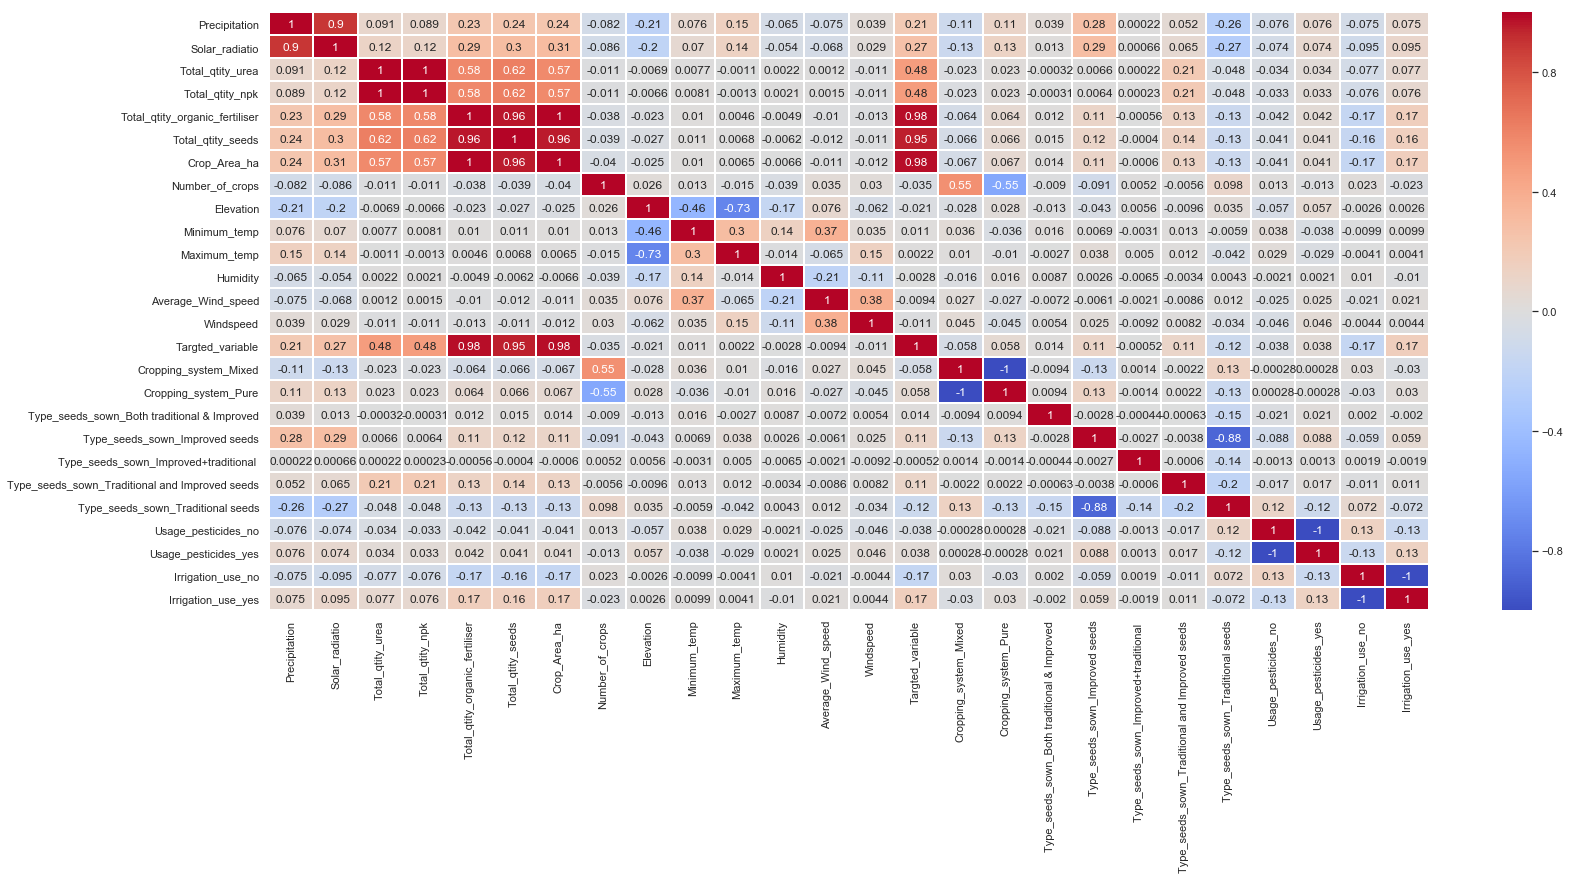

In [1255]:
plt.figure(figsize=(26,11))
sns.heatmap(Beans_dframe.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [1256]:
Beans_dframe.columns

Index(['Precipitation', 'Solar_radiatio', 'Total_qtity_urea',
       'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
       'Total_qtity_seeds', 'Crop_Area_ha', 'Number_of_crops', 'Elevation',
       'Minimum_temp', 'Maximum_temp', 'Humidity', 'Average_Wind_speed',
       'Windspeed', 'Targted_variable', 'Cropping_system_Mixed',
       'Cropping_system_Pure', 'Type_seeds_sown_Both traditional & Improved',
       'Type_seeds_sown_Improved seeds',
       'Type_seeds_sown_Improved+traditional ',
       'Type_seeds_sown_Traditional and Improved seeds',
       'Type_seeds_sown_Traditional seeds', 'Usage_pesticides_no',
       'Usage_pesticides_yes', 'Irrigation_use_no', 'Irrigation_use_yes'],
      dtype='object')

In [1257]:
Beans_dframe1=Beans_dframe[['Precipitation', 'Solar_radiatio', 'Total_qtity_urea',
       'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
       'Total_qtity_seeds', 'Crop_Area_ha','Number_of_crops',
       'Minimum_temp', 'Maximum_temp','Humidity','Average_Wind_speed',
        'Targted_variable','Cropping_system_Mixed',
       'Cropping_system_Pure','Type_seeds_sown_Both traditional & Improved',
       'Type_seeds_sown_Improved seeds',
       'Type_seeds_sown_Improved+traditional ',
       'Type_seeds_sown_Traditional and Improved seeds',
       'Type_seeds_sown_Traditional seeds', 'Usage_pesticides_no',
       'Usage_pesticides_yes', 'Irrigation_use_no', 'Irrigation_use_yes']]

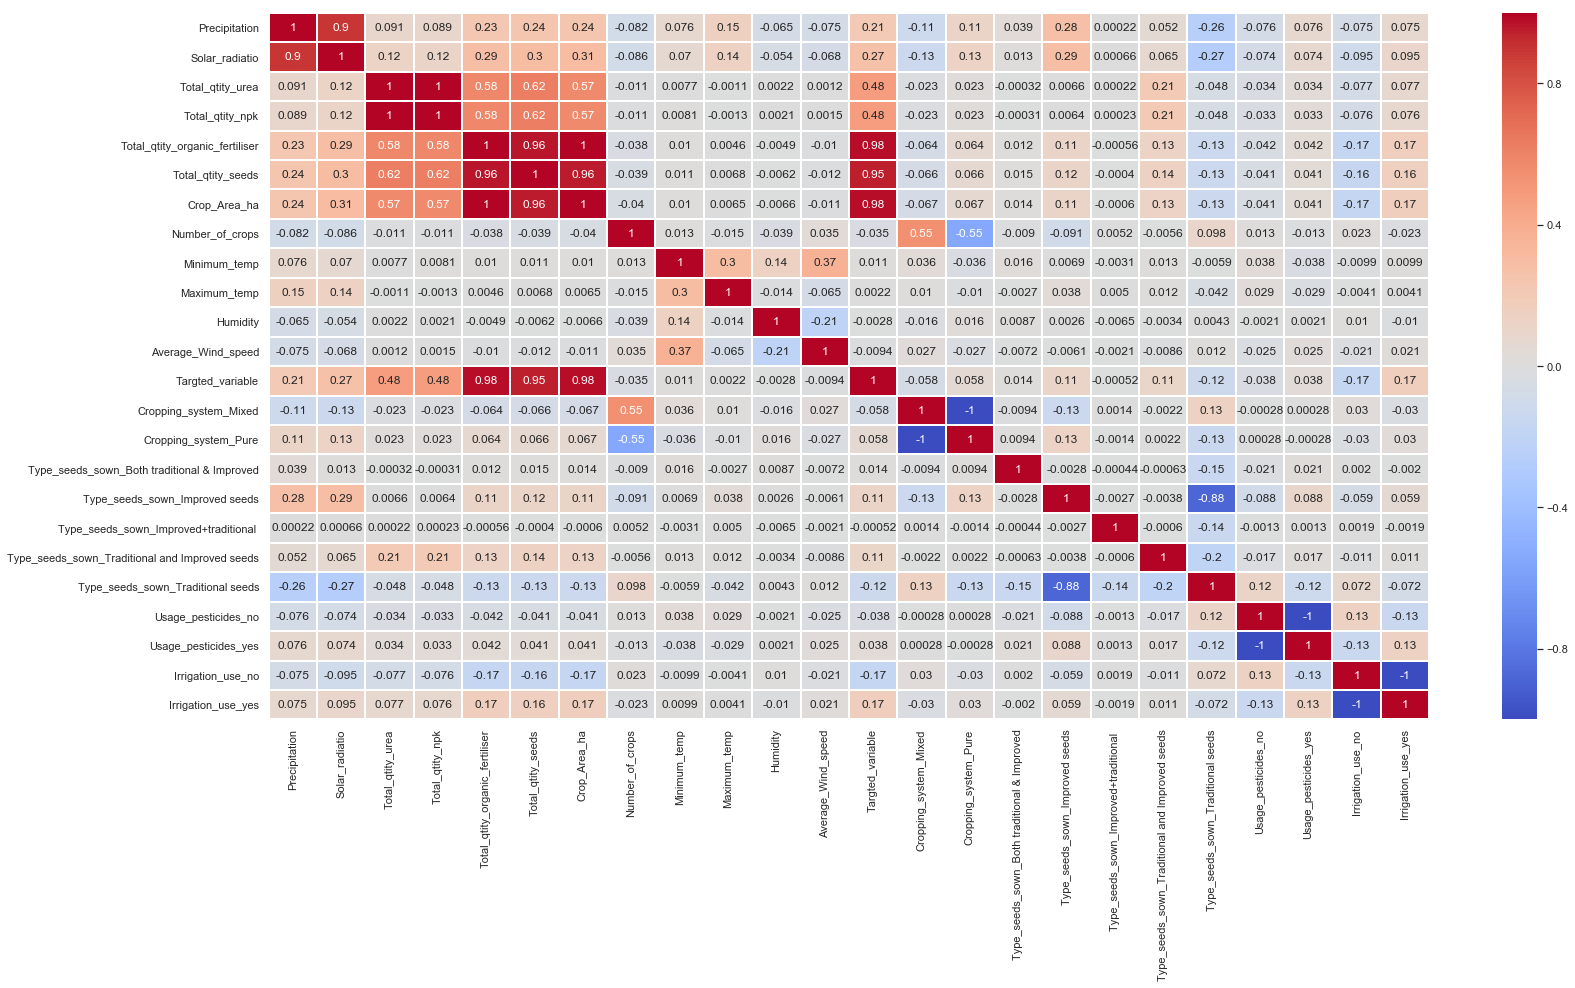

In [1258]:
plt.figure(figsize=(26,13))
heat=sns.heatmap(Beans_dframe1.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)
figure = heat.get_figure()    
figure.savefig('Beans_heatmap.png', dpi=400)

In [1259]:
Beans_input=Beans_dframe[['Total_qtity_urea',
       'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
       'Total_qtity_seeds', 'Crop_Area_ha','Targted_variable',
        'Cropping_system_Pure','Type_seeds_sown_Improved seeds',
        'Type_seeds_sown_Traditional and Improved seeds','Irrigation_use_yes']]

In [1260]:
Beans_input.to_stata("Beans_input.dta")

C:\Users\Jean Damascene\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\stata.py:2136: InvalidColumnName:


Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    b'Type_seeds_sown_Improved seeds'   ->   Type_seeds_sown_Improved_seeds
    b'Type_seeds_sown_Traditional and Improved seeds'   ->   Type_seeds_sown_Traditional_and_

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)




In [1261]:
#Shuffling the data in order to mix them on highest level in order to avoid the biases
#Beans_df=shuffle(Beans_df)

In [1262]:
#sas_meteo_data=shuffle(sas_meteo_data)

In [1263]:
quantile1=Beans_dframe['Targted_variable'].quantile(0.25)
quantile3=Beans_dframe['Targted_variable'].quantile(0.75)
iqr=quantile3-quantile1 # find interquartile of each crop in district
high_value=(1.5*iqr)+quantile3 # find the highest value of outliers
low_value=quantile1-(1.5*iqr) 

In [1264]:
high_value

219.44355398493957

In [1265]:
median = Beans_dframe.loc[Beans_dframe['Targted_variable']<high_value, 'Targted_variable'].median()
median

40.0

In [1266]:
mean = Beans_dframe.loc[Beans_dframe['Targted_variable']<high_value, 'Targted_variable'].mean()
mean

55.4673968816447

In [1267]:
Beans_dframe[Beans_dframe['Targted_variable']>mean].shape

(11148, 26)

In [1268]:
#Beans_dframe['Targted_variable']= np.where(Beans_dframe['Targted_variable'] >high_value, mean,Beans_dframe['Targted_variable'])

In [1564]:
Beans_dframe.columns

Index(['Precipitation', 'Solar_radiatio', 'Total_qtity_urea',
       'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
       'Total_qtity_seeds', 'Crop_Area_ha', 'Number_of_crops', 'Elevation',
       'Minimum_temp', 'Maximum_temp', 'Humidity', 'Average_Wind_speed',
       'Windspeed', 'Targted_variable', 'Cropping_system_Mixed',
       'Cropping_system_Pure', 'Type_seeds_sown_Both traditional & Improved',
       'Type_seeds_sown_Improved seeds',
       'Type_seeds_sown_Improved+traditional ',
       'Type_seeds_sown_Traditional and Improved seeds',
       'Type_seeds_sown_Traditional seeds', 'Usage_pesticides_no',
       'Usage_pesticides_yes', 'Irrigation_use_no', 'Irrigation_use_yes'],
      dtype='object')

In [1566]:
#'Cropping_system_Pure','Type_seeds_sown_Improved seeds','Total_qtity_urea'
X=Beans_dframe[['Precipitation', 'Solar_radiatio']]
       #'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
       #'Total_qtity_seeds', 'Crop_Area_ha',
       # 'Type_seeds_sown_Traditional and Improved seeds','Irrigation_use_yes']]

y=Beans_dframe['Targted_variable']

In [1567]:
from sklearn.model_selection import train_test_split

In [1568]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

# Scaling our data

In [1569]:
from sklearn.preprocessing import MinMaxScaler


In [1570]:
scaler = MinMaxScaler()

In [1571]:
X_train= scaler.fit_transform(X_train)

In [1572]:
X_test = scaler.transform(X_test)

In [1573]:
X_train.shape

(19410, 2)

In [1574]:
X_test.shape

(6470, 2)

Neural Network Learning as Optimization
A deep learning neural network learns to map a set of inputs to a set of outputs from training data.

We cannot calculate the perfect weights for a neural network; there are too many unknowns. Instead, the problem of learning is cast as a search or optimization problem and an algorithm is used to navigate the space of possible sets of weights the model may use in order to make good or good enough predictions.

Typically, a neural network model is trained using the stochastic gradient descent optimization algorithm and weights are updated using the backpropagation of error algorithm

# Creating a model

In [1575]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [1576]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the model

In [1577]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 19410 samples, validate on 6470 samples
Epoch 1/400
19410/19410 [==============================] - 21s 1ms/sample - loss: 16214888.0151 - val_loss: 134320115.1981
Epoch 2/400
19410/19410 [==============================] - 1s 28us/sample - loss: 16198071.0502 - val_loss: 134228830.9429
Epoch 3/400
19410/19410 [==============================] - 1s 32us/sample - loss: 16153400.4322 - val_loss: 134044734.1533
Epoch 4/400
19410/19410 [==============================] - 1s 30us/sample - loss: 16141181.8124 - val_loss: 134026286.4190
Epoch 5/400
19410/19410 [==============================] - 0s 26us/sample - loss: 16134468.7460 - val_loss: 133991025.9706
Epoch 6/400
19410/19410 [==============================] - 1s 29us/sample - loss: 16125626.6158 - val_loss: 133952449.6416
Epoch 7/400
19410/19410 [==============================] - 1s 29us/sample - loss: 16115792.8122 - val_loss: 133890582.9825
Epoch 8/400
19410/19410 [==============================] - 1s 31us/sample - loss: 16103210

Epoch 132/400
19410/19410 [==============================] - 0s 26us/sample - loss: 12482551.0976 - val_loss: 110137687.4209
Epoch 133/400
19410/19410 [==============================] - 1s 26us/sample - loss: 12433320.6339 - val_loss: 108991414.6403
Epoch 134/400
19410/19410 [==============================] - ETA: 0s - loss: 13844164.98 - 0s 26us/sample - loss: 12378492.3185 - val_loss: 109428889.6646
Epoch 135/400
19410/19410 [==============================] - 1s 26us/sample - loss: 12380811.6482 - val_loss: 108253795.9453
Epoch 136/400
19410/19410 [==============================] - 1s 27us/sample - loss: 12278606.2988 - val_loss: 109440824.1236
Epoch 137/400
19410/19410 [==============================] - 1s 27us/sample - loss: 12356531.8447 - val_loss: 108873581.5562
Epoch 138/400
19410/19410 [==============================] - 1s 26us/sample - loss: 12300993.6410 - val_loss: 108548389.4970
Epoch 139/400
19410/19410 [==============================] - 1s 27us/sample - loss: 12236171.39

19410/19410 [==============================] - 0s 22us/sample - loss: 8889944.6162 - val_loss: 76618964.7478
Epoch 264/400
19410/19410 [==============================] - 0s 22us/sample - loss: 8845246.0217 - val_loss: 70410520.5597
Epoch 265/400
19410/19410 [==============================] - 1s 27us/sample - loss: 8953469.7558 - val_loss: 75257433.0079
Epoch 266/400
19410/19410 [==============================] - 0s 26us/sample - loss: 9060380.1224 - val_loss: 75333151.1719
Epoch 267/400
19410/19410 [==============================] - 0s 23us/sample - loss: 9065476.6357 - val_loss: 75373010.7405
Epoch 268/400
19410/19410 [==============================] - 0s 22us/sample - loss: 8913047.1906 - val_loss: 74869644.8040
Epoch 269/400
19410/19410 [==============================] - 0s 24us/sample - loss: 8820719.5440 - val_loss: 70247350.3523
Epoch 270/400
19410/19410 [==============================] - 1s 26us/sample - loss: 8888172.9653 - val_loss: 74784512.3257
Epoch 271/400
19410/19410 [===

19410/19410 [==============================] - 1s 28us/sample - loss: 8751789.5526 - val_loss: 63541957.3132
Epoch 396/400
19410/19410 [==============================] - 1s 29us/sample - loss: 8751451.1067 - val_loss: 69309798.3563
Epoch 397/400
19410/19410 [==============================] - 1s 29us/sample - loss: 8772265.5556 - val_loss: 62733521.0327
Epoch 398/400
19410/19410 [==============================] - 1s 30us/sample - loss: 8387207.2408 - val_loss: 68951501.7730
Epoch 399/400
19410/19410 [==============================] - 1s 33us/sample - loss: 8678697.6582 - val_loss: 68423908.7090
Epoch 400/400
19410/19410 [==============================] - 1s 28us/sample - loss: 8523151.6574 - val_loss: 68541242.4768


In [1578]:
losses = pd.DataFrame(model.history.history)

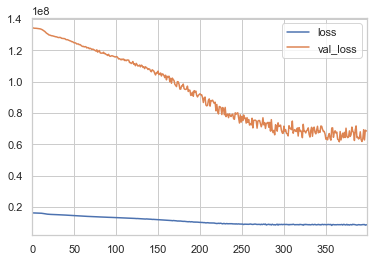

In [1579]:
losses.plot()

# Evaluation on Test Dataset

he explained_variance_score computes the explained variance regression score.

If 
 is the estimated target output,  the corresponding (correct) target output, and  is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

 
The best possible score is 1.0, lower values are worse.

In [1580]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [1581]:
predictions = model.predict(X_test)

In [1582]:
predictions.shape

(6470, 1)

In [1583]:
predictions[:,0]

array([ 48.027496,  48.027496,  48.027496, ..., 363.41693 ,  48.027504,
        48.027504], dtype=float32)

In [1584]:
print(predictions )

[[ 48.027496]
 [ 48.027496]
 [ 48.027496]
 ...
 [363.41693 ]
 [ 48.027504]
 [ 48.027504]]


In [1585]:
mean_absolute_error(y_test,predictions)

234.8388547501878

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences

In [1586]:
np.sqrt(mean_squared_error(y_test,predictions))

8278.964093653683

# Explained Variance score
Explained variance (also called explained variation) is used to measure the discrepancy between a model and actual data. In other words, it’s the part of the model’s total variance that is explained by factors that are actually present and isn’t due to error variance.
Higher percentages of explained variance indicates a stronger strength of association. It also means that you make better predictions (Rosenthal & Rosenthal, 2011)
R2 in regression has a similar interpretation: what proportion of variance in Y can be explained by X 

In [1587]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 234.8388547501878
MSE: 68541246.46400695
RMSE: 8278.964093653683


In [1588]:
explained_variance_score(y_test,predictions)

0.48921366930473287

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('Actual beans yield')
plt.ylabel('Predicted beans yield')
plt.show()

# Working on Principal Component Analysis for Feature Reductions

PCA Visualization
As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [1589]:
from sklearn.preprocessing import StandardScaler

In [1590]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [1591]:
scaled_data = scaler.transform(X)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().
We can also specify how many components we want to keep when creating the PCA object.

In [1592]:
from sklearn.decomposition import PCA

In [1594]:
pca = PCA(n_components=2)

In [1595]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 2 principal components.

In [1596]:
X_pca= pca.transform(scaled_data)

In [1597]:
X_pca.shape

(25880, 2)

In [1598]:
scaled_data.shape

(25880, 2)

In [1599]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,y,test_size=0.25,random_state=101)

In [1600]:
print(X_train.shape,Y_train.shape)

(19410, 2) (19410,)


In [1601]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [1602]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [1603]:
model.fit(x=X_train,y=Y_train.values,verbose=0,
          validation_data=(X_test,Y_test.values),
          batch_size=128,epochs=400)

In [1604]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             multiple                  57        
_________________________________________________________________
dense_61 (Dense)             multiple                  380       
_________________________________________________________________
dense_62 (Dense)             multiple                  380       
_________________________________________________________________
dense_63 (Dense)             multiple                  380       
_________________________________________________________________
dense_64 (Dense)             multiple                  20        
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [1605]:
losses = pd.DataFrame(model.history.history)

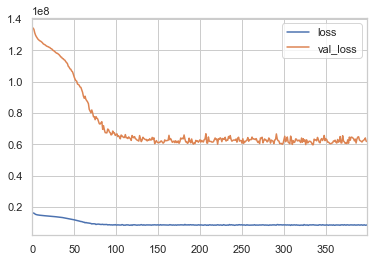

In [1606]:
losses.plot()

In [1607]:
predicted1=model.predict(X_test)

In [1608]:
print(predicted1)

[[ 40.379875]
 [ 40.379875]
 [ 40.379875]
 ...
 [319.34393 ]
 [ 40.379845]
 [ 40.379845]]


Mean Absolute Error is a model evaluation metric used with regression models. The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set.

In [1609]:
from sklearn.metrics import r2_score
# calculate these metrics by hand!
from sklearn import metrics

In [1610]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predicted1))
print('MSE:', metrics.mean_squared_error(Y_test, predicted1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predicted1)))
print('r2_score:',metrics.r2_score(Y_test, predicted1))

MAE: 241.6597427740036
MSE: 61758083.15428323
RMSE: 7858.63112471143
r2_score: 0.5395315828834885


In [ ]:
explained_variance_score(Y_test,predicted1)

In [ ]:
# Our predictions
plt.scatter(Y_test,predicted1)

# Perfect predictions
plt.plot(Y_test,Y_test,'r',linewidth=2)
plt.xlabel('Actual beans yield')
plt.ylabel('Predicted beans yield')
plt.show()

# Working on Linear Regression Model

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the linear regression library from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [ ]:
# Import Linear Regressions
from sklearn.linear_model import LinearRegression

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

There are several definitions of R2 that are only sometimes equivalent. One class of such cases includes that of simple linear regression where r2 is used instead of R2. When an intercept is included, then r2 is simply the square of the sample correlation coefficient (i.e., r) between the observed outcomes and the observed predictor values.[4] If additional regressors are included, R2 is the square of the coefficient of multiple correlation. In both such cases, the coefficient of determination normally ranges from 0 to 1.

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lreg = LinearRegression()

In [ ]:
lreg.fit(X_train1,y_train1)

#Let's go ahead check the intercept and number of coefficients

In [ ]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

In [ ]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

In [ ]:
print(lreg.coef_)

In [ ]:
# Print shapes of the training and testing data sets
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

Great! Now that we have our training and testing sets we can continue on to predict Beans yield based on the multiple variables

# Predicting Beans yield

Now that we have our training and testing sets, let's go ahead and try to use them to predict beans yield. We'll use our training set for the prediction and then use our testing set for validation

Now run a prediction on both the X training set and the testing set.

In [ ]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train1)
pred_test = lreg.predict(X_test1)

In [ ]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((y_train1 - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((y_test1 - pred_test) ** 2))

In [ ]:
# Scatter plot the training data
plt.scatter(pred_train,(y_train1-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
plt.scatter(pred_test,(y_test1-pred_test),c='r',alpha=0.5)
# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
#plt.legend((y_train1,y_test),
        #   ('Training','Test'),
       #    loc='lower left')

#plt.title('Residual Plots')

In [ ]:
# Our predictions
plt.scatter(y_test,pred_test,color='c', marker='o')

# Perfect predictions
plt.plot(y_test,y_test,'g',linewidth=2)
plt.xlabel('Actual beans yield')
plt.ylabel('Predicted beans yield')
plt.show()

In [ ]:
mean_absolute_error(y_test1, pred_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test1, pred_test))
print('MSE:', metrics.mean_squared_error(y_test1, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, pred_test)))
print('r2_score:',metrics.r2_score(y_test1, pred_test))

In [ ]:
explained_variance_score(y_test1, pred_test)

# Working on Polynomial Regressions

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
#Define the predictors of choose the features
'''X_poly= Beans_df[['Number_of_crops','Crop_Area_ha','Qtity_seeds_sown','Usage_organic_fertilizer',
       'Usage_inorganic_fertilizer', 'Usage_pesticides', 'Irrigation_use',
        'Precipitation', 'TMPMIN', 'TMPMAX','Humidity']]'''

In [ ]:
#Y_poly=Beans_df['Yield']#The pridicted variable

In [ ]:
#Define the polynomial features
poly=PolynomialFeatures(degree=2)
#X_poly= poly.fit_transform(X_poly)

In [ ]:
#Split our data into training set and test set
poly_X_train1, poly_X_test1, poly_Y_train1, poly_Y_test1 = train_test_split(X_pca,y, test_size = 0.25, random_state = 101)

In [ ]:
#Make transformation of predictors for both training and test sets
poly_X_train=poly.fit_transform(poly_X_train1)
poly_X_test=poly.fit_transform(poly_X_test1)

In [ ]:
regression = LinearRegression()#Define Linear regression model

In [ ]:
regression.fit(poly_X_train,poly_Y_train1)# Create our model


In [ ]:
#Predicting our needed value
pred_test1=regression.predict(poly_X_test)
pred_train1=regression.predict(poly_X_train)

In [ ]:
# Model evaluations
print('MAE:', metrics.mean_absolute_error(poly_Y_test1, pred_test1))
print('MSE:', metrics.mean_squared_error(poly_Y_test1, pred_test1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(poly_Y_test1, pred_test1)))
print('r2_score:',metrics.r2_score(poly_Y_test1, pred_test1))

In [ ]:
explained_variance_score(poly_Y_test1, pred_test1)

In [ ]:
#score =regression.score(poly_X_test1, poly_Y_test1)
#score = round(score*100, 2)
#print(score)

In [ ]:
# Our predictions
plt.scatter(poly_Y_test1,pred_test,color='c', marker='o')

# Perfect predictions
plt.plot(poly_Y_test1,poly_Y_test1,'g',linewidth=2)
plt.xlabel('Actual beans yield')
plt.ylabel('Predicted beans yield')
plt.show()

# Working on Maize Dataframe